In [1]:
from rdkit import Chem, DataStructs
from rdkit.Chem import AllChem
from rdkit.Chem import rdMolDescriptors as rdmd
from rdkit.Chem.Scaffolds import MurckoScaffold
import pandas as pd
from tqdm import tqdm
import time
import numpy as np
from scipy.spatial.distance import cdist
from sklearn.cluster import MiniBatchKMeans
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import matthews_corrcoef,confusion_matrix, roc_auc_score, roc_curve
import seaborn as sns

In [2]:
not_to_be_selected_list=[
       'Activity Summary', 'Viability Activity', 'PUBCHEM_ACTIVITY_SCORE',
       'Viability Potency (uM)', 'Viability Efficacy (%)', "index",
                         "Nuclei_Correlation_Manders_AGP_DNA",
            "Nuclei_Correlation_Manders_AGP_ER",
            "Nuclei_Correlation_Manders_AGP_Mito",
            "Nuclei_Correlation_Manders_AGP_RNA",
            "Nuclei_Correlation_Manders_DNA_AGP",
            "Nuclei_Correlation_Manders_DNA_ER",
            "Nuclei_Correlation_Manders_DNA_Mito",
            "Nuclei_Correlation_Manders_DNA_RNA",
            "Nuclei_Correlation_Manders_ER_AGP",
            "Nuclei_Correlation_Manders_ER_DNA",
            "Nuclei_Correlation_Manders_ER_Mito",
            "Nuclei_Correlation_Manders_ER_RNA",
            "Nuclei_Correlation_Manders_Mito_AGP",
            "Nuclei_Correlation_Manders_Mito_DNA",
            "Nuclei_Correlation_Manders_Mito_ER",
            "Nuclei_Correlation_Manders_Mito_RNA",
            "Nuclei_Correlation_Manders_RNA_AGP",
            "Nuclei_Correlation_Manders_RNA_DNA",
            "Nuclei_Correlation_Manders_RNA_ER",
            "Nuclei_Correlation_Manders_RNA_Mito",
            "Nuclei_Correlation_RWC_AGP_DNA",
            "Nuclei_Correlation_RWC_AGP_ER",
            "Nuclei_Correlation_RWC_AGP_Mito",
            "Nuclei_Correlation_RWC_AGP_RNA",
            "Nuclei_Correlation_RWC_DNA_AGP",
            "Nuclei_Correlation_RWC_DNA_ER",
            "Nuclei_Correlation_RWC_DNA_Mito",
            "Nuclei_Correlation_RWC_DNA_RNA",
            "Nuclei_Correlation_RWC_ER_AGP",
            "Nuclei_Correlation_RWC_ER_DNA",
            "Nuclei_Correlation_RWC_ER_Mito",
            "Nuclei_Correlation_RWC_ER_RNA",
            "Nuclei_Correlation_RWC_Mito_AGP",
            "Nuclei_Correlation_RWC_Mito_DNA",
            "Nuclei_Correlation_RWC_Mito_ER",
            "Nuclei_Correlation_RWC_Mito_RNA",
            "Nuclei_Correlation_RWC_RNA_AGP",
            "Nuclei_Correlation_RWC_RNA_DNA",
            "Nuclei_Correlation_RWC_RNA_ER",
            "Nuclei_Correlation_RWC_RNA_Mito",
            "Nuclei_Granularity_14_AGP",
            "Nuclei_Granularity_14_DNA",
            "Nuclei_Granularity_14_ER",
            "Nuclei_Granularity_14_Mito",
            "Nuclei_Granularity_14_RNA",
            "Nuclei_Granularity_15_AGP",
            "Nuclei_Granularity_15_DNA",
            "Nuclei_Granularity_15_ER",
            "Nuclei_Granularity_15_Mito",
            "Nuclei_Granularity_15_RNA",
            "Nuclei_Granularity_16_AGP",
            "Nuclei_Granularity_16_DNA",
            "Nuclei_Granularity_16_ER",
            "Nuclei_Granularity_16_Mito",
            "Nuclei_Granularity_16_RNA"]

In [3]:
select_list = [
    "StdInChI",
    "PUBCHEM_ACTIVITY_OUTCOME",
   
                                  
 'Cells_Granularity_10_RNA',
 'Cytoplasm_AreaShape_FormFactor',
 'Cytoplasm_Correlation_K_Mito_RNA',
 'Nuclei_AreaShape_Zernike_7_1',
 'Cytoplasm_Granularity_1_RNA',
 'Nuclei_AreaShape_Zernike_7_3',
 'Nuclei_Correlation_Costes_DNA_AGP',
 'Cells_Granularity_1_RNA',
 'Cells_Granularity_1_AGP',
 'Nuclei_Intensity_LowerQuartileIntensity_ER',
 'Cells_Granularity_14_RNA',
 'Cytoplasm_Correlation_K_DNA_ER',
 'Cells_Intensity_MedianIntensity_ER',
 'Nuclei_Intensity_IntegratedIntensityEdge_RNA',
 'Cells_Intensity_StdIntensityEdge_RNA',
 'Cytoplasm_Intensity_IntegratedIntensityEdge_ER',
 'Cytoplasm_Correlation_RWC_RNA_Mito',
 'Cells_Correlation_RWC_Mito_RNA',
 'Nuclei_AreaShape_Zernike_5_1',
 'Nuclei_Granularity_1_ER',
 'Cytoplasm_RadialDistribution_MeanFrac_RNA_4of4',
 'Nuclei_RadialDistribution_RadialCV_RNA_4of4',
 'Cells_Intensity_IntegratedIntensityEdge_AGP',
 'Cytoplasm_AreaShape_Zernike_6_6',
 'Cytoplasm_Granularity_8_Mito',
 'Nuclei_Correlation_Correlation_Mito_ER',
 'Nuclei_Intensity_MassDisplacement_AGP',
 'Cytoplasm_Granularity_14_RNA',
 'Nuclei_RadialDistribution_FracAtD_DNA_3of4',
 'Cells_Correlation_RWC_AGP_DNA',
 'Cells_Granularity_12_RNA',
 'Nuclei_Granularity_11_RNA',
 'Cells_Granularity_11_AGP',
 'Nuclei_RadialDistribution_FracAtD_Mito_2of4',
 'Cytoplasm_Granularity_8_ER',
 'Nuclei_Intensity_MaxIntensity_AGP',
 'Cytoplasm_Correlation_RWC_DNA_Mito',
 'Cells_Granularity_8_ER',
 'Nuclei_Granularity_10_RNA',
 'Nuclei_Granularity_1_RNA',
 'Cells_Correlation_RWC_RNA_Mito',
 'Nuclei_Neighbors_AngleBetweenNeighbors_1',
 'Cells_Granularity_1_ER',
 'Cytoplasm_Correlation_RWC_Mito_RNA',
 'Cytoplasm_Correlation_K_DNA_RNA',
 'Nuclei_Granularity_10_ER',
 'Nuclei_Granularity_11_AGP',
 'Cells_Granularity_1_Mito',
 'Nuclei_Granularity_8_ER',
 'Cytoplasm_Granularity_1_ER',
 'Nuclei_Correlation_Costes_ER_AGP',
 'Nuclei_Texture_Variance_AGP_5_0',
 'Cytoplasm_Correlation_Costes_RNA_ER',
 'Cells_RadialDistribution_RadialCV_DNA_4of4',
 'Cytoplasm_Correlation_Costes_DNA_Mito',
 'Cytoplasm_Correlation_K_DNA_AGP',
 'Cells_Correlation_K_DNA_ER',
 'Cells_Granularity_10_ER',
 'Cells_Granularity_8_RNA',
 'Nuclei_Granularity_8_RNA',
 'Cytoplasm_AreaShape_Zernike_8_0',
 'Cytoplasm_Granularity_11_RNA',
 'Cells_Texture_DifferenceVariance_RNA_10_0',
 'Cytoplasm_Granularity_10_ER',
 'Cells_Granularity_11_RNA',
 'Cytoplasm_RadialDistribution_MeanFrac_RNA_2of4',
 'Cells_Granularity_12_AGP',
 'Cytoplasm_Granularity_1_AGP',
 'Cytoplasm_AreaShape_Zernike_6_4',
 'Nuclei_Granularity_13_DNA',
 'Nuclei_AreaShape_Zernike_3_3',
 'Cytoplasm_Granularity_1_Mito',
 'Nuclei_Texture_Variance_Mito_10_0',
 'Cytoplasm_Granularity_8_RNA',
 'Cells_AreaShape_Zernike_5_1',
 'Cells_Intensity_MADIntensity_Mito',
 'Nuclei_Correlation_Costes_DNA_RNA',
 'Cells_Correlation_Costes_RNA_ER',
 'Nuclei_Granularity_7_ER',
 'Cytoplasm_Correlation_RWC_Mito_DNA',
 'Nuclei_Intensity_MedianIntensity_DNA',
 'Cytoplasm_Intensity_MedianIntensity_ER',
 'Cells_Correlation_K_AGP_DNA',
 'Cells_RadialDistribution_RadialCV_RNA_4of4',
 'Nuclei_RadialDistribution_FracAtD_Mito_1of4',
 'Nuclei_Intensity_MaxIntensityEdge_AGP',
 'Cells_RadialDistribution_RadialCV_Mito_4of4',
 'Cells_Correlation_RWC_DNA_Mito',
 'Nuclei_Intensity_MedianIntensity_ER',
 'Nuclei_Correlation_K_ER_DNA',
 'Nuclei_Granularity_1_Mito',
 'Cells_Intensity_LowerQuartileIntensity_ER',
 'Nuclei_AreaShape_Zernike_3_1',
 'Cytoplasm_Granularity_16_ER',
 'Cells_Intensity_IntegratedIntensityEdge_ER',
 'Nuclei_Correlation_K_DNA_ER',
 'Nuclei_Granularity_1_AGP',
 'Nuclei_Intensity_UpperQuartileIntensity_ER',
 'Cells_Texture_InfoMeas2_DNA_5_0',
 'Nuclei_Granularity_12_RNA',
 'Nuclei_Granularity_1_DNA',
 'Cytoplasm_Intensity_IntegratedIntensityEdge_RNA',
 'Cytoplasm_Granularity_10_RNA',
 'Cells_Texture_AngularSecondMoment_AGP_10_0',
 'Cytoplasm_Correlation_K_AGP_DNA',
 'Cells_Correlation_Costes_DNA_AGP',
 'Nuclei_AreaShape_Zernike_1_1',
 'Nuclei_Intensity_MinIntensityEdge_ER',
 'Nuclei_Intensity_MinIntensity_ER',
 'Cytoplasm_RadialDistribution_RadialCV_AGP_2of4'
]

In [4]:
df =pd.read_csv("../CP_MitoOverlap_nocelldeath_486.csv" ,  usecols=lambda x: x  in select_list)
df

StdInChI  \
0    InChI=1S/C10H10N2O/c1-8-7-10(13)12(11-8)9-5-3-...   
1    InChI=1S/C10H10N4O2S/c11-8-2-4-9(5-3-8)17(15,1...   
2    InChI=1S/C10H11ClO3/c1-10(2,9(12)13)14-8-5-3-7...   
3    InChI=1S/C10H11N3O3S/c1-7-6-10(12-16-7)13-17(1...   
4    InChI=1S/C10H11NO3/c12-9(13)6-7-11-10(14)8-4-2...   
..                                                 ...   
481  InChI=1S/C9H5I2NO/c10-6-4-7(11)9(13)8-5(6)2-1-...   
482  InChI=1S/C9H6O2/c10-9-6-5-7-3-1-2-4-8(7)11-9/h...   
483  InChI=1S/C9H9N3O2S2/c10-7-1-3-8(4-2-7)16(13,14...   
484  InChI=1S/C9H9N3S/c10-12-9-11-8(6-13-9)7-4-2-1-...   
485  InChI=1S/C9H9NO/c11-6-7-5-10-9-4-2-1-3-8(7)9/h...   

     PUBCHEM_ACTIVITY_OUTCOME  Cells_AreaShape_Zernike_5_1  \
0                           1                    -0.000138   
1                           0                    -0.000006   
2                           0                     0.000042   
3                           0                    -0.000178   
4                           0                     0.000216   
..                        ...                          ...   
481                         0                    -0.000055   
482                         0                     0.000152   
483                         0                    -0.000235   
484                         1                     0.000081   
485                         1                     0.000044   

     Cells_Correlation_Costes_DNA_AGP  Cells_Correlation_Costes_RNA_ER  \
0                            0.008443                         0.000160   
1                           -0.054765                         0.000159   
2                            0.075703                         0.000030   
3                            0.016997                         0.000773   
4                            0.034126                         0.000000   
..                                ...                              ...   
481                         -0.011911                        -0.001607   
482                          0.005205                         0.002268   
483                          0.022057                         0.000000   
484                         -0.187546                         0.000000   
485                          0.028889                         0.000000   

     Cells_Correlation_K_AGP_DNA  Cells_Correlation_K_DNA_ER  \
0                      -0.001732                   -0.006329   
1                       0.025411                   -0.036288   
2                      -0.043307                   -0.011532   
3                       0.004515                   -0.028153   
4                       0.053707                   -0.091849   
..                           ...                         ...   
481                     0.014142                   -0.058676   
482                    -0.082345                    0.070891   
483                     0.084287                   -0.072439   
484                     0.009121                    0.023132   
485                     0.067263                   -0.064705   

     Cells_Correlation_RWC_AGP_DNA  Cells_Correlation_RWC_DNA_Mito  \
0                        -0.012966                        0.002119   
1                         0.020143                       -0.029333   
2                         0.040611                        0.009720   
3                         0.044833                       -0.001565   
4                         0.019329                       -0.004381   
..                             ...                             ...   
481                      -0.027847                        0.008410   
482                      -0.021342                       -0.000617   
483                       0.001947                        0.010388   
484                      -0.013565                       -0.001440   
485                       0.015134                        0.008716   

     Cells_Correlation_RWC_Mito_RNA  ...  \
0                         -0.000497  ...   
1                

In [5]:
len(df[df.PUBCHEM_ACTIVITY_OUTCOME == 1])

85

In [6]:
from rdkit.Chem import inchi
from rdkit import Chem

def get_standardize_smiles(value):
    try: return Chem.MolToSmiles(Chem.inchi.MolFromInchi(value))
    except: return "Cannot_do"
    
from pandarallel import pandarallel
pandarallel.initialize()

df['smiles_r']=df['StdInChI'].parallel_apply(get_standardize_smiles)  
df

INFO: Pandarallel will run on 40 workers.
INFO: Pandarallel will use Memory file system to transfer data between the main process and workers.


StdInChI  \
0    InChI=1S/C10H10N2O/c1-8-7-10(13)12(11-8)9-5-3-...   
1    InChI=1S/C10H10N4O2S/c11-8-2-4-9(5-3-8)17(15,1...   
2    InChI=1S/C10H11ClO3/c1-10(2,9(12)13)14-8-5-3-7...   
3    InChI=1S/C10H11N3O3S/c1-7-6-10(12-16-7)13-17(1...   
4    InChI=1S/C10H11NO3/c12-9(13)6-7-11-10(14)8-4-2...   
..                                                 ...   
481  InChI=1S/C9H5I2NO/c10-6-4-7(11)9(13)8-5(6)2-1-...   
482  InChI=1S/C9H6O2/c10-9-6-5-7-3-1-2-4-8(7)11-9/h...   
483  InChI=1S/C9H9N3O2S2/c10-7-1-3-8(4-2-7)16(13,14...   
484  InChI=1S/C9H9N3S/c10-12-9-11-8(6-13-9)7-4-2-1-...   
485  InChI=1S/C9H9NO/c11-6-7-5-10-9-4-2-1-3-8(7)9/h...   

     PUBCHEM_ACTIVITY_OUTCOME  Cells_AreaShape_Zernike_5_1  \
0                           1                    -0.000138   
1                           0                    -0.000006   
2                           0                     0.000042   
3                           0                    -0.000178   
4                           0                     0.000216   
..                        ...                          ...   
481                         0                    -0.000055   
482                         0                     0.000152   
483                         0                    -0.000235   
484                         1                     0.000081   
485                         1                     0.000044   

     Cells_Correlation_Costes_DNA_AGP  Cells_Correlation_Costes_RNA_ER  \
0                            0.008443                         0.000160   
1                           -0.054765                         0.000159   
2                            0.075703                         0.000030   
3                            0.016997                         0.000773   
4                            0.034126                         0.000000   
..                                ...                              ...   
481                         -0.011911                        -0.001607   
482                          0.005205                         0.002268   
483                          0.022057                         0.000000   
484                         -0.187546                         0.000000   
485                          0.028889                         0.000000   

     Cells_Correlation_K_AGP_DNA  Cells_Correlation_K_DNA_ER  \
0                      -0.001732                   -0.006329   
1                       0.025411                   -0.036288   
2                      -0.043307                   -0.011532   
3                       0.004515                   -0.028153   
4                       0.053707                   -0.091849   
..                           ...                         ...   
481                     0.014142                   -0.058676   
482                    -0.082345                    0.070891   
483                     0.084287                   -0.072439   
484                     0.009121                    0.023132   
485                     0.067263                   -0.064705   

     Cells_Correlation_RWC_AGP_DNA  Cells_Correlation_RWC_DNA_Mito  \
0                        -0.012966                        0.002119   
1                         0.020143                       -0.029333   
2                         0.040611                        0.009720   
3                         0.044833                       -0.001565   
4                         0.019329                       -0.004381   
..                             ...                             ...   
481                      -0.027847                        0.008410   
482                      -0.021342                       -0.000617   
483                       0.001947                        0.010388   
484                      -0.013565                       -0.001440   
485                       0.015134                        0.008716   

     Cells_Correlation_RWC_Mito_RNA  ...  Nuclei_Intensity_MinIntensity_ER  \
0                         -

In [7]:
df[df.PUBCHEM_ACTIVITY_OUTCOME==1].iloc[:, 2:-1]

Cells_AreaShape_Zernike_5_1  Cells_Correlation_Costes_DNA_AGP  \
0                      -0.000138                          0.008443   
8                      -0.000459                         -0.011069   
33                      0.000531                          0.012057   
34                     -0.000066                         -0.065659   
41                      0.000139                          0.017419   
..                           ...                               ...   
433                    -0.000070                         -0.028997   
461                     0.000008                          0.076146   
465                     0.000132                          0.014312   
484                     0.000081                         -0.187546   
485                     0.000044                          0.028889   

     Cells_Correlation_Costes_RNA_ER  Cells_Correlation_K_AGP_DNA  \
0                           0.000160                    -0.001732   
8                           0.000159                    -0.008932   
33                          0.000060                    -0.100284   
34                          0.000587                    -0.049196   
41                         -0.000725                    -0.019880   
..                               ...                          ...   
433                         0.000733                    -0.011971   
461                        -0.001213                    -0.013280   
465                         0.001051                     0.053082   
484                         0.000000                     0.009121   
485                         0.000000                     0.067263   

     Cells_Correlation_K_DNA_ER  Cells_Correlation_RWC_AGP_DNA  \
0                     -0.006329                      -0.012966   
8                      0.047711                       0.019615   
33                     0.133896                       0.026529   
34                     0.008465                       0.029535   
41                     0.031044                       0.028678   
..                          ...                            ...   
433                    0.006213                       0.056202   
461                    0.012656                       0.046075   
465                   -0.036365                      -0.002977   
484                    0.023132                      -0.013565   
485                   -0.064705                       0.015134   

     Cells_Correlation_RWC_DNA_Mito  Cells_Correlation_RWC_Mito_RNA  \
0                          0.002119                       -0.000497   
8                         -0.011170                       -0.005327   
33                        -0.004707                        0.002662   
34                        -0.002739                       -0.002720   
41                         0.012366                        0.000171   
..                              ...                             ...   
433                       -0.002340                        0.003035   
461                        0.019687                        0.004625   
465                        0.018726                        0.002212   
484                       -0.001440                       -0.003170   
485                        0.008716                       -0.000299   

     Cells_Correlation_RWC_RNA_Mito  Cells_Granularity_10_ER  ...  \
0                         -0.000963                -0.115522  ...   
8                         -0.004269                -0.088151  ...   
33                        -0.001283                -0.058087  ...   
34                        -0.002850                -0.093371  ...   
41                         0.000686                -0.086020  ...   
..                              ...                      ...  ...   
433                        0.003049                -0.066934  ...   
461                        0.005441                -0.072377  ...   
465                        0.001598                -0.133187  ...   

In [8]:
#Active vs Active
from scipy import stats 
from rdkit import Chem
from rdkit import DataStructs
from rdkit.Chem.Fingerprints import FingerprintMols
import pandas as pd

# proof and make a list of SMILES
df_CP = df[df.PUBCHEM_ACTIVITY_OUTCOME==1].iloc[:, 2:-1]

df_smiles = df[df.PUBCHEM_ACTIVITY_OUTCOME==1]['smiles_r']

c_smiles = []
for ds in df_smiles:
    try:
        cs = Chem.CanonSmiles(ds)
        c_smiles.append(cs)
    except:
        print('Invalid SMILES:', ds)
print()

# the list for the dataframe
qu, ta, sim = [], [], []

s_p_list=[]
s_s_list=[]
s_log10_p_list=[]
s_log2_effect_list=[]
s_prod_list=[]

# compare all fp pairwise without duplicates

for n in range(len(df_CP)): # -1 so the last fp will not be used
    for m in range(len(df_CP)):

        qu.append(c_smiles[n])
        ta.append(c_smiles[m])
        
        pearson= stats.pearsonr(df_CP.iloc[n, :].values, df_CP.iloc[m, :].values)
        s_log10_p = np.log10(pearson[1])*(-1)
        s_log2_effect = np.log(pearson[0])
        s_prod = s_log10_p * s_log2_effect 
        
        
        
        s_p_list.append(pearson[1])
        s_s_list.append(pearson[0])
        s_log10_p_list.append(s_log10_p)
        s_log2_effect_list.append(s_log2_effect)
        s_prod_list.append(s_prod)
        

# build the dataframe and sort it
d = {'query':qu, 'target':ta, 'CP_Pearson_effect': s_s_list, 'CP_Pearson_p_value': s_p_list, 
     'CP_Pearson_log10_p': s_log10_p_list,'CP_Pearson_log2_effect': s_log2_effect_list,'CP_Pearson_prod': s_prod_list}
df_final_aa = pd.DataFrame(data=d)
df_final_aa = df_final_aa.sort_values('CP_Pearson_effect', ascending=False)
df_final_aa=df_final_aa.reset_index()
df_final_aa

# save as csv
#df_final.to_csv('third.csv', index=False, sep=',')

/tmp/ipykernel_123993/3466277529.py:40: RuntimeWarning: divide by zero encountered in log10
  s_log10_p = np.log10(pearson[1])*(-1)
/tmp/ipykernel_123993/3466277529.py:42: RuntimeWarning: invalid value encountered in double_scalars
  s_prod = s_log10_p * s_log2_effect
/tmp/ipykernel_123993/3466277529.py:41: RuntimeWarning: invalid value encountered in log
  s_log2_effect = np.log(pearson[0])


index                                              query  \
0         0                            CC1=NN(c2ccccc2)C(=O)C1   
1      1892                     O=C1c2ccccc2C(=O)c2c1ccc(O)c2O   
2      3354            CCc1oc2ccccc2c1C(=O)c1cc(Br)c(O)c(Br)c1   
3      3182        Cc1c(OCC(F)(F)F)ccnc1CS(=O)c1nc2ccccc2[nH]1   
4      3010           O=C(O)c1cc(O)c2c(c1)C(=O)c1cccc(O)c1C2=O   
...     ...                                                ...   
7220   2211                  O=c1cc(-c2ccccc2)oc2cc(O)cc(O)c12   
7221    110                      CC(C)N1C(=O)c2ccccc2NS1(=O)=O   
7222   2126                Cc1cc(O)c2c(c1)C(=O)c1cccc(O)c1C2=O   
7223    491        CC(C)C(O)=Nc1ccc([N+](=O)[O-])c(C(F)(F)F)c1   
7224   5615  CC(=O)OCC(=O)[C@@]1(OC(C)=O)[C@@H](C)C[C@H]2[C...   

                                                 target  CP_Pearson_effect  \
0                               CC1=NN(c2ccccc2)C(=O)C1           1.000000   
1                        O=C1c2ccccc2C(=O)c2c1ccc(O)c2O           1.000000   
2               CCc1oc2ccccc2c1C(=O)c1cc(Br)c(O)c(Br)c1           1.000000   
3           Cc1c(OCC(F)(F)F)ccnc1CS(=O)c1nc2ccccc2[nH]1           1.000000   
4              O=C(O)c1cc(O)c2c(c1)C(=O)c1cccc(O)c1C2=O           1.000000   
...                                                 ...                ...   
7220                      CC(C)N1C(=O)c2ccccc2NS1(=O)=O          -0.967865   
7221                Cc1cc(O)c2c(c1)C(=O)c1cccc(O)c1C2=O          -0.969036   
7222                      CC(C)N1C(=O)c2ccccc2NS1(=O)=O          -0.969036   
7223  CC(=O)OCC(=O)[C@@]1(OC(C)=O)[C@@H](C)C[C@H]2[C...          -0.983802   
7224        CC(C)C(O)=Nc1ccc([N+](=O)[O-])c(C(F)(F)F)c1          -0.983802   

      CP_Pearson_p_value  CP_Pearson_log10_p  CP_Pearson_log2_effect  \
0           0.000000e+00                 inf                     0.0   
1           0.000000e+00                 inf                     0.0   
2           0.000000e+00                 inf                     0.0   
3           0.000000e+00                 inf                     0.0   
4           0.000000e+00                 inf                     0.0   
...                  ...                 ...                     ...   
7220        1.414505e-66           65.849396                     NaN   
7221        1.966134e-67           66.706387                     NaN   
7222        1.966134e-67           66.706387                     NaN   
7223        1.850550e-82           81.732699                     NaN   
7224        1.850550e-82           81.732699                     NaN   

      CP_Pearson_prod  
0                 NaN  
1                 NaN  
2                 NaN  
3                 NaN  
4                 NaN  
...               ...  
7220              NaN  
7221              NaN  
7222              NaN  
7223              NaN  
7224              NaN  

[7225 rows x 8 columns]

In [9]:
df_final_aa = df_final_aa[df_final_aa["query"] != df_final_aa["target"]]
df_final_aa

index                                              query  \
85      829                Oc1c(Cl)cc(Cl)cc1Sc1cc(Cl)cc(Cl)c1O   
86     5449    O=C(CCCN1CCC2(CC1)C(O)=NCN2c1ccccc1)c1ccc(F)cc1   
87     2201                Cc1cc(O)c2c(c1)C(=O)c1cccc(O)c1C2=O   
88     6485  CC(C)C[C@H]1C(=O)N2CCC[C@H]2[C@]2(O)O[C@](N=C(...   
89     5442    O=C(CCCN1CCC2(CC1)C(O)=NCN2c1ccccc1)c1ccc(F)cc1   
...     ...                                                ...   
7220   2211                  O=c1cc(-c2ccccc2)oc2cc(O)cc(O)c12   
7221    110                      CC(C)N1C(=O)c2ccccc2NS1(=O)=O   
7222   2126                Cc1cc(O)c2c(c1)C(=O)c1cccc(O)c1C2=O   
7223    491        CC(C)C(O)=Nc1ccc([N+](=O)[O-])c(C(F)(F)F)c1   
7224   5615  CC(=O)OCC(=O)[C@@]1(OC(C)=O)[C@@H](C)C[C@H]2[C...   

                                                 target  CP_Pearson_effect  \
85      O=C(CCCN1CCC2(CC1)C(O)=NCN2c1ccccc1)c1ccc(F)cc1           0.992662   
86                  Oc1c(Cl)cc(Cl)cc1Sc1cc(Cl)cc(Cl)c1O           0.992662   
87    CC(C)C[C@H]1C(=O)N2CCC[C@H]2[C@]2(O)O[C@](N=C(...           0.989816   
88                  Cc1cc(O)c2c(c1)C(=O)c1cccc(O)c1C2=O           0.989816   
89                           CCN(CC)C(=S)SSC(=S)N(CC)CC           0.986964   
...                                                 ...                ...   
7220                      CC(C)N1C(=O)c2ccccc2NS1(=O)=O          -0.967865   
7221                Cc1cc(O)c2c(c1)C(=O)c1cccc(O)c1C2=O          -0.969036   
7222                      CC(C)N1C(=O)c2ccccc2NS1(=O)=O          -0.969036   
7223  CC(=O)OCC(=O)[C@@]1(OC(C)=O)[C@@H](C)C[C@H]2[C...          -0.983802   
7224        CC(C)C(O)=Nc1ccc([N+](=O)[O-])c(C(F)(F)F)c1          -0.983802   

      CP_Pearson_p_value  CP_Pearson_log10_p  CP_Pearson_log2_effect  \
85         6.286654e-101          100.201580               -0.007365   
86         6.286654e-101          100.201580               -0.007365   
87          2.838377e-93           92.546930               -0.010237   
88          2.838377e-93           92.546930               -0.010237   
89          1.619130e-87           86.790718               -0.013121   
...                  ...                 ...                     ...   
7220        1.414505e-66           65.849396                     NaN   
7221        1.966134e-67           66.706387                     NaN   
7222        1.966134e-67           66.706387                     NaN   
7223        1.850550e-82           81.732699                     NaN   
7224        1.850550e-82           81.732699                     NaN   

      CP_Pearson_prod  
85          -0.738004  
86          -0.738004  
87          -0.947370  
88          -0.947370  
89          -1.138814  
...               ...  
7220              NaN  
7221              NaN  
7222              NaN  
7223              NaN  
7224              NaN  

[7140 rows x 8 columns]

In [10]:
len(df_final_aa["query"].unique())

85

In [11]:
from tqdm  import tqdm

In [12]:
#Morgan Fingerprint Correlations
#Active vs Inactive

from rdkit import Chem
from rdkit import DataStructs
from rdkit.Chem.Fingerprints import FingerprintMols
import pandas as pd

# proof and make a list of SMILES
data_resampled_inactive = df[df.PUBCHEM_ACTIVITY_OUTCOME==0].sample(n = 85, random_state=42) #Same size dataframe

df_CP_a = df[df.PUBCHEM_ACTIVITY_OUTCOME==1].iloc[:, 2:-1]
df_CP_i = data_resampled_inactive.iloc[:, 2:-1]

df_smiles_a = df[df.PUBCHEM_ACTIVITY_OUTCOME==1]['smiles_r']
df_smiles_i = data_resampled_inactive['smiles_r']


c_smiles_a = []
for ds in df_smiles_a:
    try:
        cs = Chem.CanonSmiles(ds)
        c_smiles_a.append(cs)
    except:
        print('Invalid SMILES:', ds)
print()


c_smiles_i = []
for ds in df_smiles_i:
    try:
        cs = Chem.CanonSmiles(ds)
        c_smiles_i.append(cs)
    except:
        print('Invalid SMILES:', ds)
print()
        
# the list for the dataframe
qu, ta, sim = [], [], []
s_p_list=[]
s_s_list=[]
s_log10_p_list=[]
s_log2_effect_list=[]
s_prod_list=[]

for n in tqdm(range(len(df_CP_a))): 
    for m in range(len(df_CP_i)):

        qu.append(c_smiles_a[n])
        ta.append(c_smiles_i[m])
        
        pearson= stats.pearsonr(df_CP_a.iloc[n, :].values, df_CP_i.iloc[m, :].values)
        s_log10_p = np.log10(pearson[1])*(-1)
        s_log2_effect = np.log(pearson[0])
        s_prod = s_log10_p * s_log2_effect 
        
        s_p_list.append(pearson[1])
        s_s_list.append(pearson[0])
        s_log10_p_list.append(s_log10_p)
        s_log2_effect_list.append(s_log2_effect)
        s_prod_list.append(s_prod)
        

# build the dataframe and sort it
d = {'query':qu, 'target':ta, 'CP_Pearson_effect': s_s_list, 'CP_Pearson_p_value': s_p_list, 
     'CP_Pearson_log10_p': s_log10_p_list,'CP_Pearson_log2_effect': s_log2_effect_list,'CP_Pearson_prod': s_prod_list}


df_final_ai= pd.DataFrame(data=d)
df_final_ai = df_final_ai.sort_values('CP_Pearson_effect', ascending=False)
df_final_ai=df_final_ai.reset_index()
df_final_ai

# save as csv
#df_final.to_csv('third.csv', index=False, sep=',')

  0%|                                                                                                     | 0/85 [00:00<?, ?it/s]/tmp/ipykernel_123993/949390816.py:54: RuntimeWarning: invalid value encountered in log
  s_log2_effect = np.log(pearson[0])
100%|████████████████████████████████████████████████████████████████████████████████████████████| 85/85 [00:01<00:00, 58.48it/s]


index                                              query  \
0      1095         CS(=O)(=O)Nc1ccc([N+](=O)[O-])cc1Oc1ccccc1   
1      5684  CC(=O)OCC(=O)[C@@]1(OC(C)=O)[C@@H](C)C[C@H]2[C...   
2      2509            O=c1c(O)c(-c2ccc(O)cc2)oc2cc(O)cc(O)c12   
3      1104         CS(=O)(=O)Nc1ccc([N+](=O)[O-])cc1Oc1ccccc1   
4       842                Oc1c(Cl)cc(Cl)cc1Sc1cc(Cl)cc(Cl)c1O   
...     ...                                                ...   
7220   6499  CC(C)C[C@H]1C(=O)N2CCC[C@H]2[C@]2(O)O[C@](N=C(...   
7221   5677  CC(=O)OCC(=O)[C@@]1(OC(C)=O)[C@@H](C)C[C@H]2[C...   
7222   2429               O=c1c(-c2ccc(O)cc2)coc2cc(O)cc(O)c12   
7223   2192                Cc1cc(O)c2c(c1)C(=O)c1cccc(O)c1C2=O   
7224   1049         CS(=O)(=O)Nc1ccc([N+](=O)[O-])cc1Oc1ccccc1   

                                                 target  CP_Pearson_effect  \
0     NCc1ccccc1CC(O)=N[C@@H]1C(=O)N2C(C(=O)O)=C(CSc...           0.985479   
1                            COc1nc(C)nc(Cl)c1NC1=NCCN1           0.982563   
2                             COc1c2ccoc2cc2oc(=O)ccc12           0.982138   
3     C[C@]12CC(=O)[C@H]3[C@@H](CCC4=CC(=O)CC[C@@]43...           0.981161   
4                         N=c1[nH]c2ccc(OC(F)(F)F)cc2s1           0.981106   
...                                                 ...                ...   
7220  N[C@@H](Cc1cc(I)c(Oc2cc(I)c(O)c(I)c2)c(I)c1)C(...          -0.978469   
7221                      CCCCC/C=C\C/C=C\CCCCCCCC(=O)O          -0.979871   
7222          CCn1cc(C(=O)O)c(=O)c2cc(F)c(N3CCNCC3)cc21          -0.980418   
7223                      CCCCC/C=C\C/C=C\CCCCCCCC(=O)O          -0.981046   
7224            CN(C(=O)C(Cl)Cl)c1ccc(OC(=O)c2ccco2)cc1          -0.981105   

      CP_Pearson_p_value  CP_Pearson_log10_p  CP_Pearson_log2_effect  \
0           5.275438e-85           84.277741               -0.014627   
1           9.568278e-81           80.019166               -0.017590   
2           3.478203e-80           79.458645               -0.018023   
3           6.009961e-79           78.221128               -0.019019   
4           7.025026e-79           78.153352               -0.019075   
...                  ...                 ...                     ...   
7220        7.602282e-76           75.119056                     NaN   
7221        2.079467e-77           76.682048                     NaN   
7222        4.767577e-78           77.321702                     NaN   
7223        8.332473e-79           78.079226                     NaN   
7224        7.038613e-79           78.152513                     NaN   

      CP_Pearson_prod  
0           -1.232730  
1           -1.407564  
2           -1.432119  
3           -1.487649  
4           -1.490744  
...               ...  
7220              NaN  
7221              NaN  
7222              NaN  
7223              NaN  
7224              NaN  

[7225 rows x 8 columns]

In [13]:
len(df_final_ai["query"].unique())

85

In [14]:
df_final_ai["CP_Pearson_prod"] = df_final_ai["CP_Pearson_effect"] * df_final_ai["CP_Pearson_log10_p"]
df_final_ai

index                                              query  \
0      1095         CS(=O)(=O)Nc1ccc([N+](=O)[O-])cc1Oc1ccccc1   
1      5684  CC(=O)OCC(=O)[C@@]1(OC(C)=O)[C@@H](C)C[C@H]2[C...   
2      2509            O=c1c(O)c(-c2ccc(O)cc2)oc2cc(O)cc(O)c12   
3      1104         CS(=O)(=O)Nc1ccc([N+](=O)[O-])cc1Oc1ccccc1   
4       842                Oc1c(Cl)cc(Cl)cc1Sc1cc(Cl)cc(Cl)c1O   
...     ...                                                ...   
7220   6499  CC(C)C[C@H]1C(=O)N2CCC[C@H]2[C@]2(O)O[C@](N=C(...   
7221   5677  CC(=O)OCC(=O)[C@@]1(OC(C)=O)[C@@H](C)C[C@H]2[C...   
7222   2429               O=c1c(-c2ccc(O)cc2)coc2cc(O)cc(O)c12   
7223   2192                Cc1cc(O)c2c(c1)C(=O)c1cccc(O)c1C2=O   
7224   1049         CS(=O)(=O)Nc1ccc([N+](=O)[O-])cc1Oc1ccccc1   

                                                 target  CP_Pearson_effect  \
0     NCc1ccccc1CC(O)=N[C@@H]1C(=O)N2C(C(=O)O)=C(CSc...           0.985479   
1                            COc1nc(C)nc(Cl)c1NC1=NCCN1           0.982563   
2                             COc1c2ccoc2cc2oc(=O)ccc12           0.982138   
3     C[C@]12CC(=O)[C@H]3[C@@H](CCC4=CC(=O)CC[C@@]43...           0.981161   
4                         N=c1[nH]c2ccc(OC(F)(F)F)cc2s1           0.981106   
...                                                 ...                ...   
7220  N[C@@H](Cc1cc(I)c(Oc2cc(I)c(O)c(I)c2)c(I)c1)C(...          -0.978469   
7221                      CCCCC/C=C\C/C=C\CCCCCCCC(=O)O          -0.979871   
7222          CCn1cc(C(=O)O)c(=O)c2cc(F)c(N3CCNCC3)cc21          -0.980418   
7223                      CCCCC/C=C\C/C=C\CCCCCCCC(=O)O          -0.981046   
7224            CN(C(=O)C(Cl)Cl)c1ccc(OC(=O)c2ccco2)cc1          -0.981105   

      CP_Pearson_p_value  CP_Pearson_log10_p  CP_Pearson_log2_effect  \
0           5.275438e-85           84.277741               -0.014627   
1           9.568278e-81           80.019166               -0.017590   
2           3.478203e-80           79.458645               -0.018023   
3           6.009961e-79           78.221128               -0.019019   
4           7.025026e-79           78.153352               -0.019075   
...                  ...                 ...                     ...   
7220        7.602282e-76           75.119056                     NaN   
7221        2.079467e-77           76.682048                     NaN   
7222        4.767577e-78           77.321702                     NaN   
7223        8.332473e-79           78.079226                     NaN   
7224        7.038613e-79           78.152513                     NaN   

      CP_Pearson_prod  
0           83.053983  
1           78.623909  
2           78.039355  
3           76.747536  
4           76.676736  
...               ...  
7220       -73.501654  
7221       -75.138497  
7222       -75.807557  
7223       -76.599297  
7224       -76.675860  

[7225 rows x 8 columns]

In [15]:
df_final_aa["CP_Pearson_prod"] = df_final_aa["CP_Pearson_effect"] * df_final_aa["CP_Pearson_log10_p"]
df_final_aa

/home/ss2686/miniconda3/envs/my-rdkit-env/lib/python3.9/site-packages/pandas/core/frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)


index                                              query  \
85      829                Oc1c(Cl)cc(Cl)cc1Sc1cc(Cl)cc(Cl)c1O   
86     5449    O=C(CCCN1CCC2(CC1)C(O)=NCN2c1ccccc1)c1ccc(F)cc1   
87     2201                Cc1cc(O)c2c(c1)C(=O)c1cccc(O)c1C2=O   
88     6485  CC(C)C[C@H]1C(=O)N2CCC[C@H]2[C@]2(O)O[C@](N=C(...   
89     5442    O=C(CCCN1CCC2(CC1)C(O)=NCN2c1ccccc1)c1ccc(F)cc1   
...     ...                                                ...   
7220   2211                  O=c1cc(-c2ccccc2)oc2cc(O)cc(O)c12   
7221    110                      CC(C)N1C(=O)c2ccccc2NS1(=O)=O   
7222   2126                Cc1cc(O)c2c(c1)C(=O)c1cccc(O)c1C2=O   
7223    491        CC(C)C(O)=Nc1ccc([N+](=O)[O-])c(C(F)(F)F)c1   
7224   5615  CC(=O)OCC(=O)[C@@]1(OC(C)=O)[C@@H](C)C[C@H]2[C...   

                                                 target  CP_Pearson_effect  \
85      O=C(CCCN1CCC2(CC1)C(O)=NCN2c1ccccc1)c1ccc(F)cc1           0.992662   
86                  Oc1c(Cl)cc(Cl)cc1Sc1cc(Cl)cc(Cl)c1O           0.992662   
87    CC(C)C[C@H]1C(=O)N2CCC[C@H]2[C@]2(O)O[C@](N=C(...           0.989816   
88                  Cc1cc(O)c2c(c1)C(=O)c1cccc(O)c1C2=O           0.989816   
89                           CCN(CC)C(=S)SSC(=S)N(CC)CC           0.986964   
...                                                 ...                ...   
7220                      CC(C)N1C(=O)c2ccccc2NS1(=O)=O          -0.967865   
7221                Cc1cc(O)c2c(c1)C(=O)c1cccc(O)c1C2=O          -0.969036   
7222                      CC(C)N1C(=O)c2ccccc2NS1(=O)=O          -0.969036   
7223  CC(=O)OCC(=O)[C@@]1(OC(C)=O)[C@@H](C)C[C@H]2[C...          -0.983802   
7224        CC(C)C(O)=Nc1ccc([N+](=O)[O-])c(C(F)(F)F)c1          -0.983802   

      CP_Pearson_p_value  CP_Pearson_log10_p  CP_Pearson_log2_effect  \
85         6.286654e-101          100.201580               -0.007365   
86         6.286654e-101          100.201580               -0.007365   
87          2.838377e-93           92.546930               -0.010237   
88          2.838377e-93           92.546930               -0.010237   
89          1.619130e-87           86.790718               -0.013121   
...                  ...                 ...                     ...   
7220        1.414505e-66           65.849396                     NaN   
7221        1.966134e-67           66.706387                     NaN   
7222        1.966134e-67           66.706387                     NaN   
7223        1.850550e-82           81.732699                     NaN   
7224        1.850550e-82           81.732699                     NaN   

      CP_Pearson_prod  
85          99.466287  
86          99.466287  
87          91.604392  
88          91.604392  
89          85.659343  
...               ...  
7220       -63.733336  
7221       -64.640890  
7222       -64.640890  
7223       -80.408776  
7224       -80.408776  

[7140 rows x 8 columns]

In [16]:
df_final_aa["CP_Pearson_effect_abs"] = abs(df_final_aa["CP_Pearson_effect"])
df_final_aa["CP_Pearson_prod_abs"] = abs(df_final_aa["CP_Pearson_prod"])
df_final_ai["CP_Pearson_effect_abs"] = abs(df_final_ai["CP_Pearson_effect"])
df_final_ai["CP_Pearson_prod_abs"] = abs(df_final_ai["CP_Pearson_prod"])


/home/ss2686/miniconda3/envs/my-rdkit-env/lib/python3.9/site-packages/pandas/core/frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)


In [17]:
df_final_ai

index                                              query  \
0      1095         CS(=O)(=O)Nc1ccc([N+](=O)[O-])cc1Oc1ccccc1   
1      5684  CC(=O)OCC(=O)[C@@]1(OC(C)=O)[C@@H](C)C[C@H]2[C...   
2      2509            O=c1c(O)c(-c2ccc(O)cc2)oc2cc(O)cc(O)c12   
3      1104         CS(=O)(=O)Nc1ccc([N+](=O)[O-])cc1Oc1ccccc1   
4       842                Oc1c(Cl)cc(Cl)cc1Sc1cc(Cl)cc(Cl)c1O   
...     ...                                                ...   
7220   6499  CC(C)C[C@H]1C(=O)N2CCC[C@H]2[C@]2(O)O[C@](N=C(...   
7221   5677  CC(=O)OCC(=O)[C@@]1(OC(C)=O)[C@@H](C)C[C@H]2[C...   
7222   2429               O=c1c(-c2ccc(O)cc2)coc2cc(O)cc(O)c12   
7223   2192                Cc1cc(O)c2c(c1)C(=O)c1cccc(O)c1C2=O   
7224   1049         CS(=O)(=O)Nc1ccc([N+](=O)[O-])cc1Oc1ccccc1   

                                                 target  CP_Pearson_effect  \
0     NCc1ccccc1CC(O)=N[C@@H]1C(=O)N2C(C(=O)O)=C(CSc...           0.985479   
1                            COc1nc(C)nc(Cl)c1NC1=NCCN1           0.982563   
2                             COc1c2ccoc2cc2oc(=O)ccc12           0.982138   
3     C[C@]12CC(=O)[C@H]3[C@@H](CCC4=CC(=O)CC[C@@]43...           0.981161   
4                         N=c1[nH]c2ccc(OC(F)(F)F)cc2s1           0.981106   
...                                                 ...                ...   
7220  N[C@@H](Cc1cc(I)c(Oc2cc(I)c(O)c(I)c2)c(I)c1)C(...          -0.978469   
7221                      CCCCC/C=C\C/C=C\CCCCCCCC(=O)O          -0.979871   
7222          CCn1cc(C(=O)O)c(=O)c2cc(F)c(N3CCNCC3)cc21          -0.980418   
7223                      CCCCC/C=C\C/C=C\CCCCCCCC(=O)O          -0.981046   
7224            CN(C(=O)C(Cl)Cl)c1ccc(OC(=O)c2ccco2)cc1          -0.981105   

      CP_Pearson_p_value  CP_Pearson_log10_p  CP_Pearson_log2_effect  \
0           5.275438e-85           84.277741               -0.014627   
1           9.568278e-81           80.019166               -0.017590   
2           3.478203e-80           79.458645               -0.018023   
3           6.009961e-79           78.221128               -0.019019   
4           7.025026e-79           78.153352               -0.019075   
...                  ...                 ...                     ...   
7220        7.602282e-76           75.119056                     NaN   
7221        2.079467e-77           76.682048                     NaN   
7222        4.767577e-78           77.321702                     NaN   
7223        8.332473e-79           78.079226                     NaN   
7224        7.038613e-79           78.152513                     NaN   

      CP_Pearson_prod  CP_Pearson_effect_abs  CP_Pearson_prod_abs  
0           83.053983               0.985479            83.053983  
1           78.623909               0.982563            78.623909  
2           78.039355               0.982138            78.039355  
3           76.747536               0.981161            76.747536  
4           76.676736               0.981106            76.676736  
...               ...                    ...                  ...  
7220       -73.501654               0.978469            73.501654  
7221       -75.138497               0.979871            75.138497  
7222       -75.807557               0.980418            75.807557  
7223       -76.599297               0.981046            76.599297  
7224       -76.675860               0.981105            76.675860  

[7225 rows x 10 columns]

In [18]:
df_final_aa = df_final_aa.drop("index", axis=1)
df_final_aa["Category"] = "Active vs Active"


df_final_ai = df_final_ai.drop("index", axis=1)
df_final_ai["Category"] = "Active vs Inactive"


frames=[df_final_aa, df_final_ai]
df_plot=pd.concat(frames)
df_plot

query  \
85                  Oc1c(Cl)cc(Cl)cc1Sc1cc(Cl)cc(Cl)c1O   
86      O=C(CCCN1CCC2(CC1)C(O)=NCN2c1ccccc1)c1ccc(F)cc1   
87                  Cc1cc(O)c2c(c1)C(=O)c1cccc(O)c1C2=O   
88    CC(C)C[C@H]1C(=O)N2CCC[C@H]2[C@]2(O)O[C@](N=C(...   
89      O=C(CCCN1CCC2(CC1)C(O)=NCN2c1ccccc1)c1ccc(F)cc1   
...                                                 ...   
7220  CC(C)C[C@H]1C(=O)N2CCC[C@H]2[C@]2(O)O[C@](N=C(...   
7221  CC(=O)OCC(=O)[C@@]1(OC(C)=O)[C@@H](C)C[C@H]2[C...   
7222               O=c1c(-c2ccc(O)cc2)coc2cc(O)cc(O)c12   
7223                Cc1cc(O)c2c(c1)C(=O)c1cccc(O)c1C2=O   
7224         CS(=O)(=O)Nc1ccc([N+](=O)[O-])cc1Oc1ccccc1   

                                                 target  CP_Pearson_effect  \
85      O=C(CCCN1CCC2(CC1)C(O)=NCN2c1ccccc1)c1ccc(F)cc1           0.992662   
86                  Oc1c(Cl)cc(Cl)cc1Sc1cc(Cl)cc(Cl)c1O           0.992662   
87    CC(C)C[C@H]1C(=O)N2CCC[C@H]2[C@]2(O)O[C@](N=C(...           0.989816   
88                  Cc1cc(O)c2c(c1)C(=O)c1cccc(O)c1C2=O           0.989816   
89                           CCN(CC)C(=S)SSC(=S)N(CC)CC           0.986964   
...                                                 ...                ...   
7220  N[C@@H](Cc1cc(I)c(Oc2cc(I)c(O)c(I)c2)c(I)c1)C(...          -0.978469   
7221                      CCCCC/C=C\C/C=C\CCCCCCCC(=O)O          -0.979871   
7222          CCn1cc(C(=O)O)c(=O)c2cc(F)c(N3CCNCC3)cc21          -0.980418   
7223                      CCCCC/C=C\C/C=C\CCCCCCCC(=O)O          -0.981046   
7224            CN(C(=O)C(Cl)Cl)c1ccc(OC(=O)c2ccco2)cc1          -0.981105   

      CP_Pearson_p_value  CP_Pearson_log10_p  CP_Pearson_log2_effect  \
85         6.286654e-101          100.201580               -0.007365   
86         6.286654e-101          100.201580               -0.007365   
87          2.838377e-93           92.546930               -0.010237   
88          2.838377e-93           92.546930               -0.010237   
89          1.619130e-87           86.790718               -0.013121   
...                  ...                 ...                     ...   
7220        7.602282e-76           75.119056                     NaN   
7221        2.079467e-77           76.682048                     NaN   
7222        4.767577e-78           77.321702                     NaN   
7223        8.332473e-79           78.079226                     NaN   
7224        7.038613e-79           78.152513                     NaN   

      CP_Pearson_prod  CP_Pearson_effect_abs  CP_Pearson_prod_abs  \
85          99.466287               0.992662            99.466287   
86          99.466287               0.992662            99.466287   
87          91.604392               0.989816            91.604392   
88          91.604392               0.989816            91.604392   
89          85.659343               0.986964            85.659343   
...               ...                    ...                  ...   
7220       -73.501654               0.978469            73.501654   
7221       -75.138497               0.979871            75.138497   
7222       -75.807557               0.980418            75.807557   
7223       -76.599297               0.981046            76.599297   
7224       -76.675860               0.981105            76.675860   

                Category  
85      Active vs Active  
86      Active vs Active  
87      Active vs Active  
88      Active vs Active  
89      Active vs Active  
...                  ...  
7220  Active vs Inactive  
7221  Active vs Inactive  
7222  Active vs Inactive  
7223  Active vs Inactive  
7224  Active vs Inactive  

[14365 rows x 10 columns]

In [21]:
df_plot[df_plot.Category=="Active vs Active"]["CP_Pearson_effect"].median()

0.22348667475929138

In [22]:
df_plot[df_plot.Category=="Active vs Inactive"]["CP_Pearson_effect"].median()

-0.02119385418415513

In [23]:
toxic_compounds = list(df_final_aa["query"].unique())

In [24]:
import numpy as np

def quantile_curves(D):

    quantiles = [0.25, 0.5, 0.75]
    print('quantiles:\n', quantiles)

    moments = [f'moment {i}' for i in range(1)]

    #D = np.array(df_plot[df_plot["Category"]=="Toxic vs Toxic"]["MFP_Tc"])

    quantile_values = np.quantile(D , quantiles , axis=0)
    print('quantile_values (for each moment):\n', quantile_values)

    quantile_curves = np.zeros((len(quantiles)+1))

    quantile_curves[0] = np.mean(np.ma.masked_array(D, mask=D>quantile_values[0]), axis=0)
    for q in range(len(quantiles)-1):
      quantile_curves[q+1] = np.mean(np.ma.masked_array(D, mask=np.logical_or(D<quantile_values[q], D>quantile_values[q+1])), axis=0)
    quantile_curves[len(quantiles)] = np.mean(np.ma.masked_array(D, mask=D<quantile_values[len(quantiles)-1]), axis=0)

    print('mean for each group and at each moment:')
    print(quantile_curves)
    return(quantile_curves)

1
quantiles:
 [0.25, 0.5, 0.75]
quantile_values (for each moment):
 [0.85397399 0.93760247 0.96276663]
mean for each group and at each moment:
[0.75573689 0.9059894  0.95360617 0.97487126]
quantiles:
 [0.25, 0.5, 0.75]
quantile_values (for each moment):
 [0.83275147 0.92690293 0.9630287 ]
mean for each group and at each moment:
[0.73837491 0.88735279 0.94597936 0.97471383]


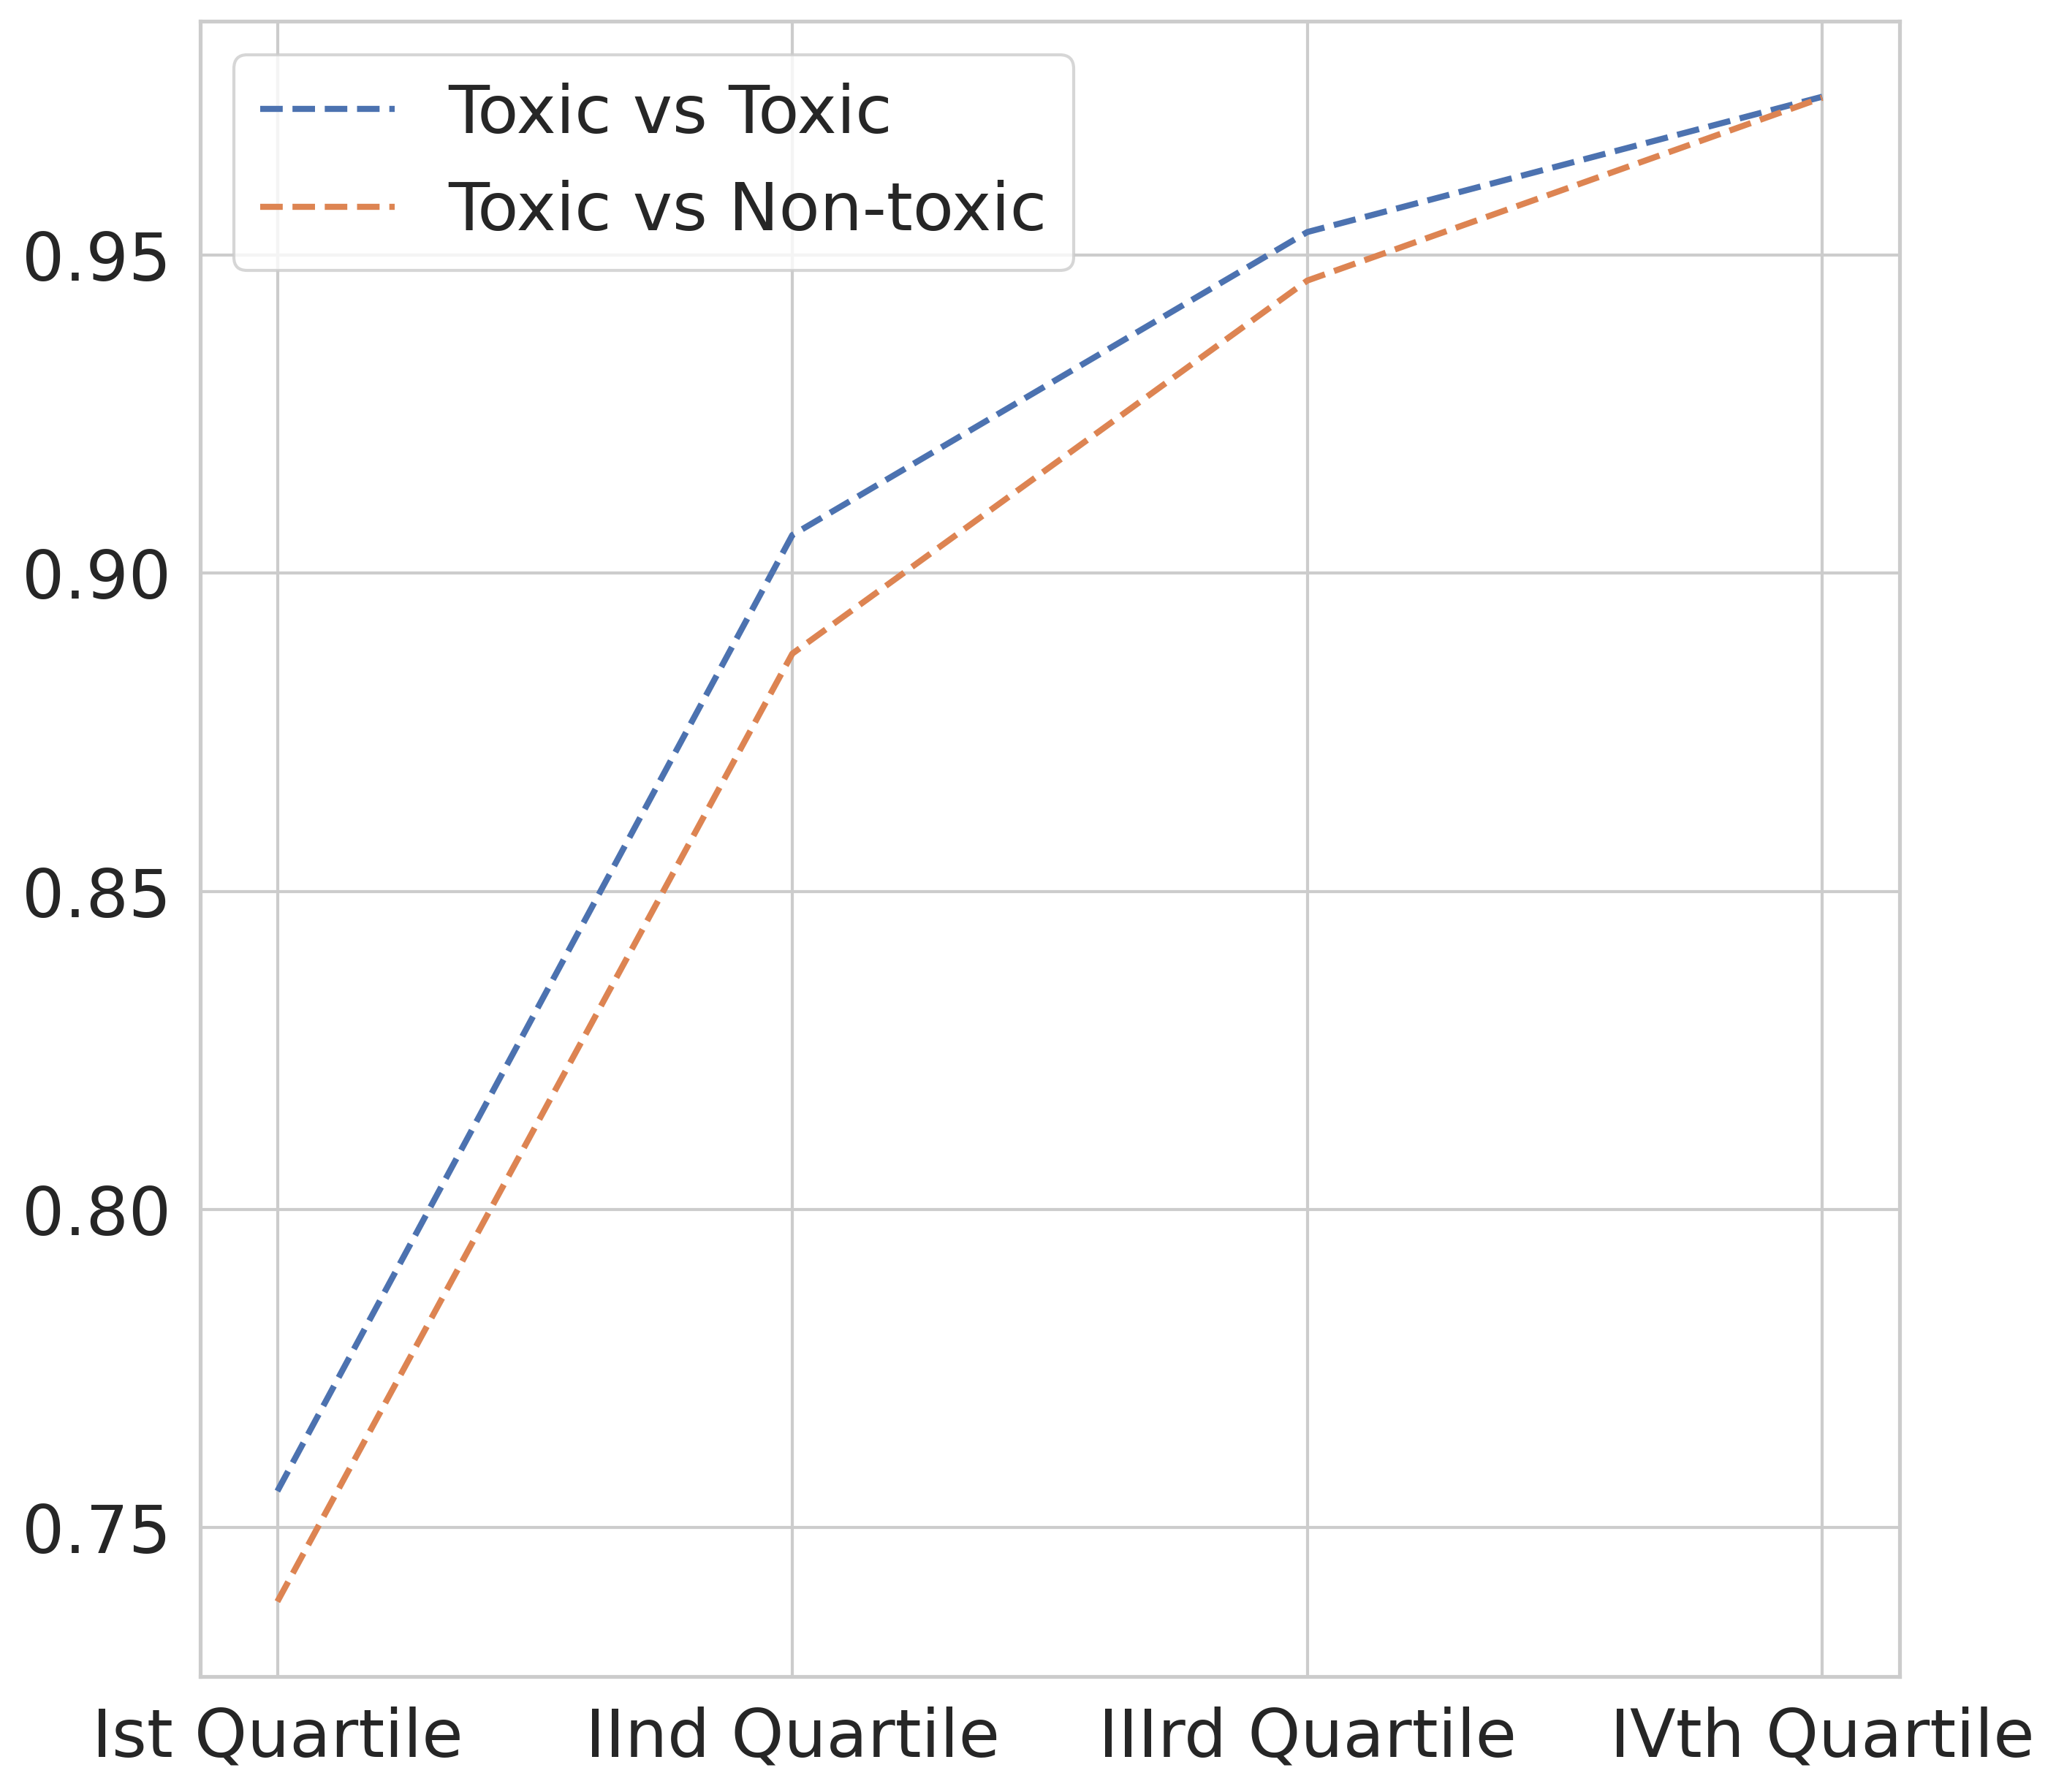

2
quantiles:
 [0.25, 0.5, 0.75]
quantile_values (for each moment):
 [0.82680515 0.9217252  0.96084598]
mean for each group and at each moment:
[0.72460814 0.8857577  0.94200869 0.97101135]
quantiles:
 [0.25, 0.5, 0.75]
quantile_values (for each moment):
 [0.82507865 0.92338935 0.95782136]
mean for each group and at each moment:
[0.71051074 0.87691885 0.93905777 0.9687791 ]


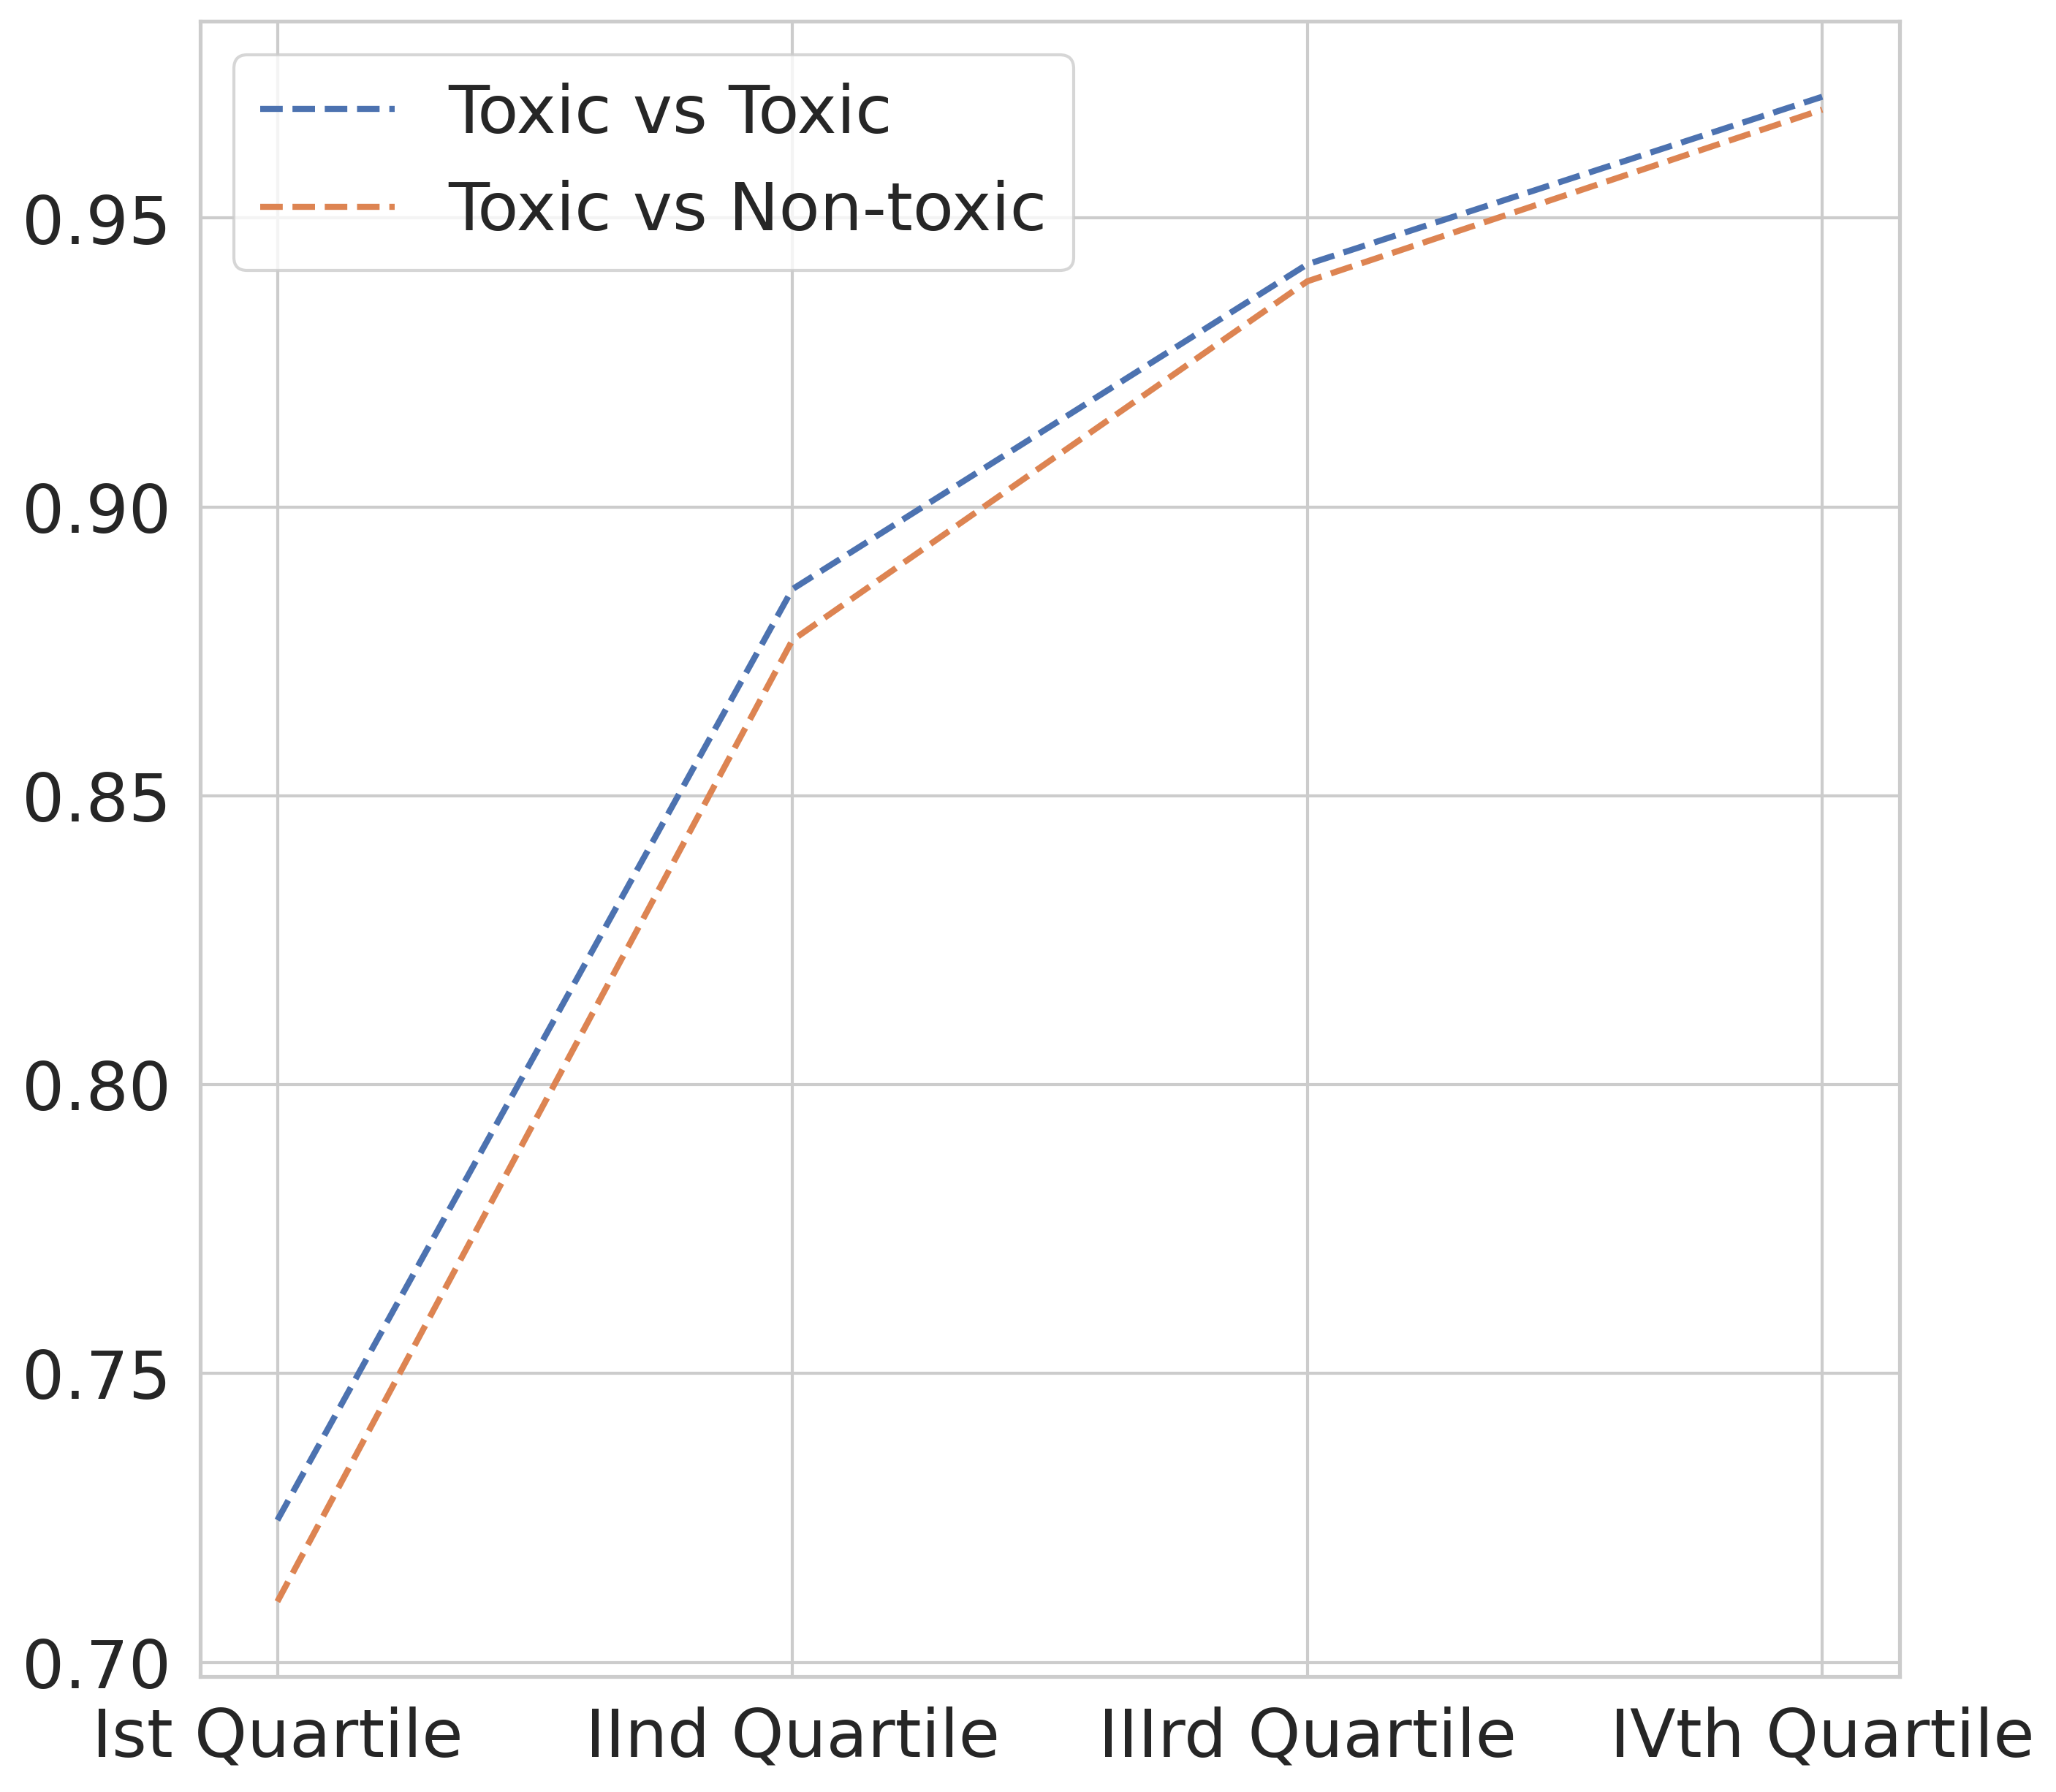

5
quantiles:
 [0.25, 0.5, 0.75]
quantile_values (for each moment):
 [0.79988251 0.90175947 0.95048075]
mean for each group and at each moment:
[0.66073434 0.8561041  0.92388801 0.96373609]
quantiles:
 [0.25, 0.5, 0.75]
quantile_values (for each moment):
 [0.78565804 0.90138433 0.94501797]
mean for each group and at each moment:
[0.65583789 0.85250559 0.92277087 0.95582705]


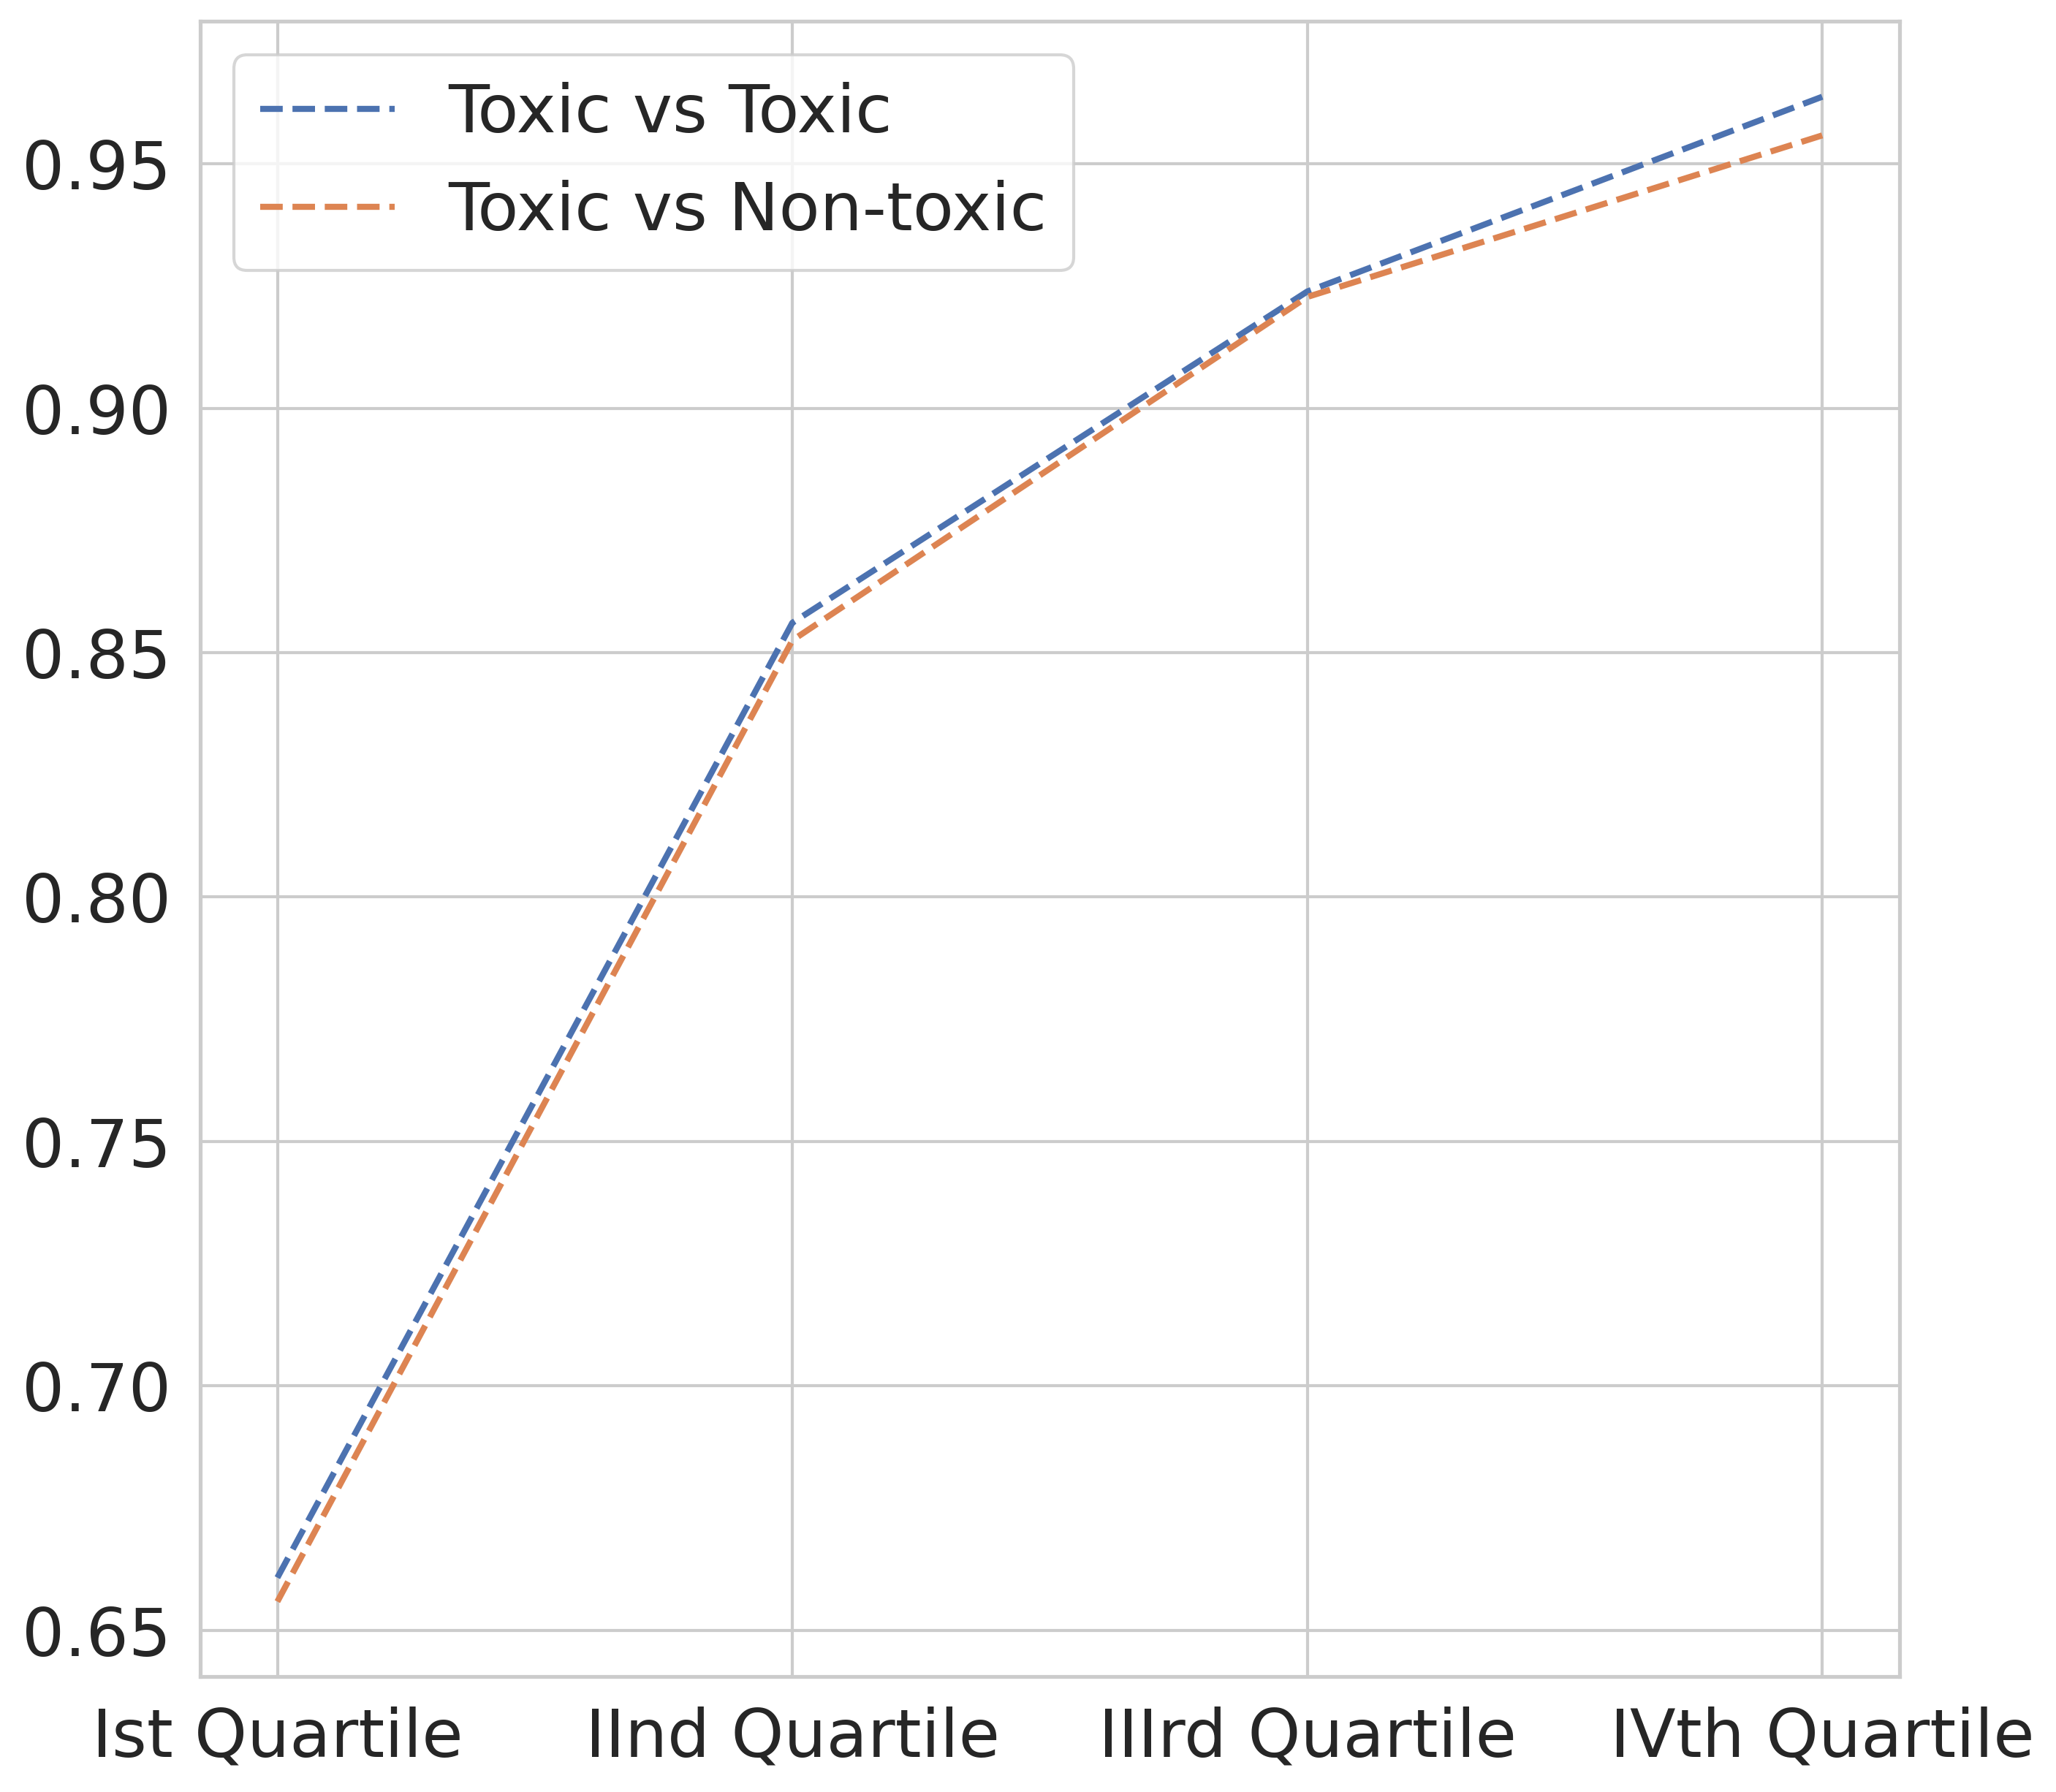

10
quantiles:
 [0.25, 0.5, 0.75]
quantile_values (for each moment):
 [0.75496822 0.86854285 0.93647423]
mean for each group and at each moment:
[0.59055225 0.82084625 0.89991783 0.95337941]
quantiles:
 [0.25, 0.5, 0.75]
quantile_values (for each moment):
 [0.75531007 0.87465299 0.92033295]
mean for each group and at each moment:
[0.59377151 0.82316099 0.90189545 0.93746039]


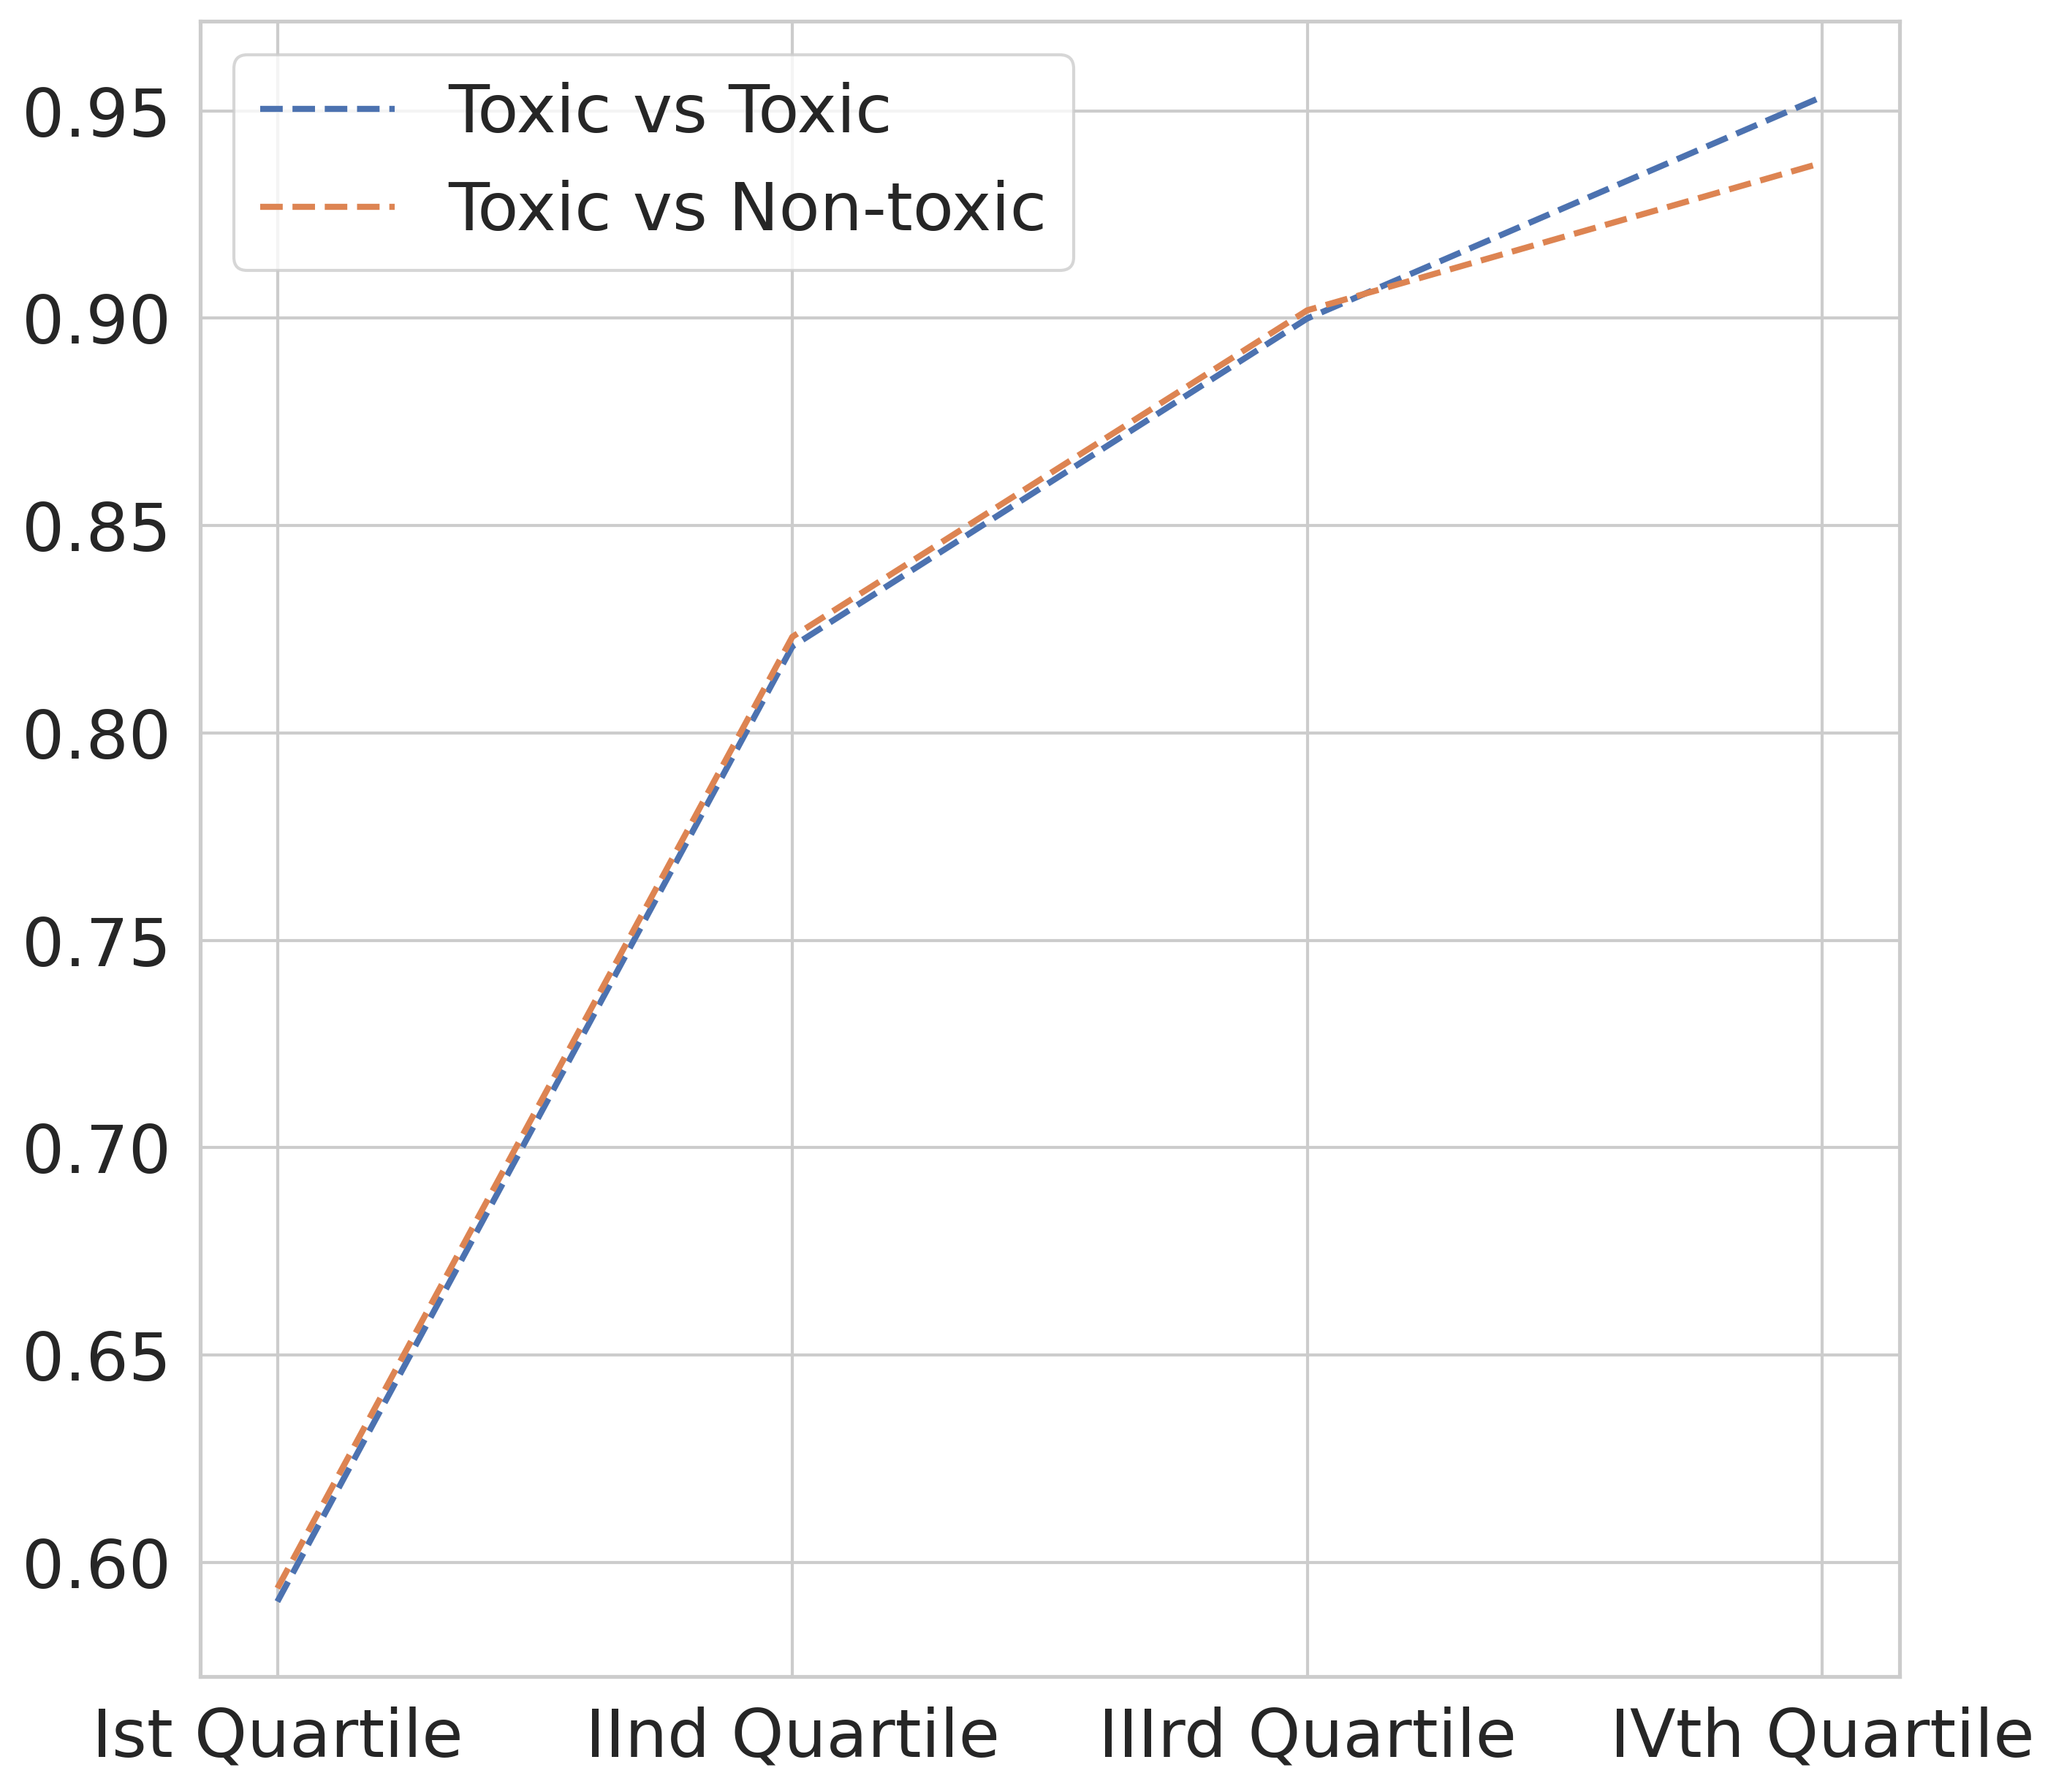

15
quantiles:
 [0.25, 0.5, 0.75]
quantile_values (for each moment):
 [0.70409002 0.8318855  0.92570723]
mean for each group and at each moment:
[0.53920715 0.78841564 0.88001127 0.94459995]
quantiles:
 [0.25, 0.5, 0.75]
quantile_values (for each moment):
 [0.73062216 0.84918109 0.90569144]
mean for each group and at each moment:
[0.54803004 0.79625029 0.88213371 0.9204961 ]


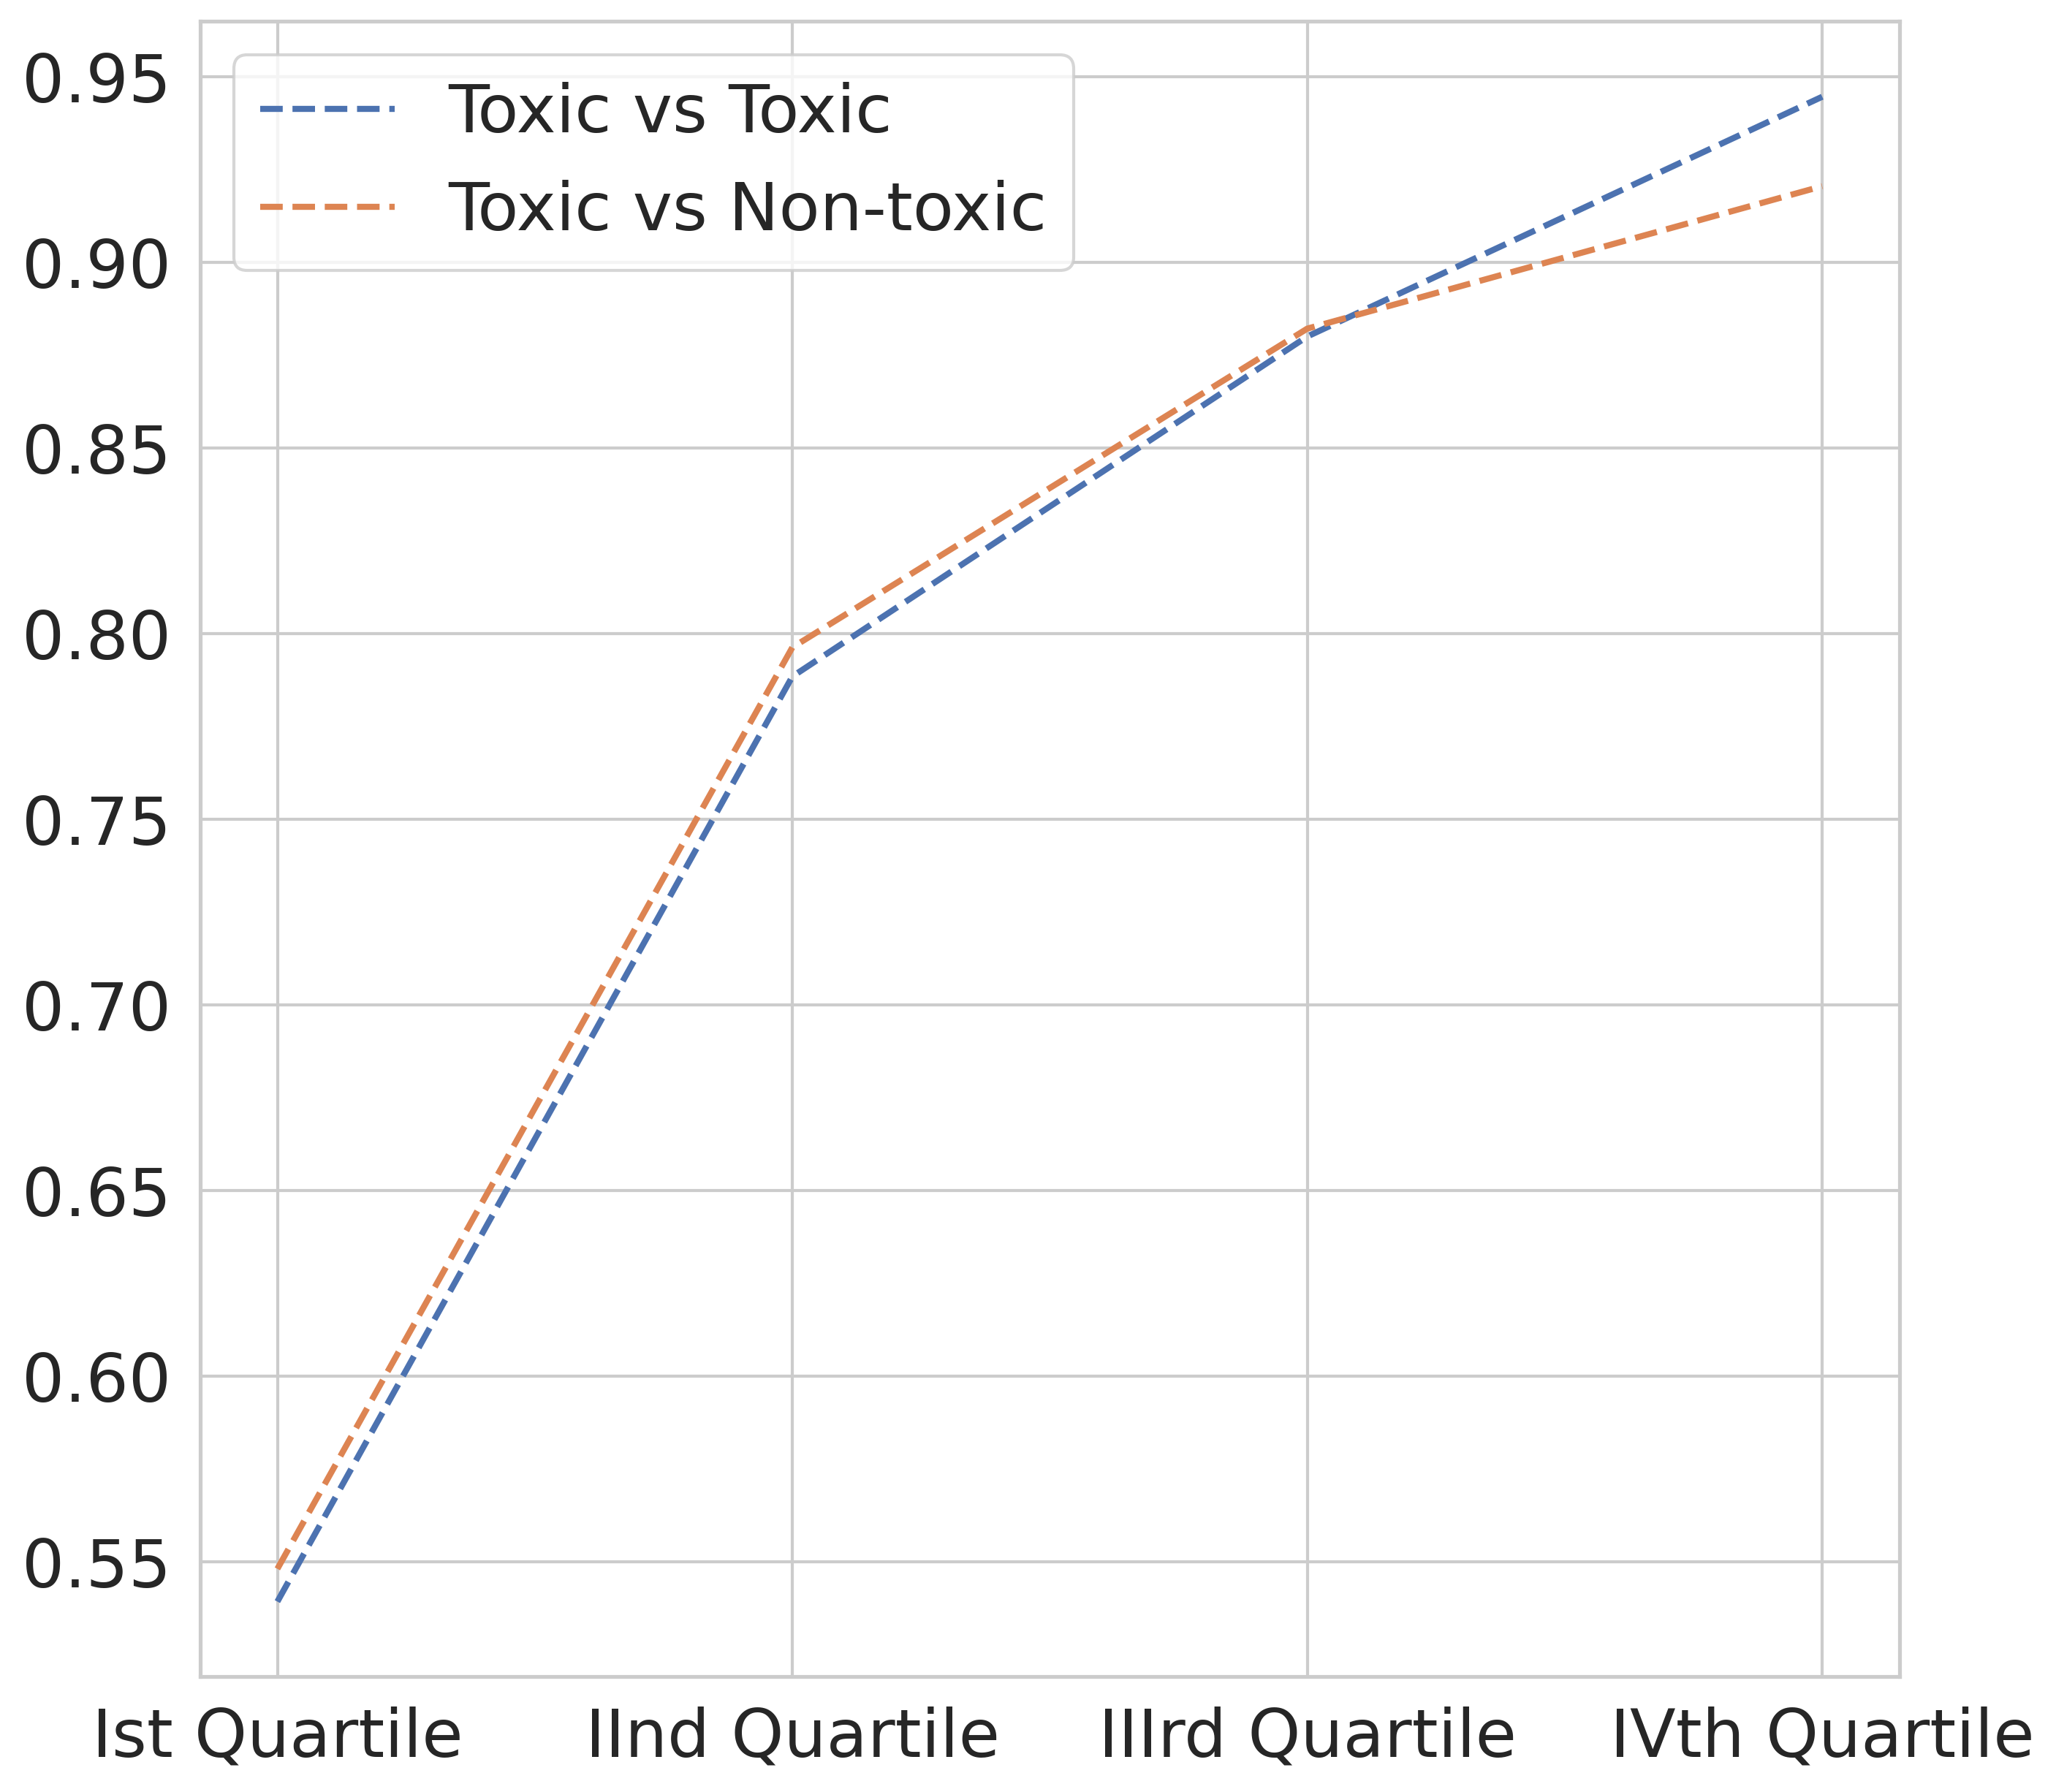

In [25]:
for neighbours in [1, 2, 5, 10, 15]:
    
    print(neighbours)
    df_final_aa_2 = pd.DataFrame()
    df_final_ai_2 = pd.DataFrame()

    for compound in toxic_compounds:
    
        pearson_positive = pd.DataFrame()
        #pearson_negative = pd.DataFrame()

        pearson_positive = df_final_aa[df_final_aa["query"]==compound].sort_values("CP_Pearson_effect", ascending=False).iloc[:neighbours, :]
        #pearson_negative=  df_final_aa[df_final_aa["query"]==compound].sort_values("CP_Pearson_effect", ascending=True).iloc[:neighbours, :]

        df_final_aa_2 = pd.concat([df_final_aa_2, pearson_positive])
        #df_final_aa_2 = pd.concat([df_final_aa_2, pearson_negative])

        df_final_aa_2 = df_final_aa_2.groupby('query').mean().sort_values("CP_Pearson_effect").reset_index()

        pearson_positive = pd.DataFrame()
        #pearson_negative = pd.DataFrame()

        pearson_positive = df_final_ai[df_final_ai["query"]==compound].sort_values("CP_Pearson_effect", ascending=False).iloc[:neighbours, :]
        #pearson_negative=  df_final_ai[df_final_ai["query"]==compound].sort_values("CP_Pearson_effect", ascending=True).iloc[:neighbours, :]

        df_final_ai_2 = pd.concat([df_final_ai_2, pearson_positive])
        #df_final_ai_2 = pd.concat([df_final_ai_2, pearson_negative])

        #df_final_ai_2["CP_Pearson_effect"]=abs(df_final_ai_2["CP_Pearson_effect"])
        df_final_ai_2 = df_final_ai_2.groupby('query').mean().sort_values("CP_Pearson_effect").reset_index()


    #df_final_aa_2["CP_Pearson_effect"]=abs(df_final_aa_2["CP_Pearson_effect"])
    df_final_aa_2 = df_final_aa_2.groupby('query').mean().sort_values("CP_Pearson_effect").reset_index()

    #df_final_aa_2["CP_Pearson_effect"]=abs(df_final_aa_2["CP_Pearson_effect"])
    df_final_ai_2 = df_final_ai_2.groupby('query').mean().sort_values("CP_Pearson_effect").reset_index()
   
    quantile_curves_aa = pd.DataFrame()
    quantile_curves_ai = pd.DataFrame()
    quantile_curves_aa = quantile_curves(np.array(df_final_aa_2["CP_Pearson_effect"]))
    quantile_curves_ai = quantile_curves(np.array(df_final_ai_2["CP_Pearson_effect"]))
    
    Quantile_k_aa = pd.DataFrame(quantile_curves_aa, columns=["Toxic vs Toxic"] , index=['Ist Quartile', 'IInd Quartile', 'IIIrd Quartile','IVth Quartile'])
    Quantile_k_ai =  pd.DataFrame(quantile_curves_ai, columns=["Toxic vs Non-toxic"] , index=['Ist Quartile', 'IInd Quartile', 'IIIrd Quartile','IVth Quartile'])
    
    plt.figure(figsize=(10,10), dpi=300)
    #plt.title(neighbours)
    plt.plot( 'Toxic vs Toxic', data=Quantile_k_aa, marker='', linewidth=2, linestyle='dashed', label="Toxic vs Toxic")
    plt.plot( 'Toxic vs Non-toxic', data=Quantile_k_ai, marker='', linewidth=2, linestyle='dashed', label="Toxic vs Non-toxic")
    plt.legend()
    plt.show()

1
quantiles:
 [0.25, 0.5, 0.75]
quantile_values (for each moment):
 [0.85397399 0.93760247 0.96276663]
mean for each group and at each moment:
[0.75573689 0.9059894  0.95360617 0.97487126]
quantiles:
 [0.25, 0.5, 0.75]
quantile_values (for each moment):
 [0.83275147 0.92690293 0.9630287 ]
mean for each group and at each moment:
[0.73837491 0.88735279 0.94597936 0.97471383]


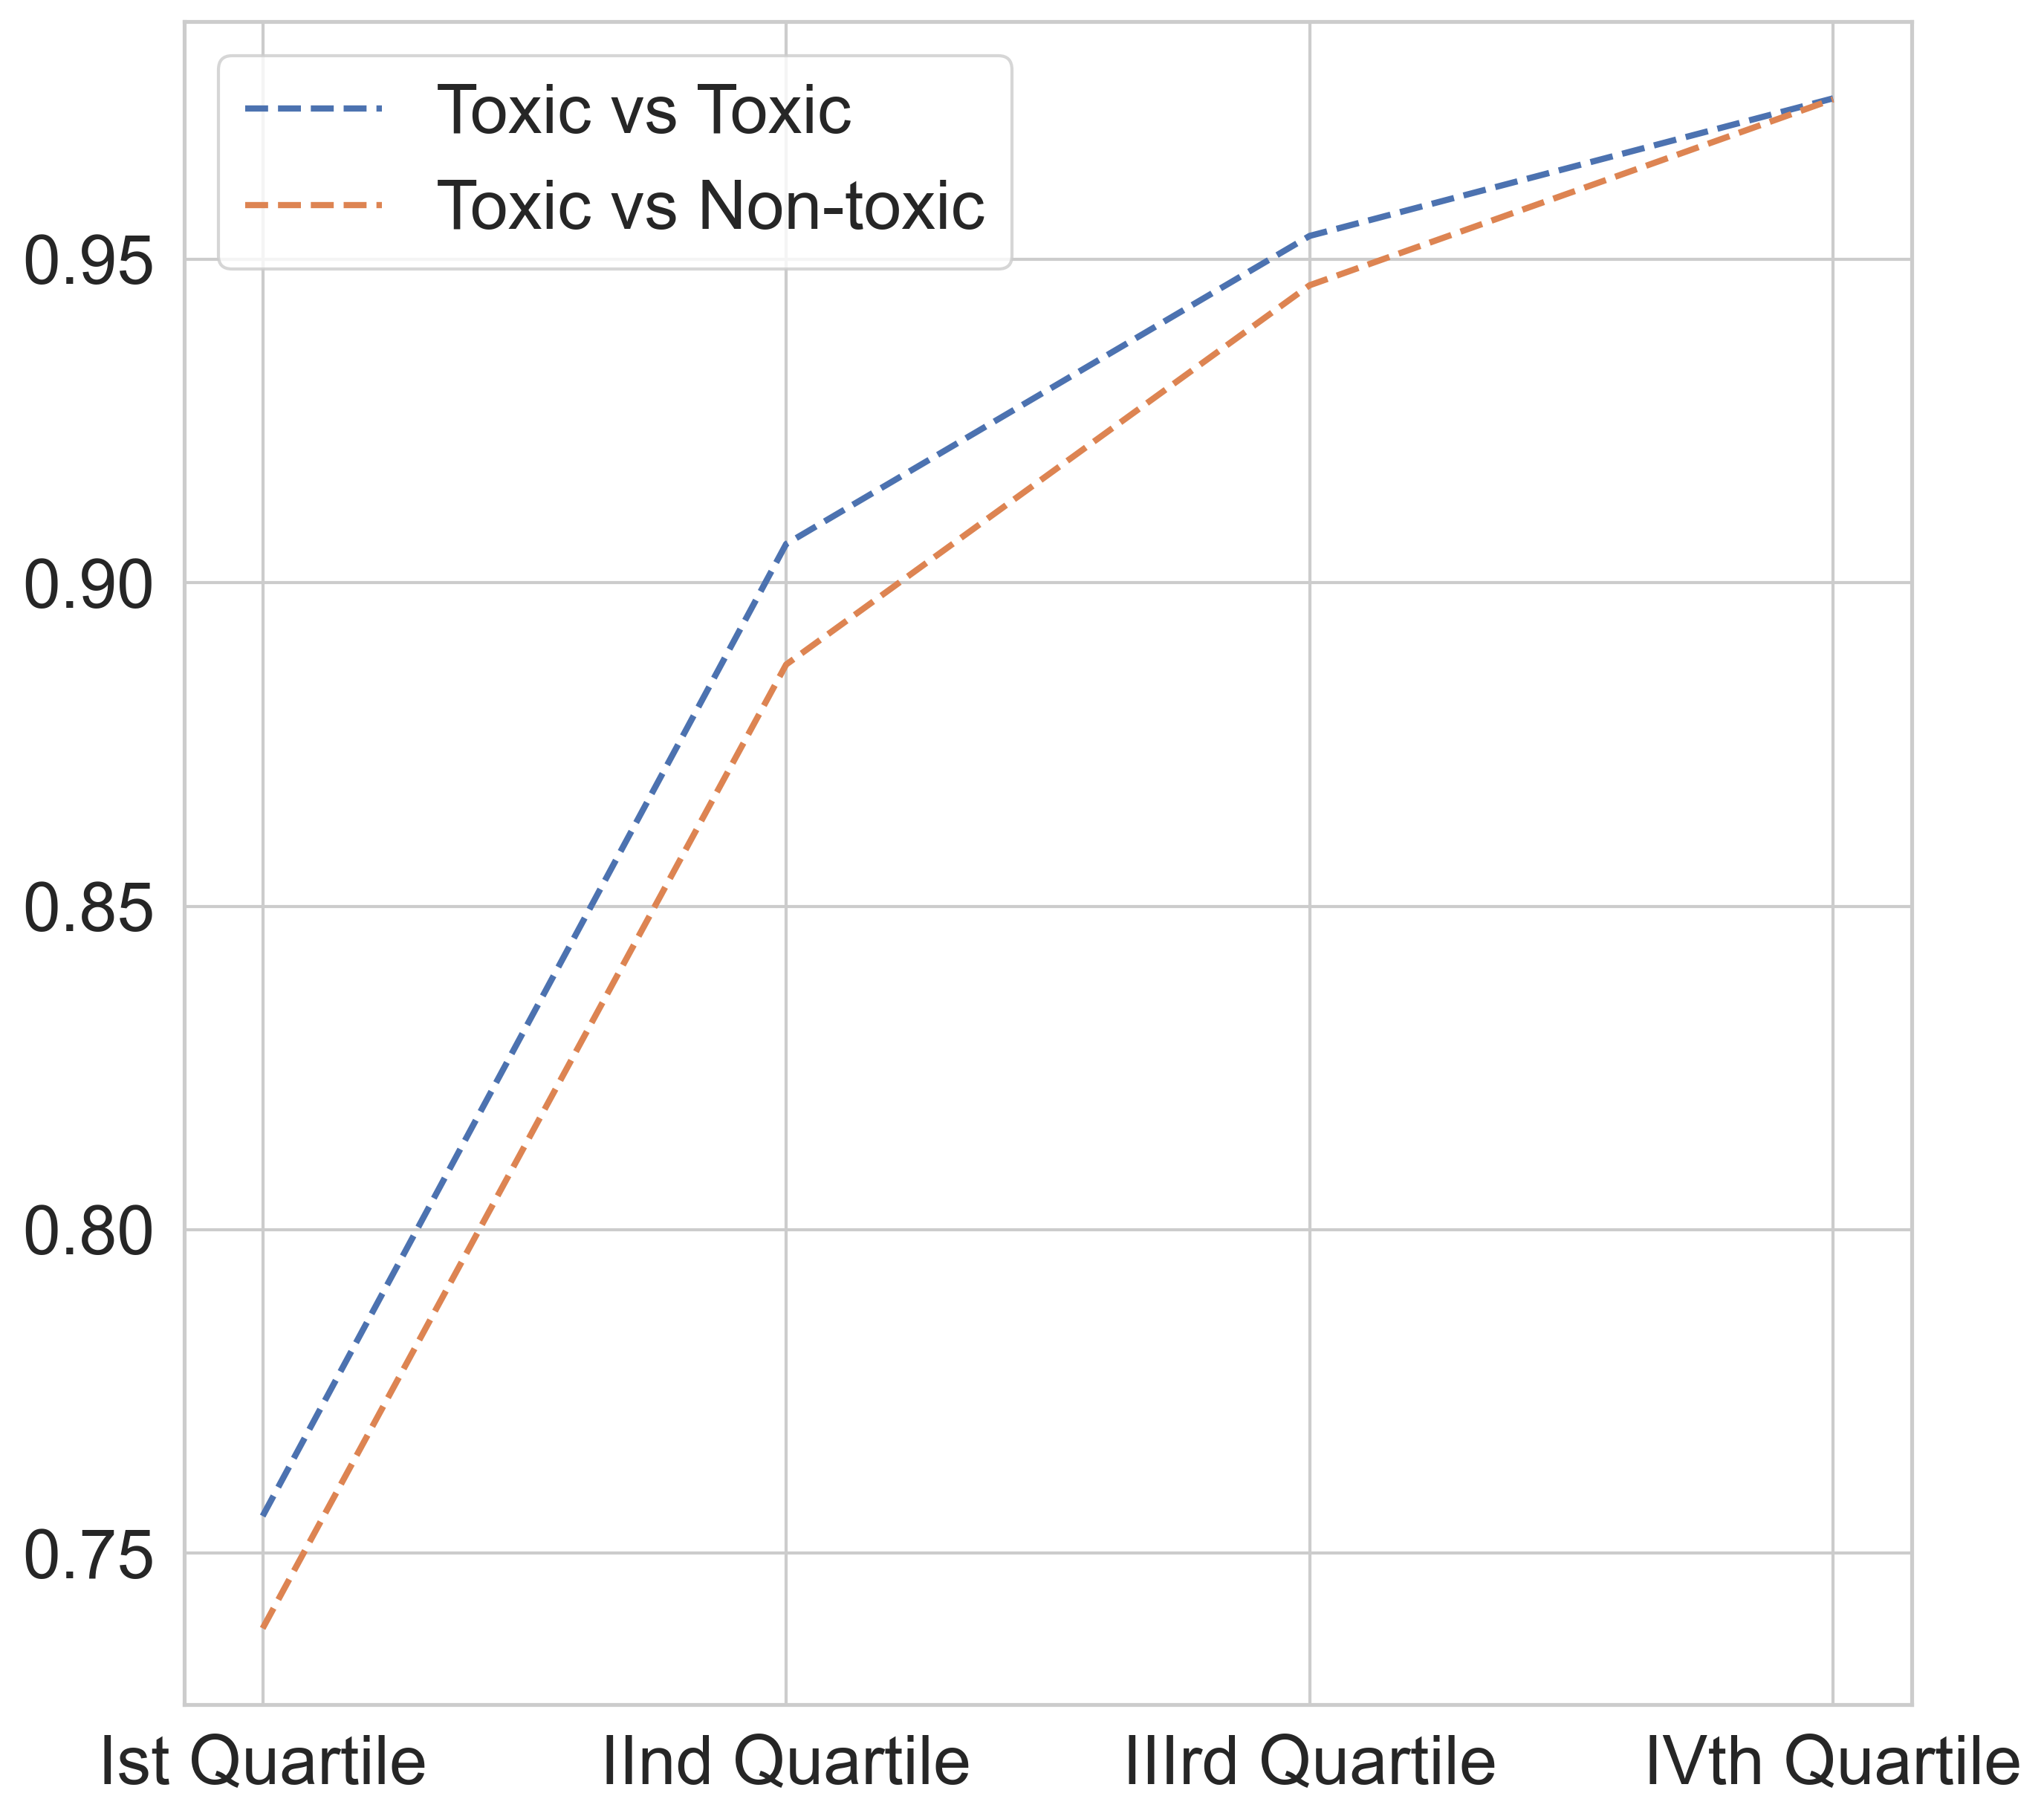

2
quantiles:
 [0.25, 0.5, 0.75]
quantile_values (for each moment):
 [0.82680515 0.9217252  0.96084598]
mean for each group and at each moment:
[0.72460814 0.8857577  0.94200869 0.97101135]
quantiles:
 [0.25, 0.5, 0.75]
quantile_values (for each moment):
 [0.82507865 0.92338935 0.95782136]
mean for each group and at each moment:
[0.71051074 0.87691885 0.93905777 0.9687791 ]


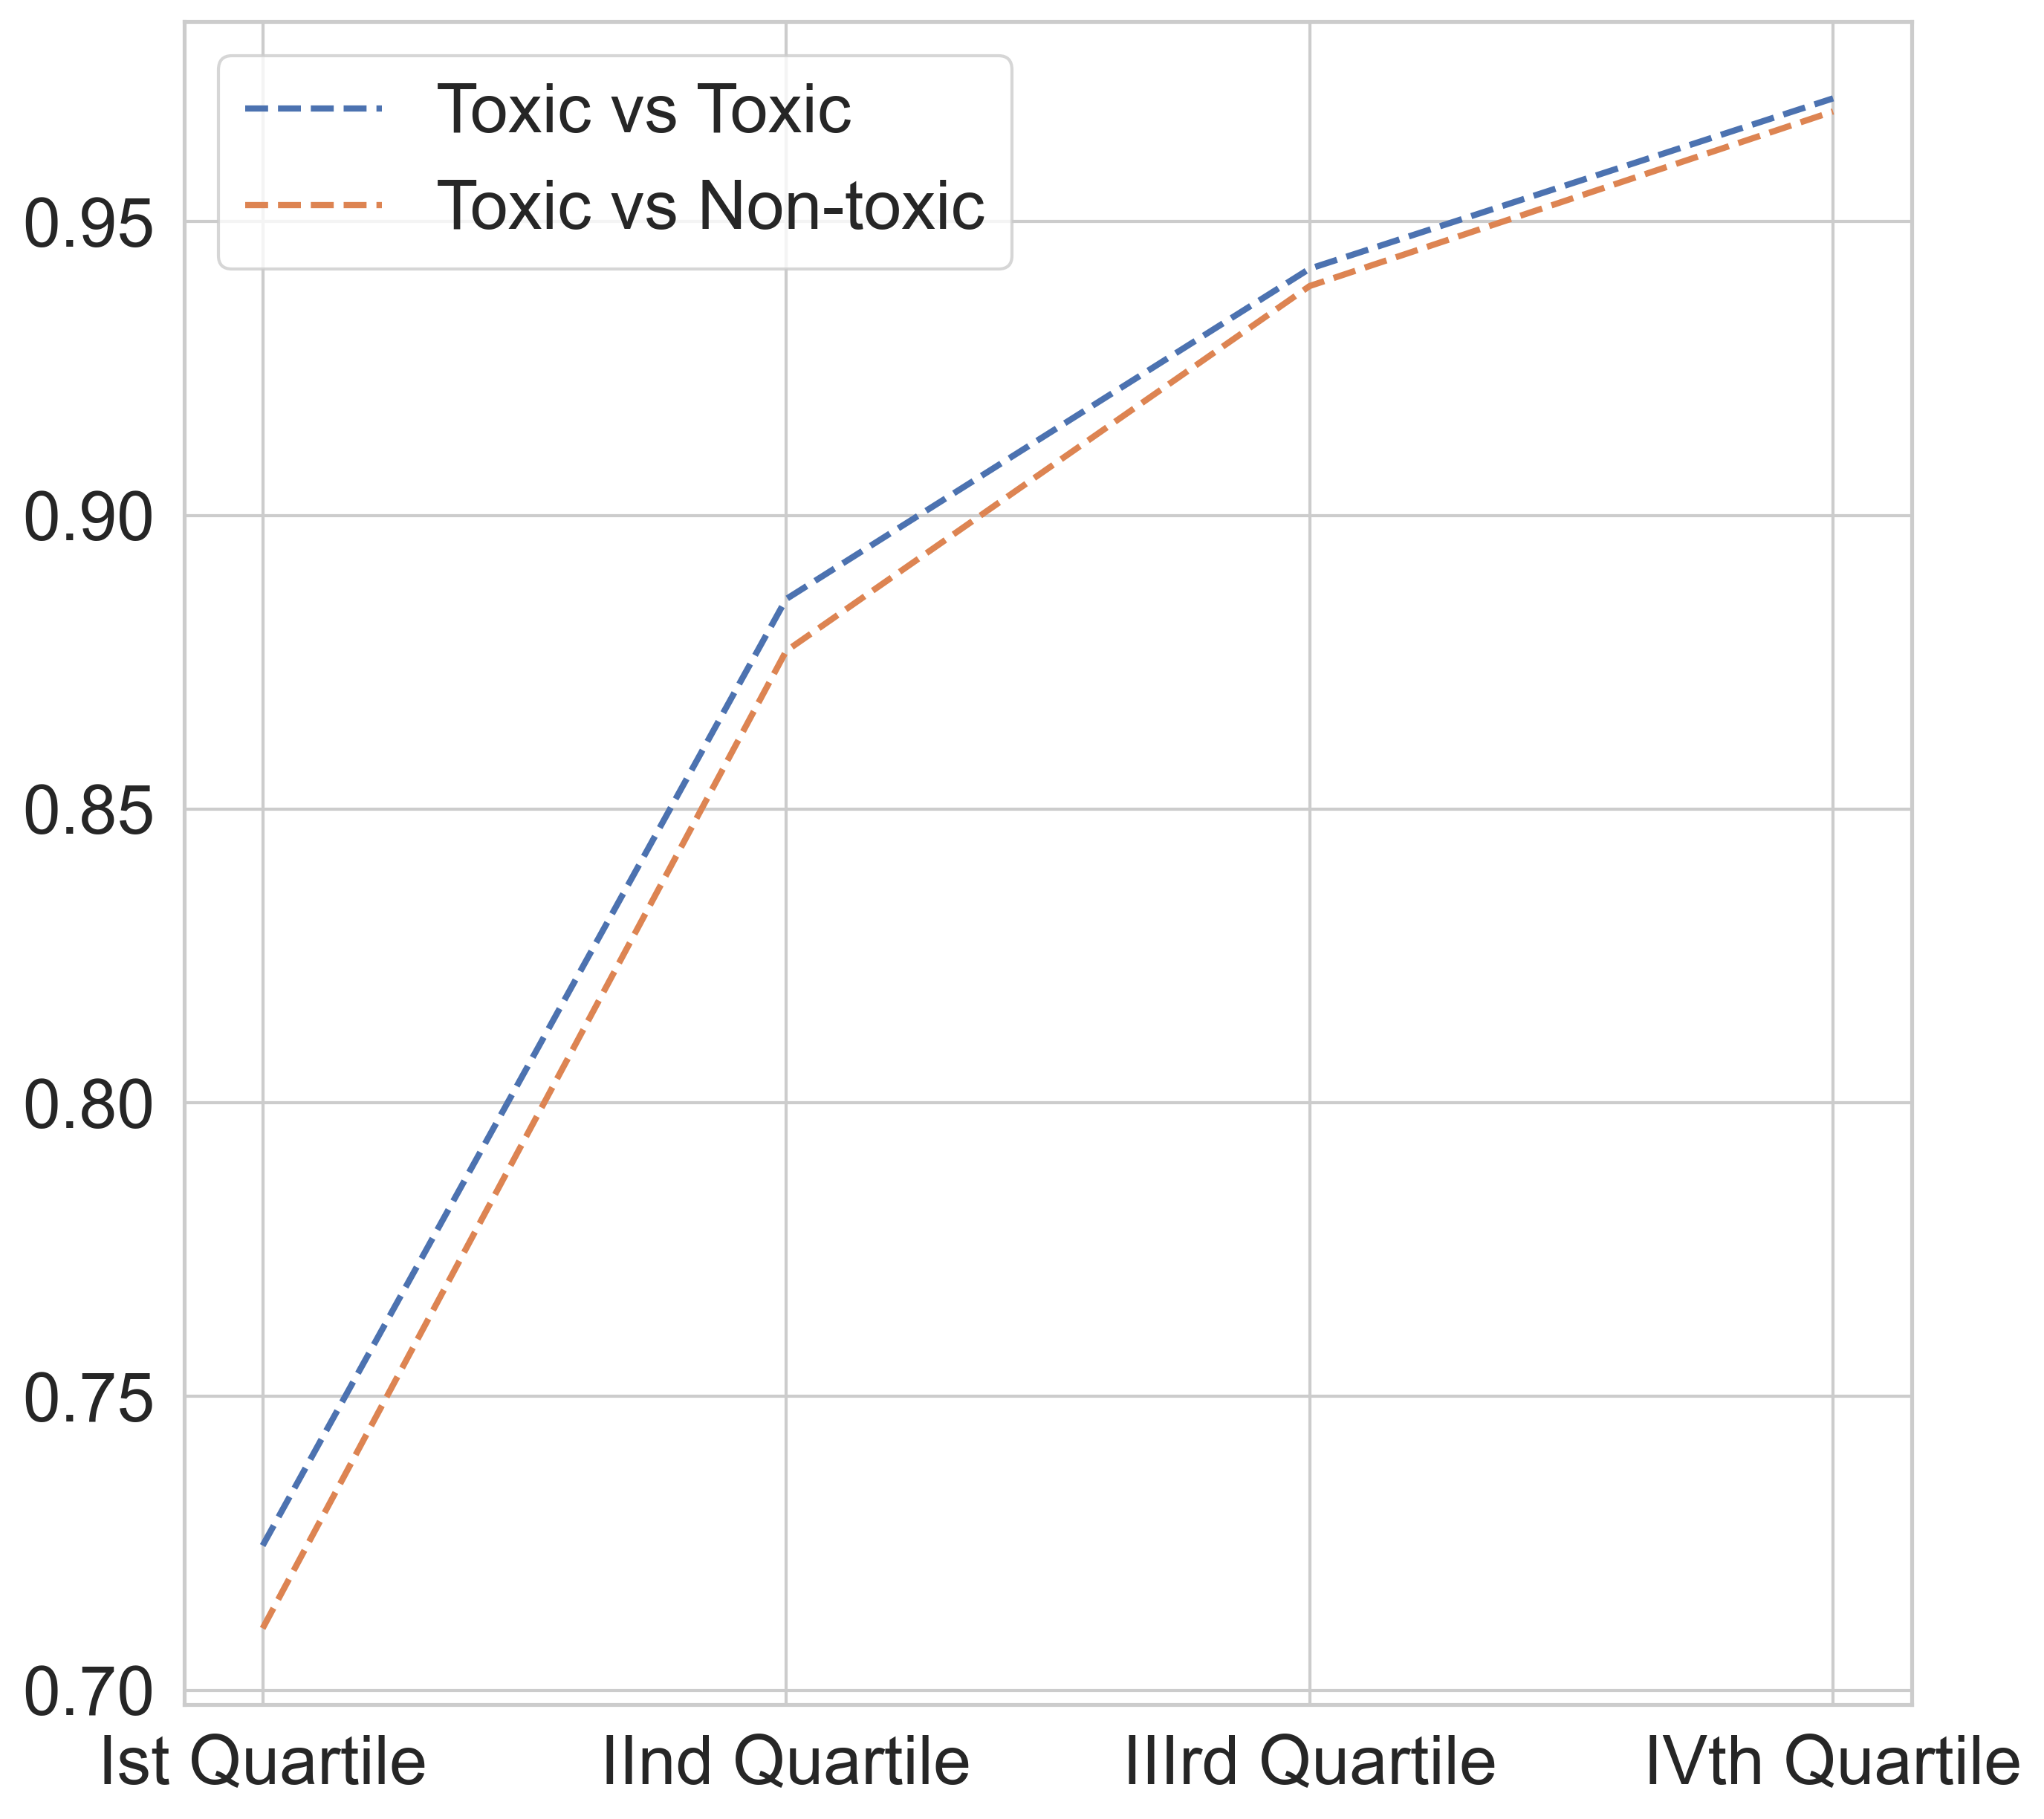

5
quantiles:
 [0.25, 0.5, 0.75]
quantile_values (for each moment):
 [0.80108879 0.89678424 0.94584823]
mean for each group and at each moment:
[0.65136576 0.85153223 0.92216417 0.96354451]
quantiles:
 [0.25, 0.5, 0.75]
quantile_values (for each moment):
 [0.803782   0.89848275 0.94197492]
mean for each group and at each moment:
[0.64608544 0.85077867 0.92204293 0.95534066]


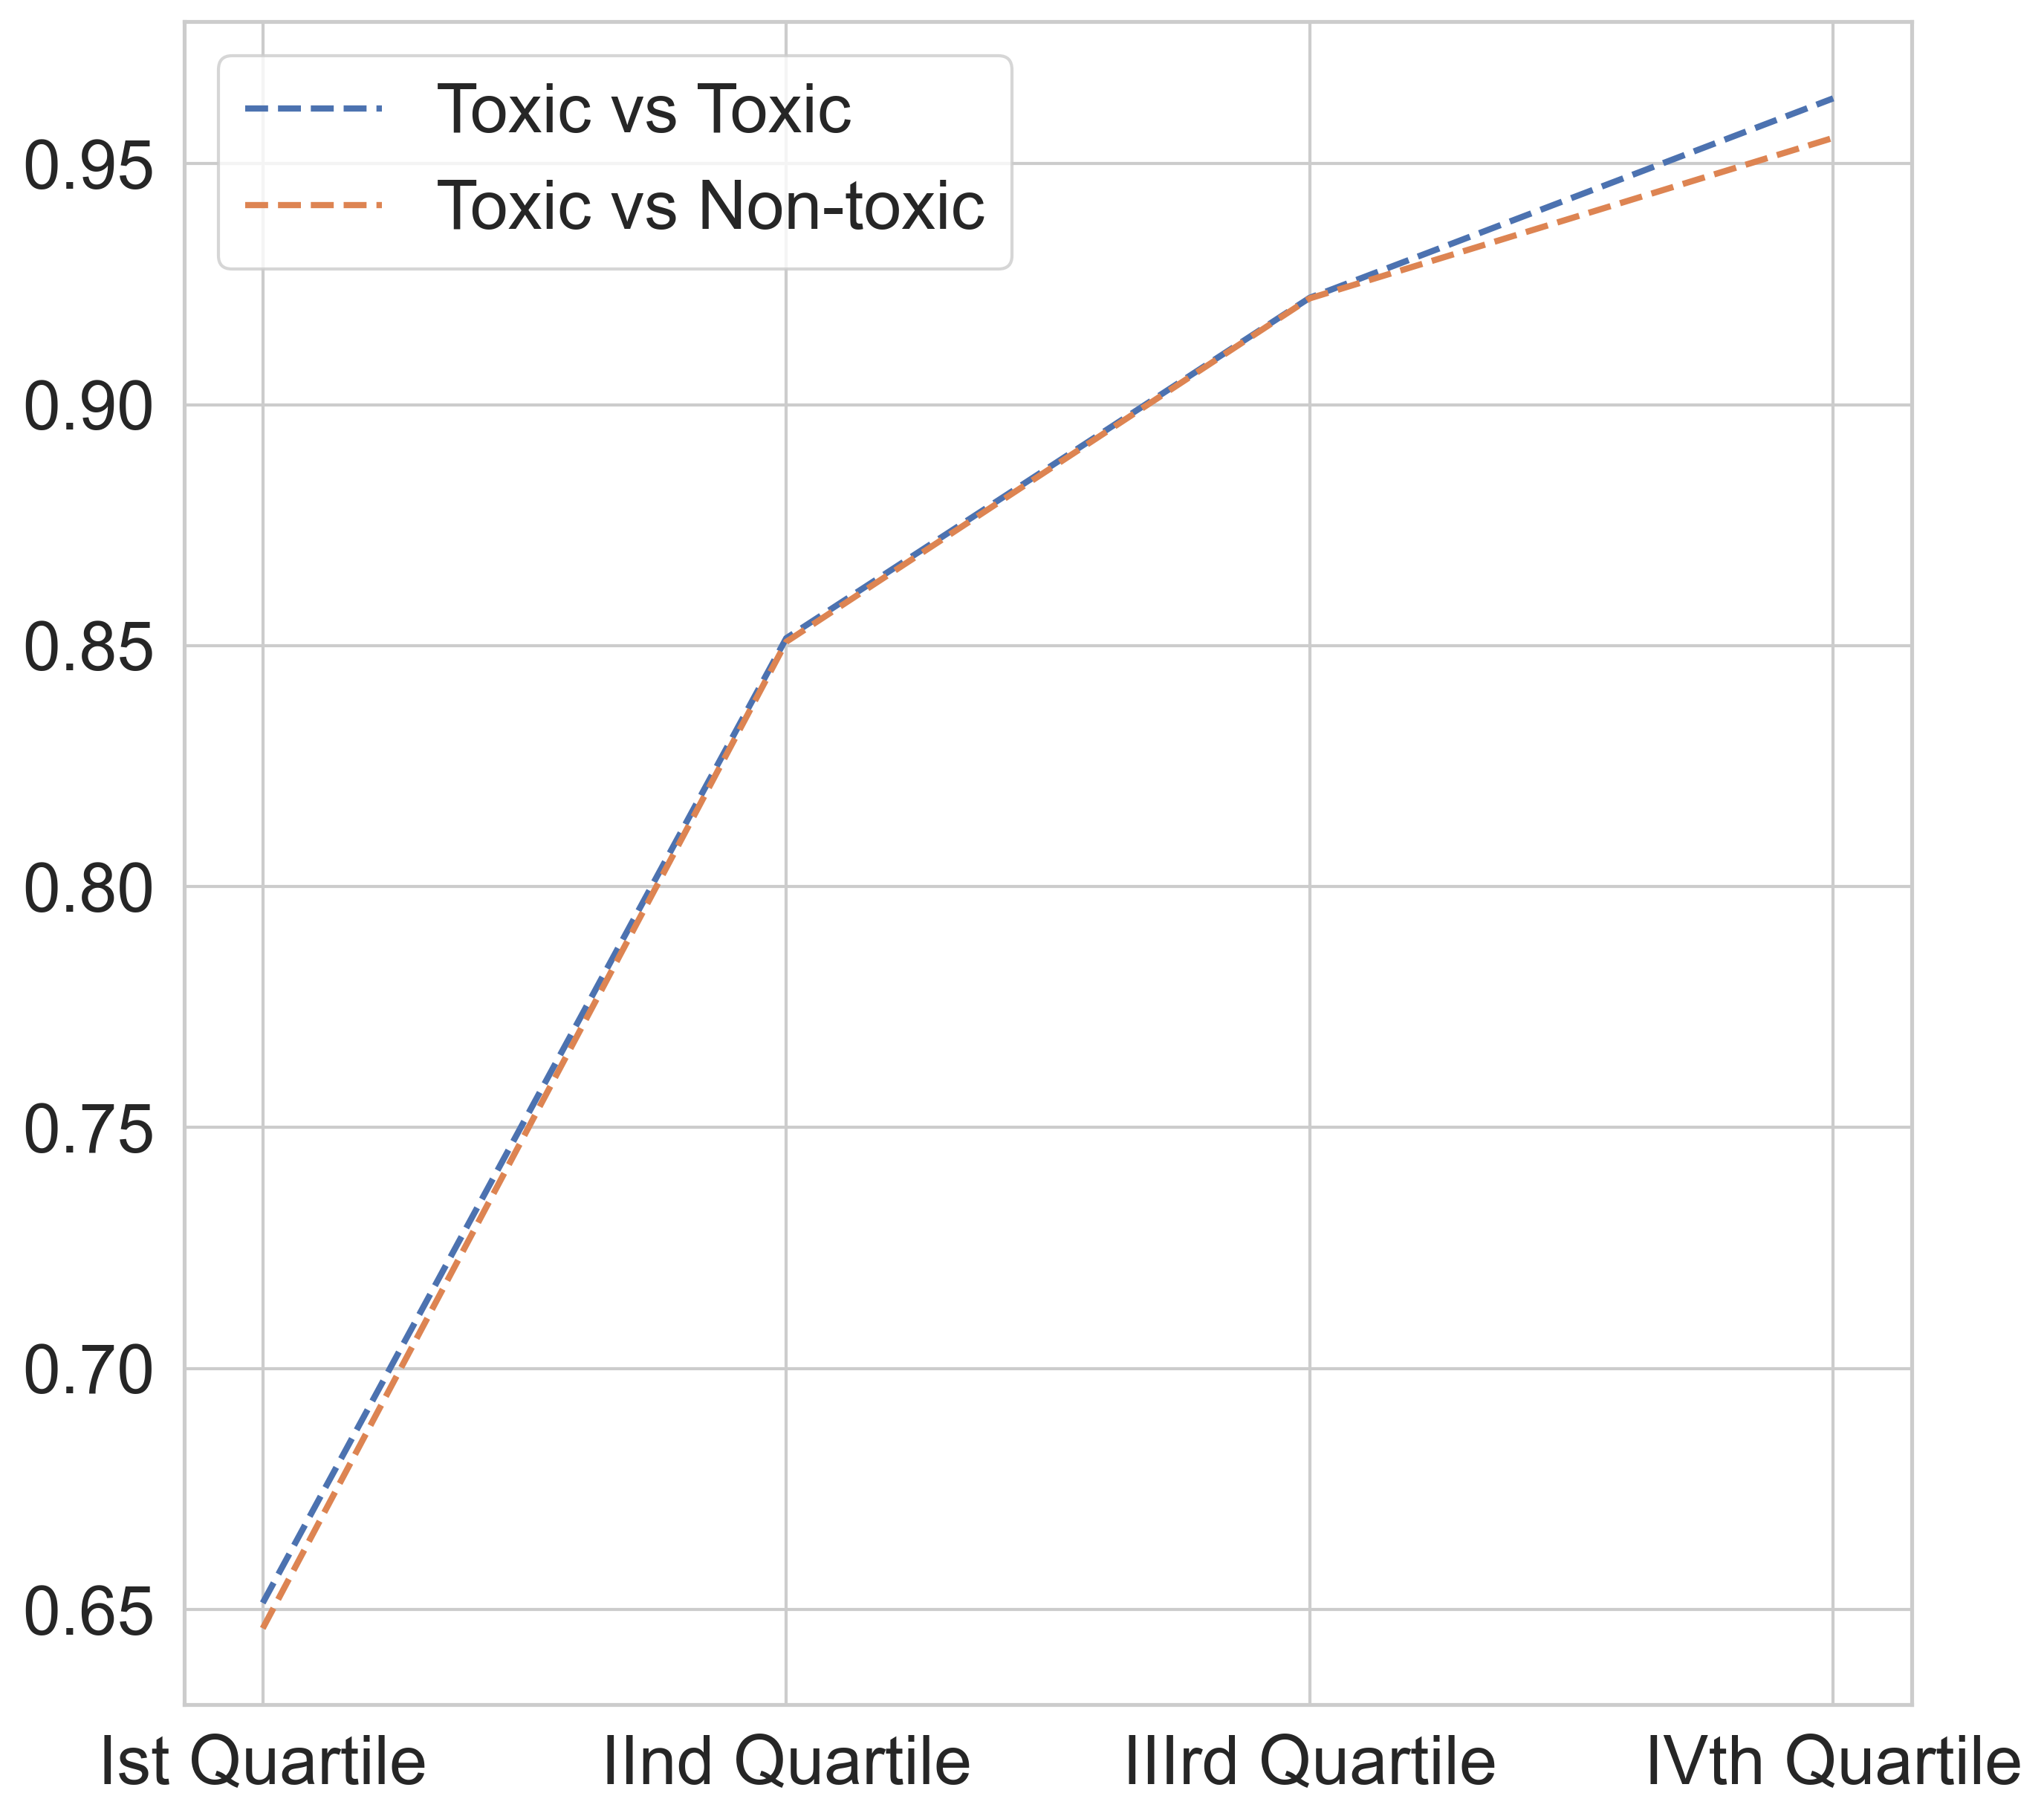

10
quantiles:
 [0.25, 0.5, 0.75]
quantile_values (for each moment):
 [0.74848669 0.86613393 0.93717981]
mean for each group and at each moment:
[0.57339109 0.81431121 0.89752535 0.95287038]
quantiles:
 [0.25, 0.5, 0.75]
quantile_values (for each moment):
 [0.75457866 0.86854937 0.91879129]
mean for each group and at each moment:
[0.58110462 0.81792094 0.89841331 0.93639703]


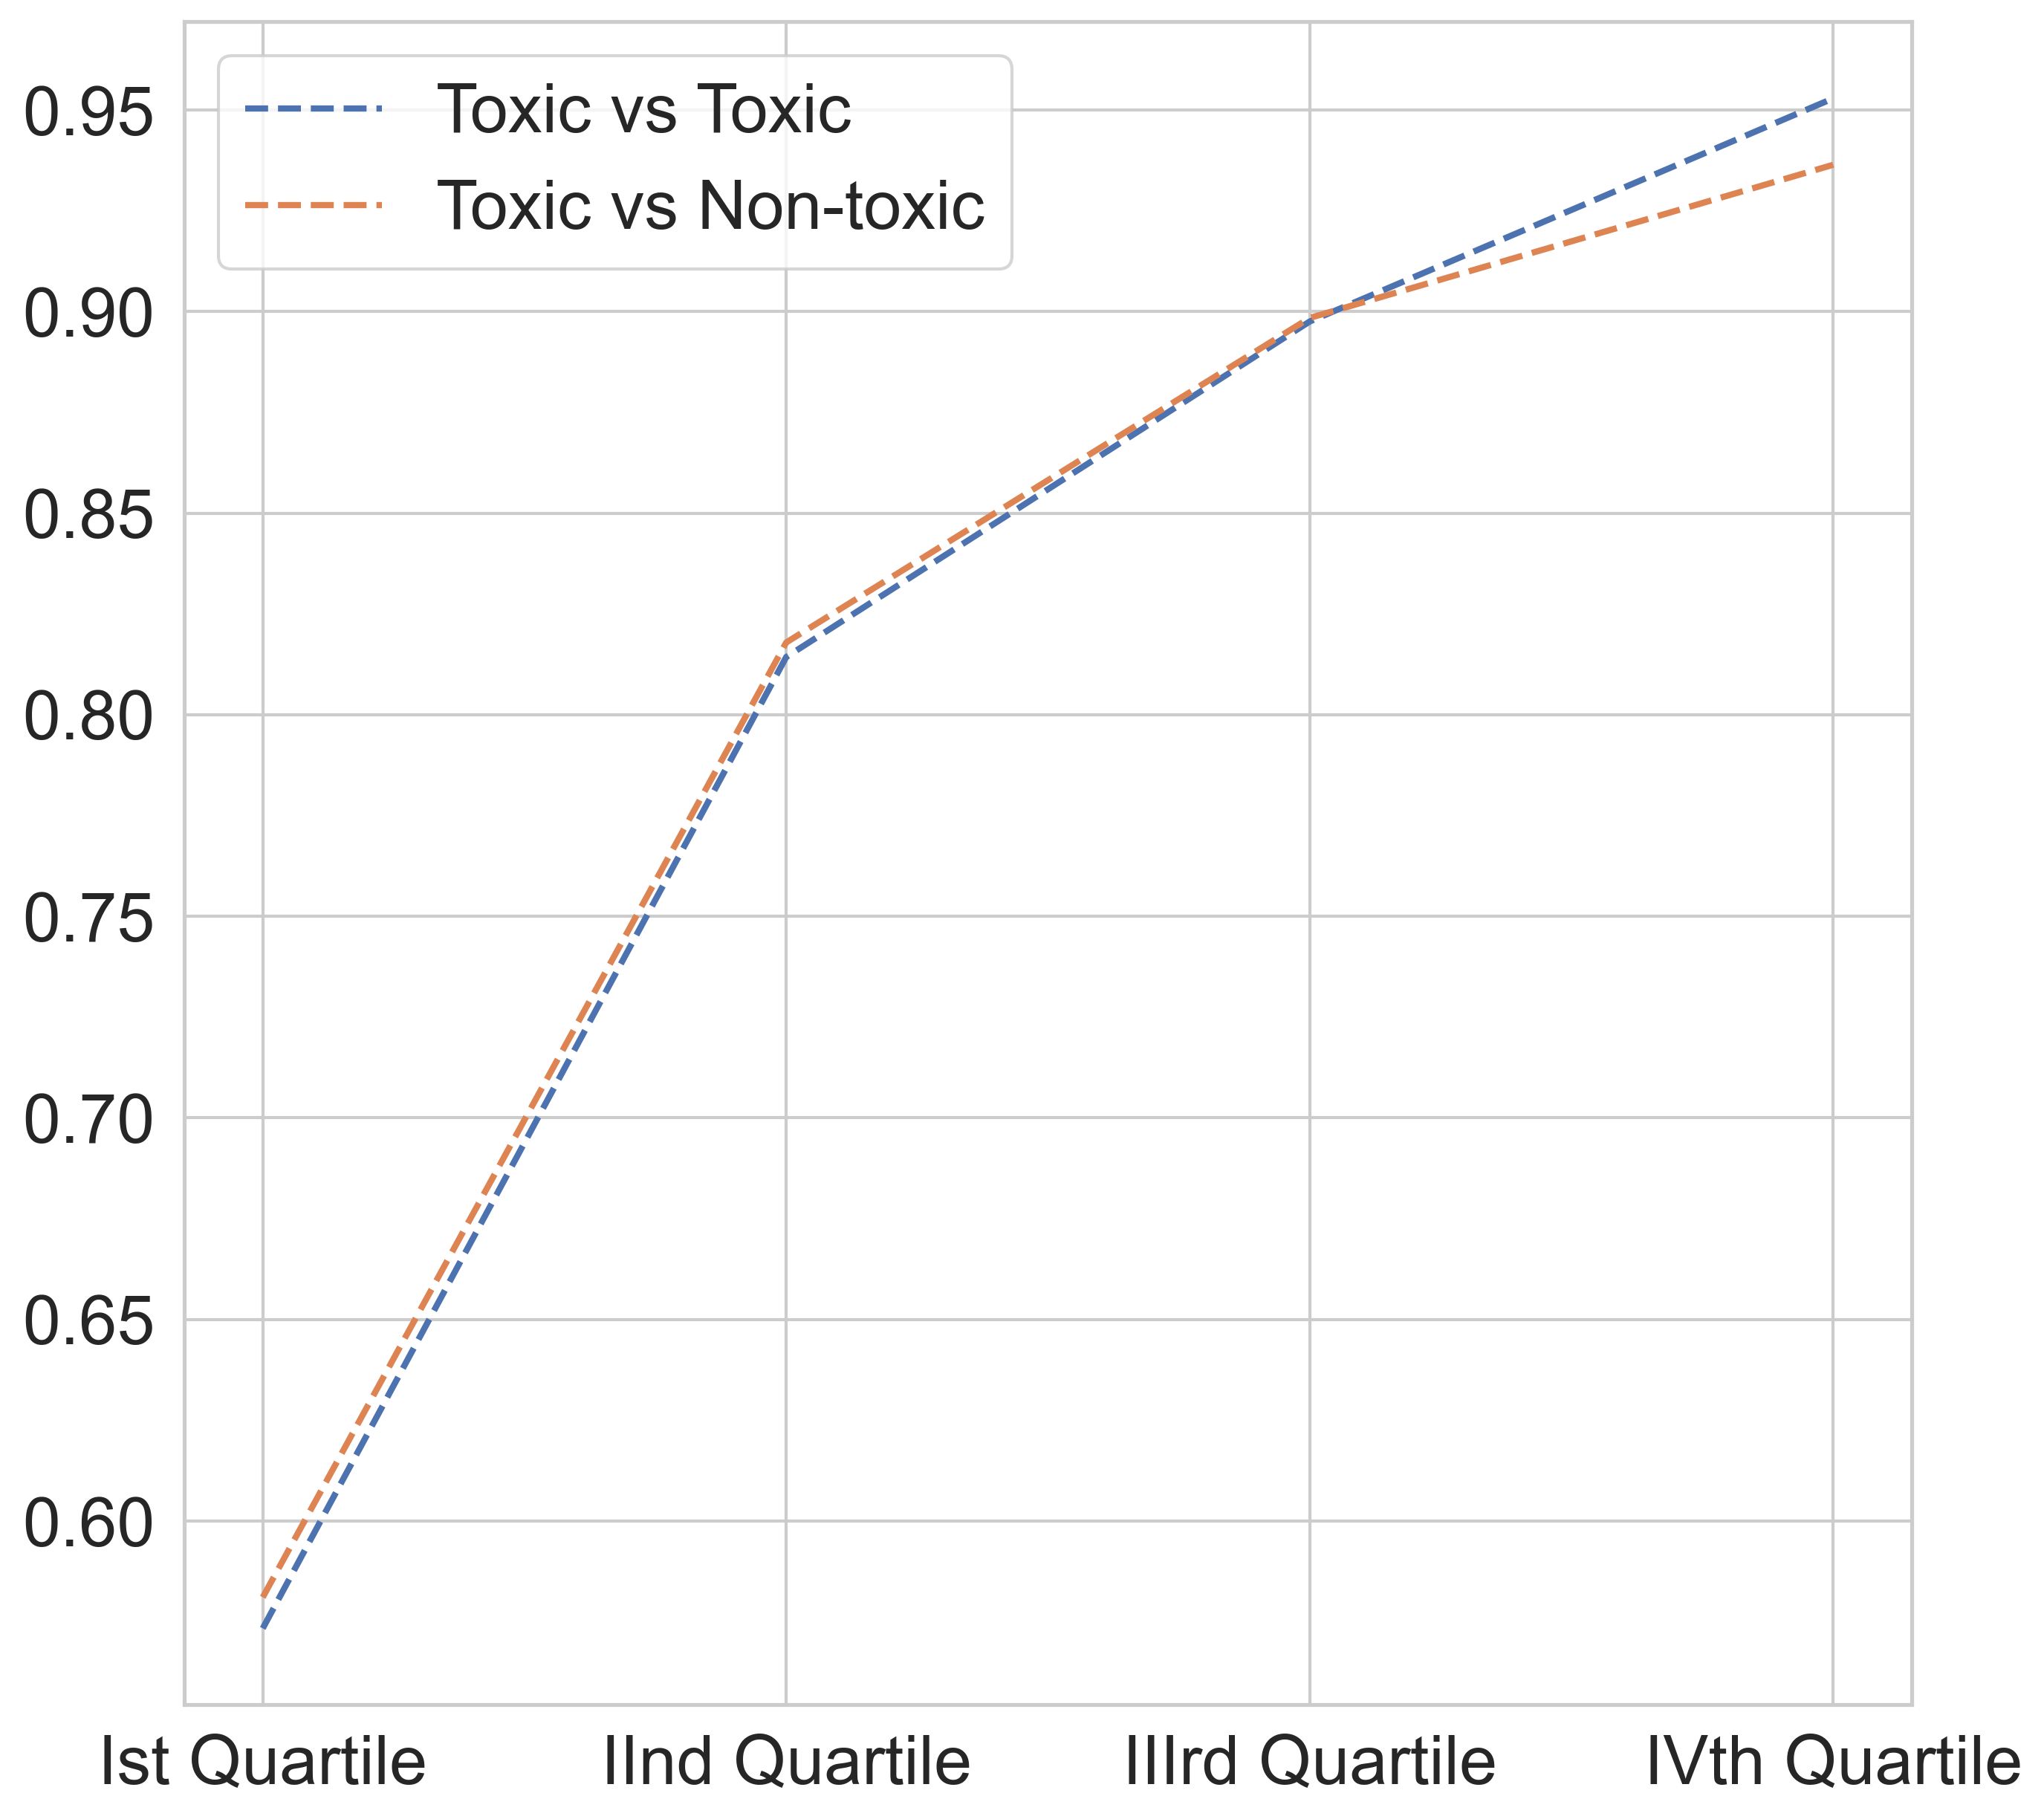

15
quantiles:
 [0.25, 0.5, 0.75]
quantile_values (for each moment):
 [0.71926467 0.82398073 0.92252411]
mean for each group and at each moment:
[0.5199371  0.78383662 0.8781643  0.94306859]
quantiles:
 [0.25, 0.5, 0.75]
quantile_values (for each moment):
 [0.73048405 0.85083285 0.90044831]
mean for each group and at each moment:
[0.52896304 0.79209673 0.88208253 0.92037219]


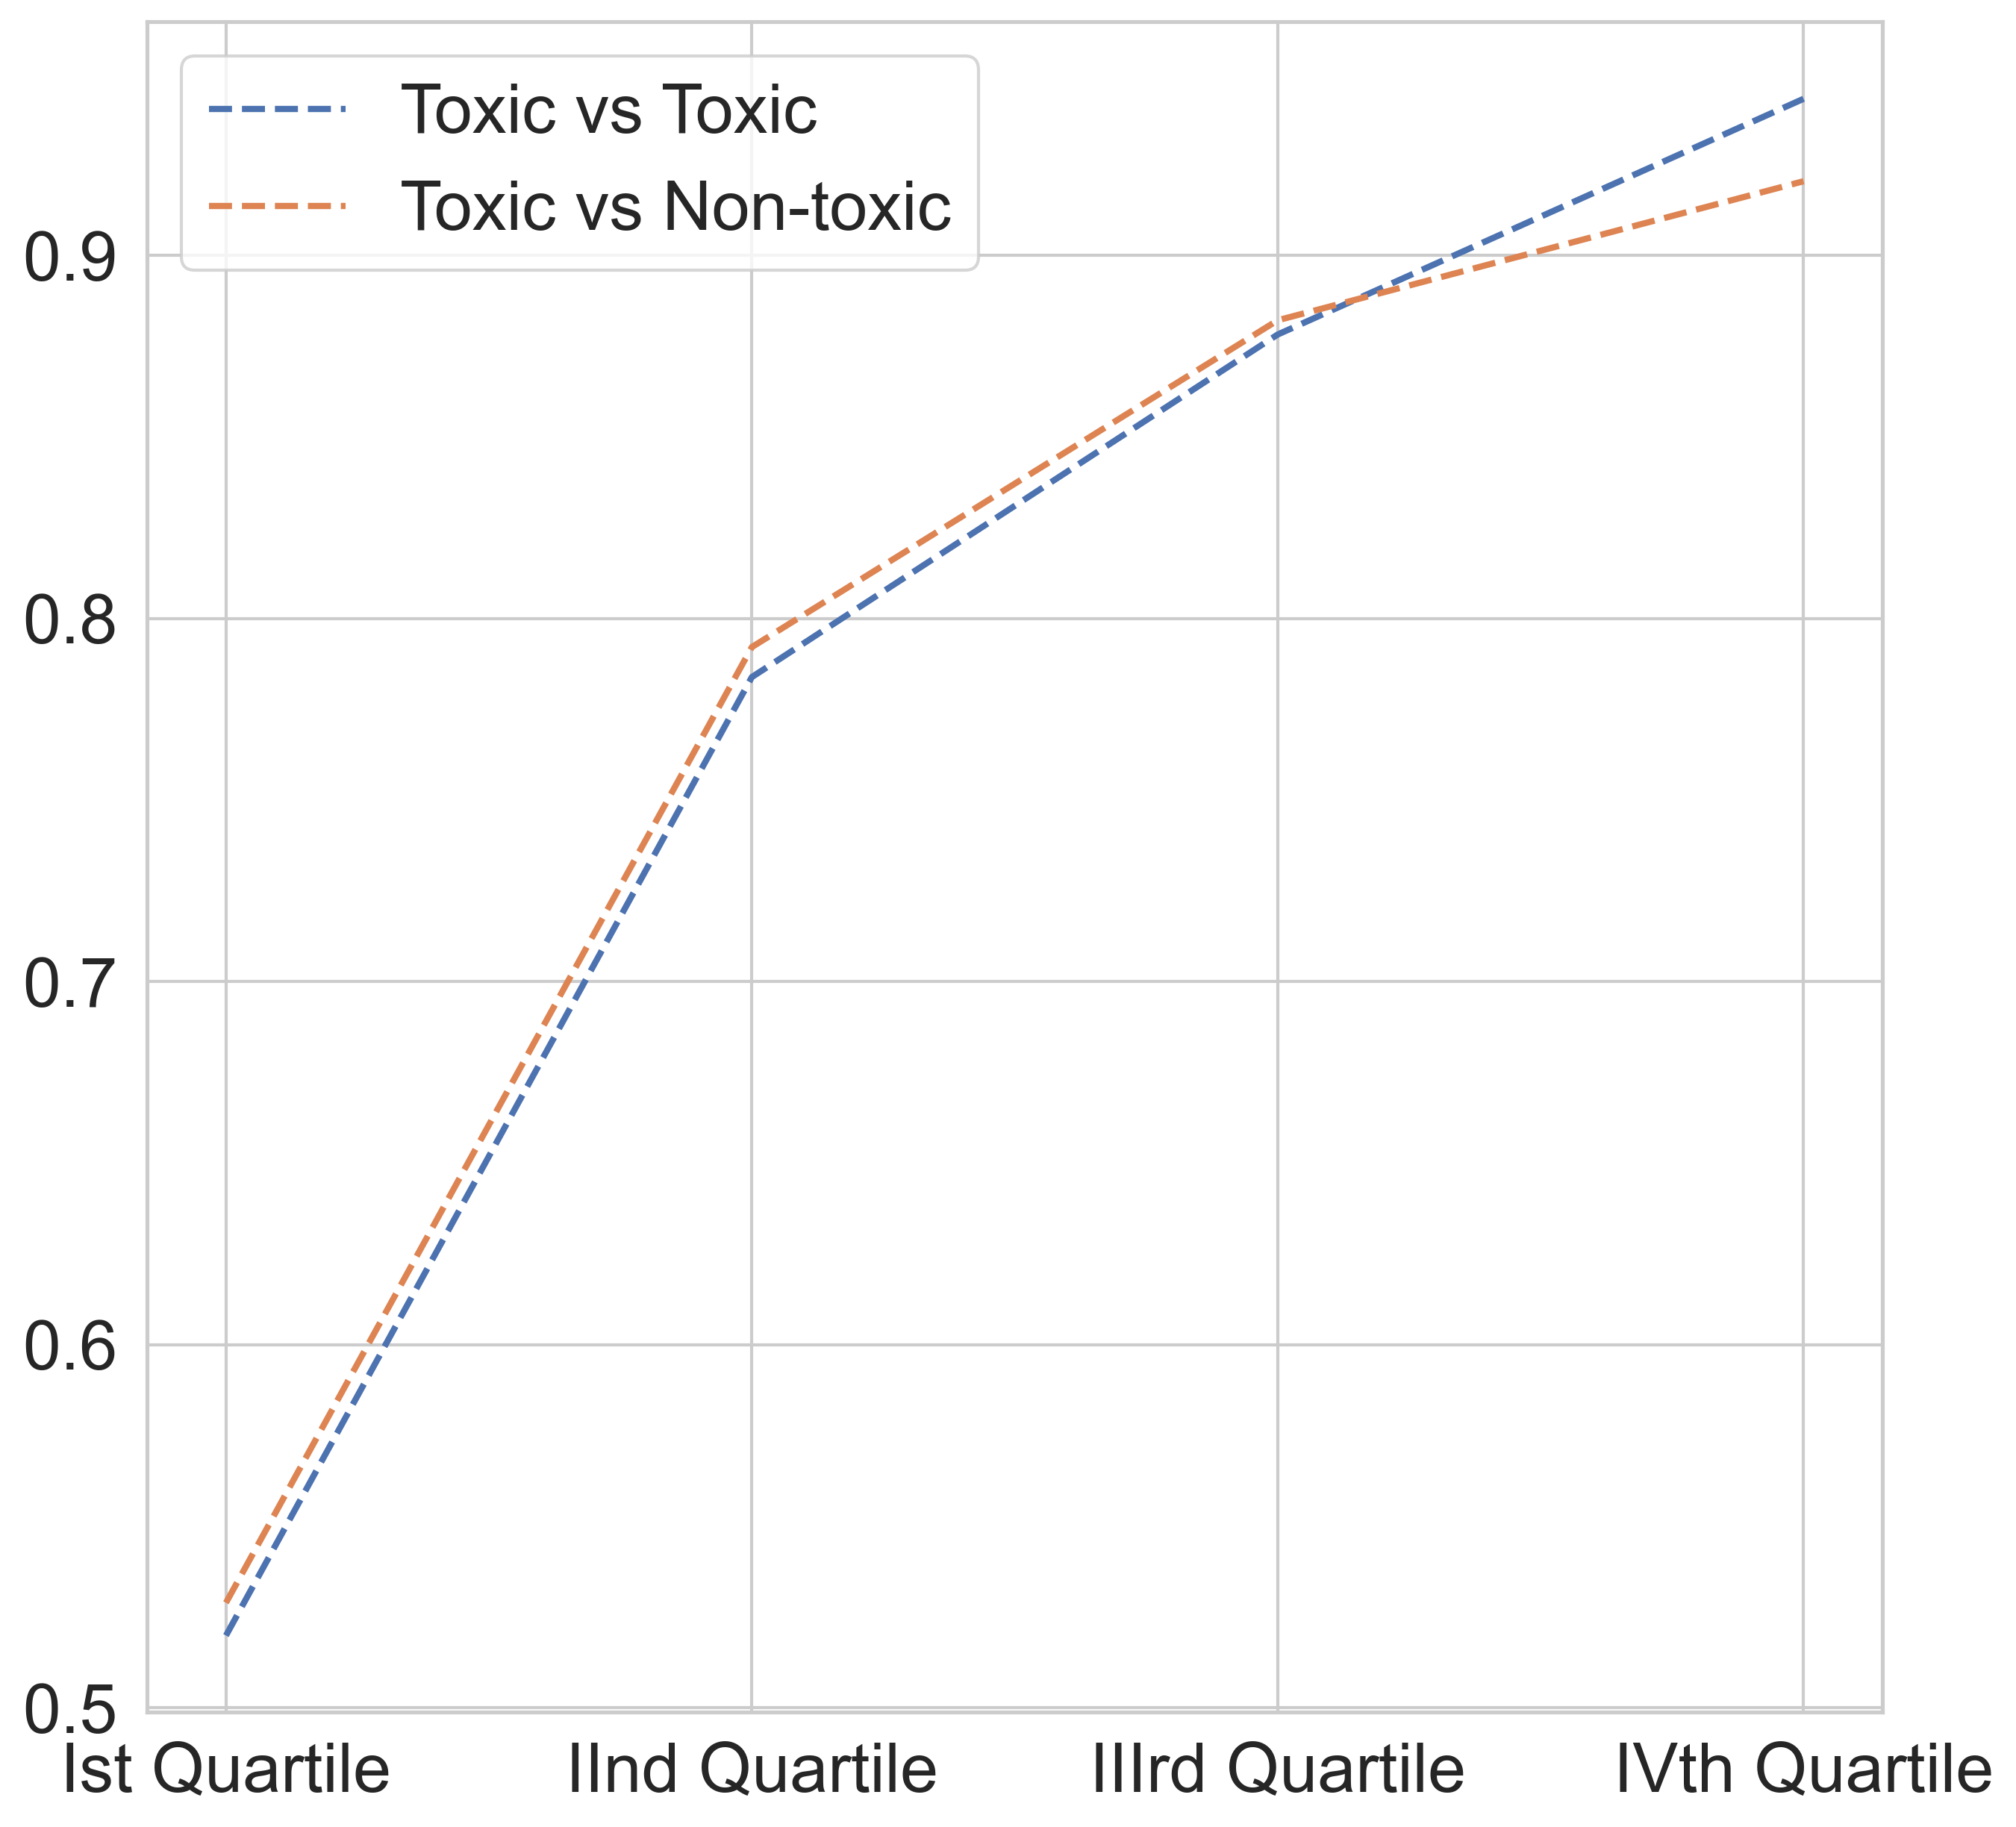

In [28]:
#Median , + only

for neighbours in [1, 2, 5, 10, 15]:
    
    print(neighbours)
    df_final_aa_2 = pd.DataFrame()
    df_final_ai_2 = pd.DataFrame()

    for compound in toxic_compounds:
    
        pearson_positive = pd.DataFrame()
        pearson_positive = df_final_aa[df_final_aa["query"]==compound].sort_values("CP_Pearson_effect", ascending=False).iloc[:neighbours, :]
        df_final_aa_2 = pd.concat([df_final_aa_2, pearson_positive])
        df_final_aa_2 = df_final_aa_2.groupby('query').median().sort_values("CP_Pearson_effect").reset_index()

        pearson_positive = pd.DataFrame()
        pearson_positive = df_final_ai[df_final_ai["query"]==compound].sort_values("CP_Pearson_effect", ascending=False).iloc[:neighbours, :]
        df_final_ai_2 = pd.concat([df_final_ai_2, pearson_positive])
        df_final_ai_2 = df_final_ai_2.groupby('query').median().sort_values("CP_Pearson_effect").reset_index()


    df_final_aa_2 = df_final_aa_2.groupby('query').median().sort_values("CP_Pearson_effect").reset_index()
    df_final_aa_2["CP_Pearson_effect"]=abs(df_final_aa_2["CP_Pearson_effect"])
    
    df_final_ai_2 = df_final_ai_2.groupby('query').median().sort_values("CP_Pearson_effect").reset_index()
    df_final_ai_2["CP_Pearson_effect"]=abs(df_final_ai_2["CP_Pearson_effect"])
    
    quantile_curves_aa = pd.DataFrame()
    quantile_curves_ai = pd.DataFrame()
    quantile_curves_aa = quantile_curves(np.array(df_final_aa_2["CP_Pearson_effect"]))
    quantile_curves_ai = quantile_curves(np.array(df_final_ai_2["CP_Pearson_effect"]))
    
    Quantile_k_aa = pd.DataFrame(quantile_curves_aa, columns=["Toxic vs Toxic"] , index=['Ist Quartile', 'IInd Quartile', 'IIIrd Quartile','IVth Quartile'])
    Quantile_k_ai =  pd.DataFrame(quantile_curves_ai, columns=["Toxic vs Non-toxic"] , index=['Ist Quartile', 'IInd Quartile', 'IIIrd Quartile','IVth Quartile'])
    
    plt.figure(figsize=(10,10), dpi=300)
    #plt.title(neighbours)
    plt.plot( 'Toxic vs Toxic', data=Quantile_k_aa, marker='', linewidth=2, linestyle='dashed', label="Toxic vs Toxic")
    plt.plot( 'Toxic vs Non-toxic', data=Quantile_k_ai, marker='', linewidth=2, linestyle='dashed', label="Toxic vs Non-toxic")
    #plt.ylim(-0.20, +0.2)
    plt.legend()
    plt.show()

1
quantiles:
 [0.25, 0.5, 0.75]
quantile_values (for each moment):
 [0.00857311 0.01624051 0.03209527]
mean for each group and at each moment:
[0.00505188 0.01205861 0.02207545 0.06156265]
quantiles:
 [0.25, 0.5, 0.75]
quantile_values (for each moment):
 [0.00568388 0.01240372 0.02101629]
mean for each group and at each moment:
[0.00240179 0.00861924 0.01638128 0.04534259]


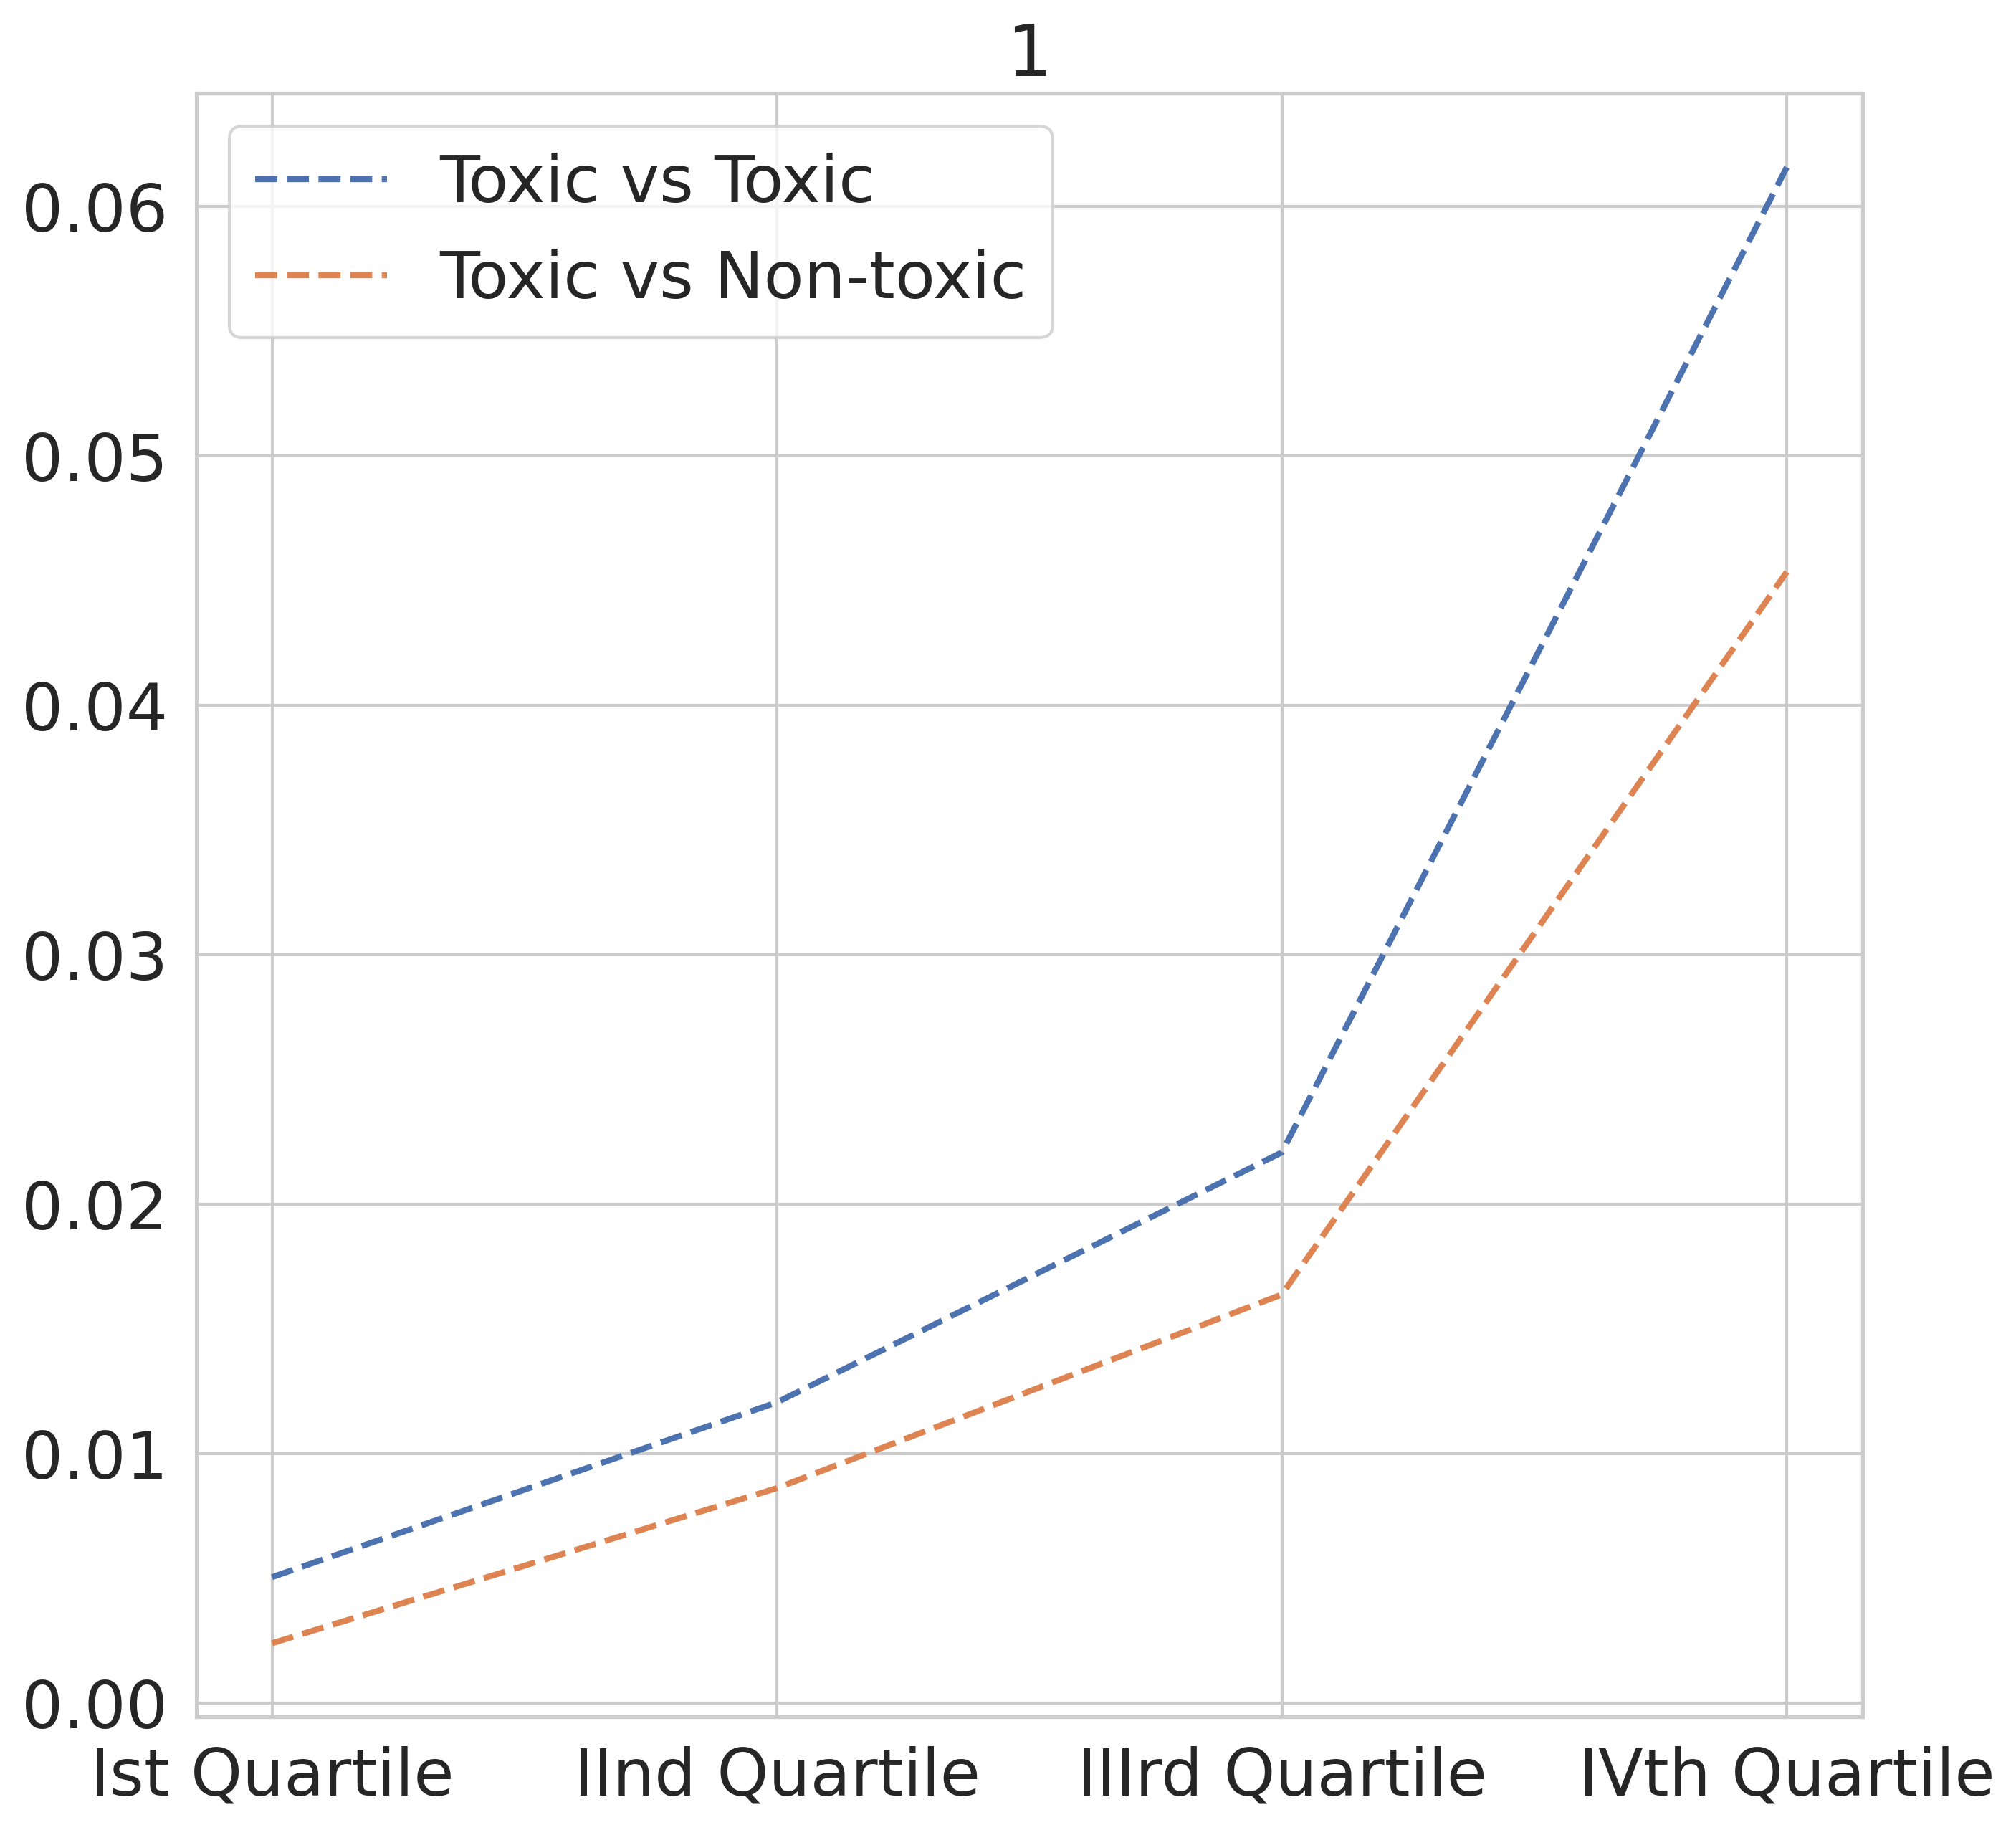

2
quantiles:
 [0.25, 0.5, 0.75]
quantile_values (for each moment):
 [0.01129054 0.02020074 0.03157029]
mean for each group and at each moment:
[0.00786516 0.01518942 0.02599247 0.06065158]
quantiles:
 [0.25, 0.5, 0.75]
quantile_values (for each moment):
 [0.00423532 0.00803952 0.02159263]
mean for each group and at each moment:
[0.00183914 0.00570153 0.01367838 0.04547721]


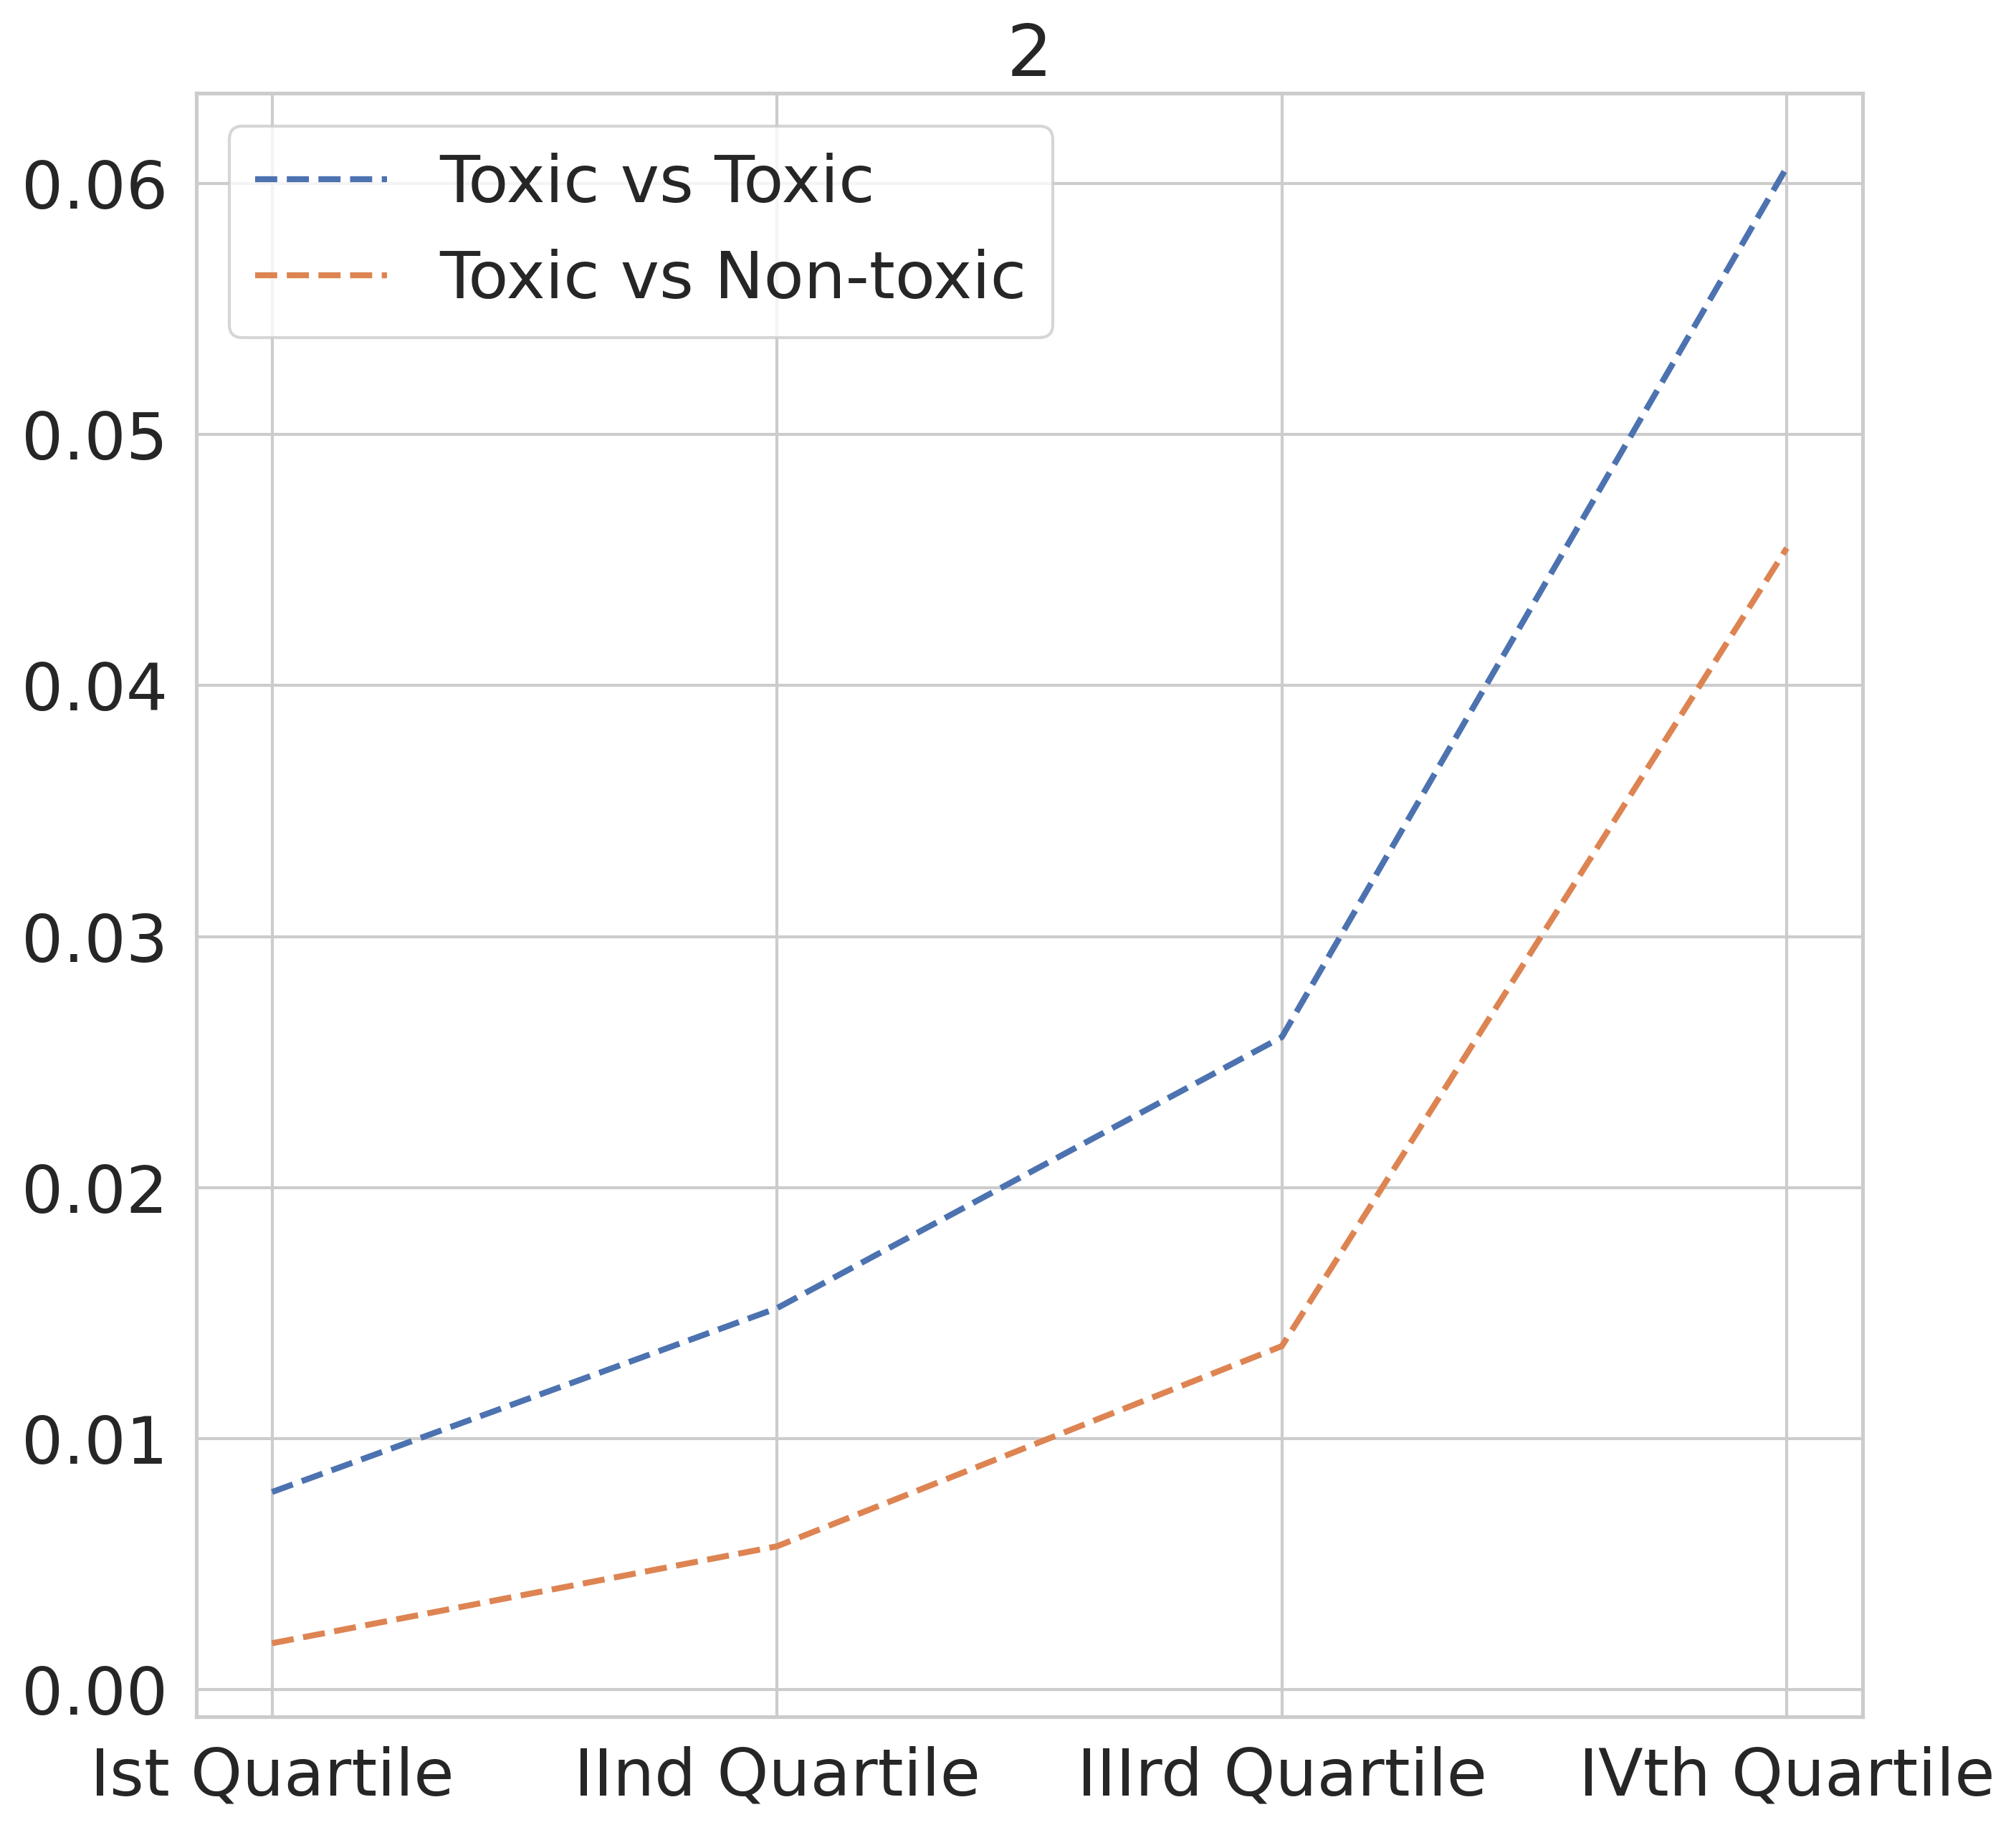

5
quantiles:
 [0.25, 0.5, 0.75]
quantile_values (for each moment):
 [0.02117558 0.02945388 0.04075726]
mean for each group and at each moment:
[0.01215982 0.02555563 0.03397681 0.0579903 ]
quantiles:
 [0.25, 0.5, 0.75]
quantile_values (for each moment):
 [0.00334737 0.00881261 0.01662849]
mean for each group and at each moment:
[0.00178756 0.00527027 0.01235251 0.02989123]


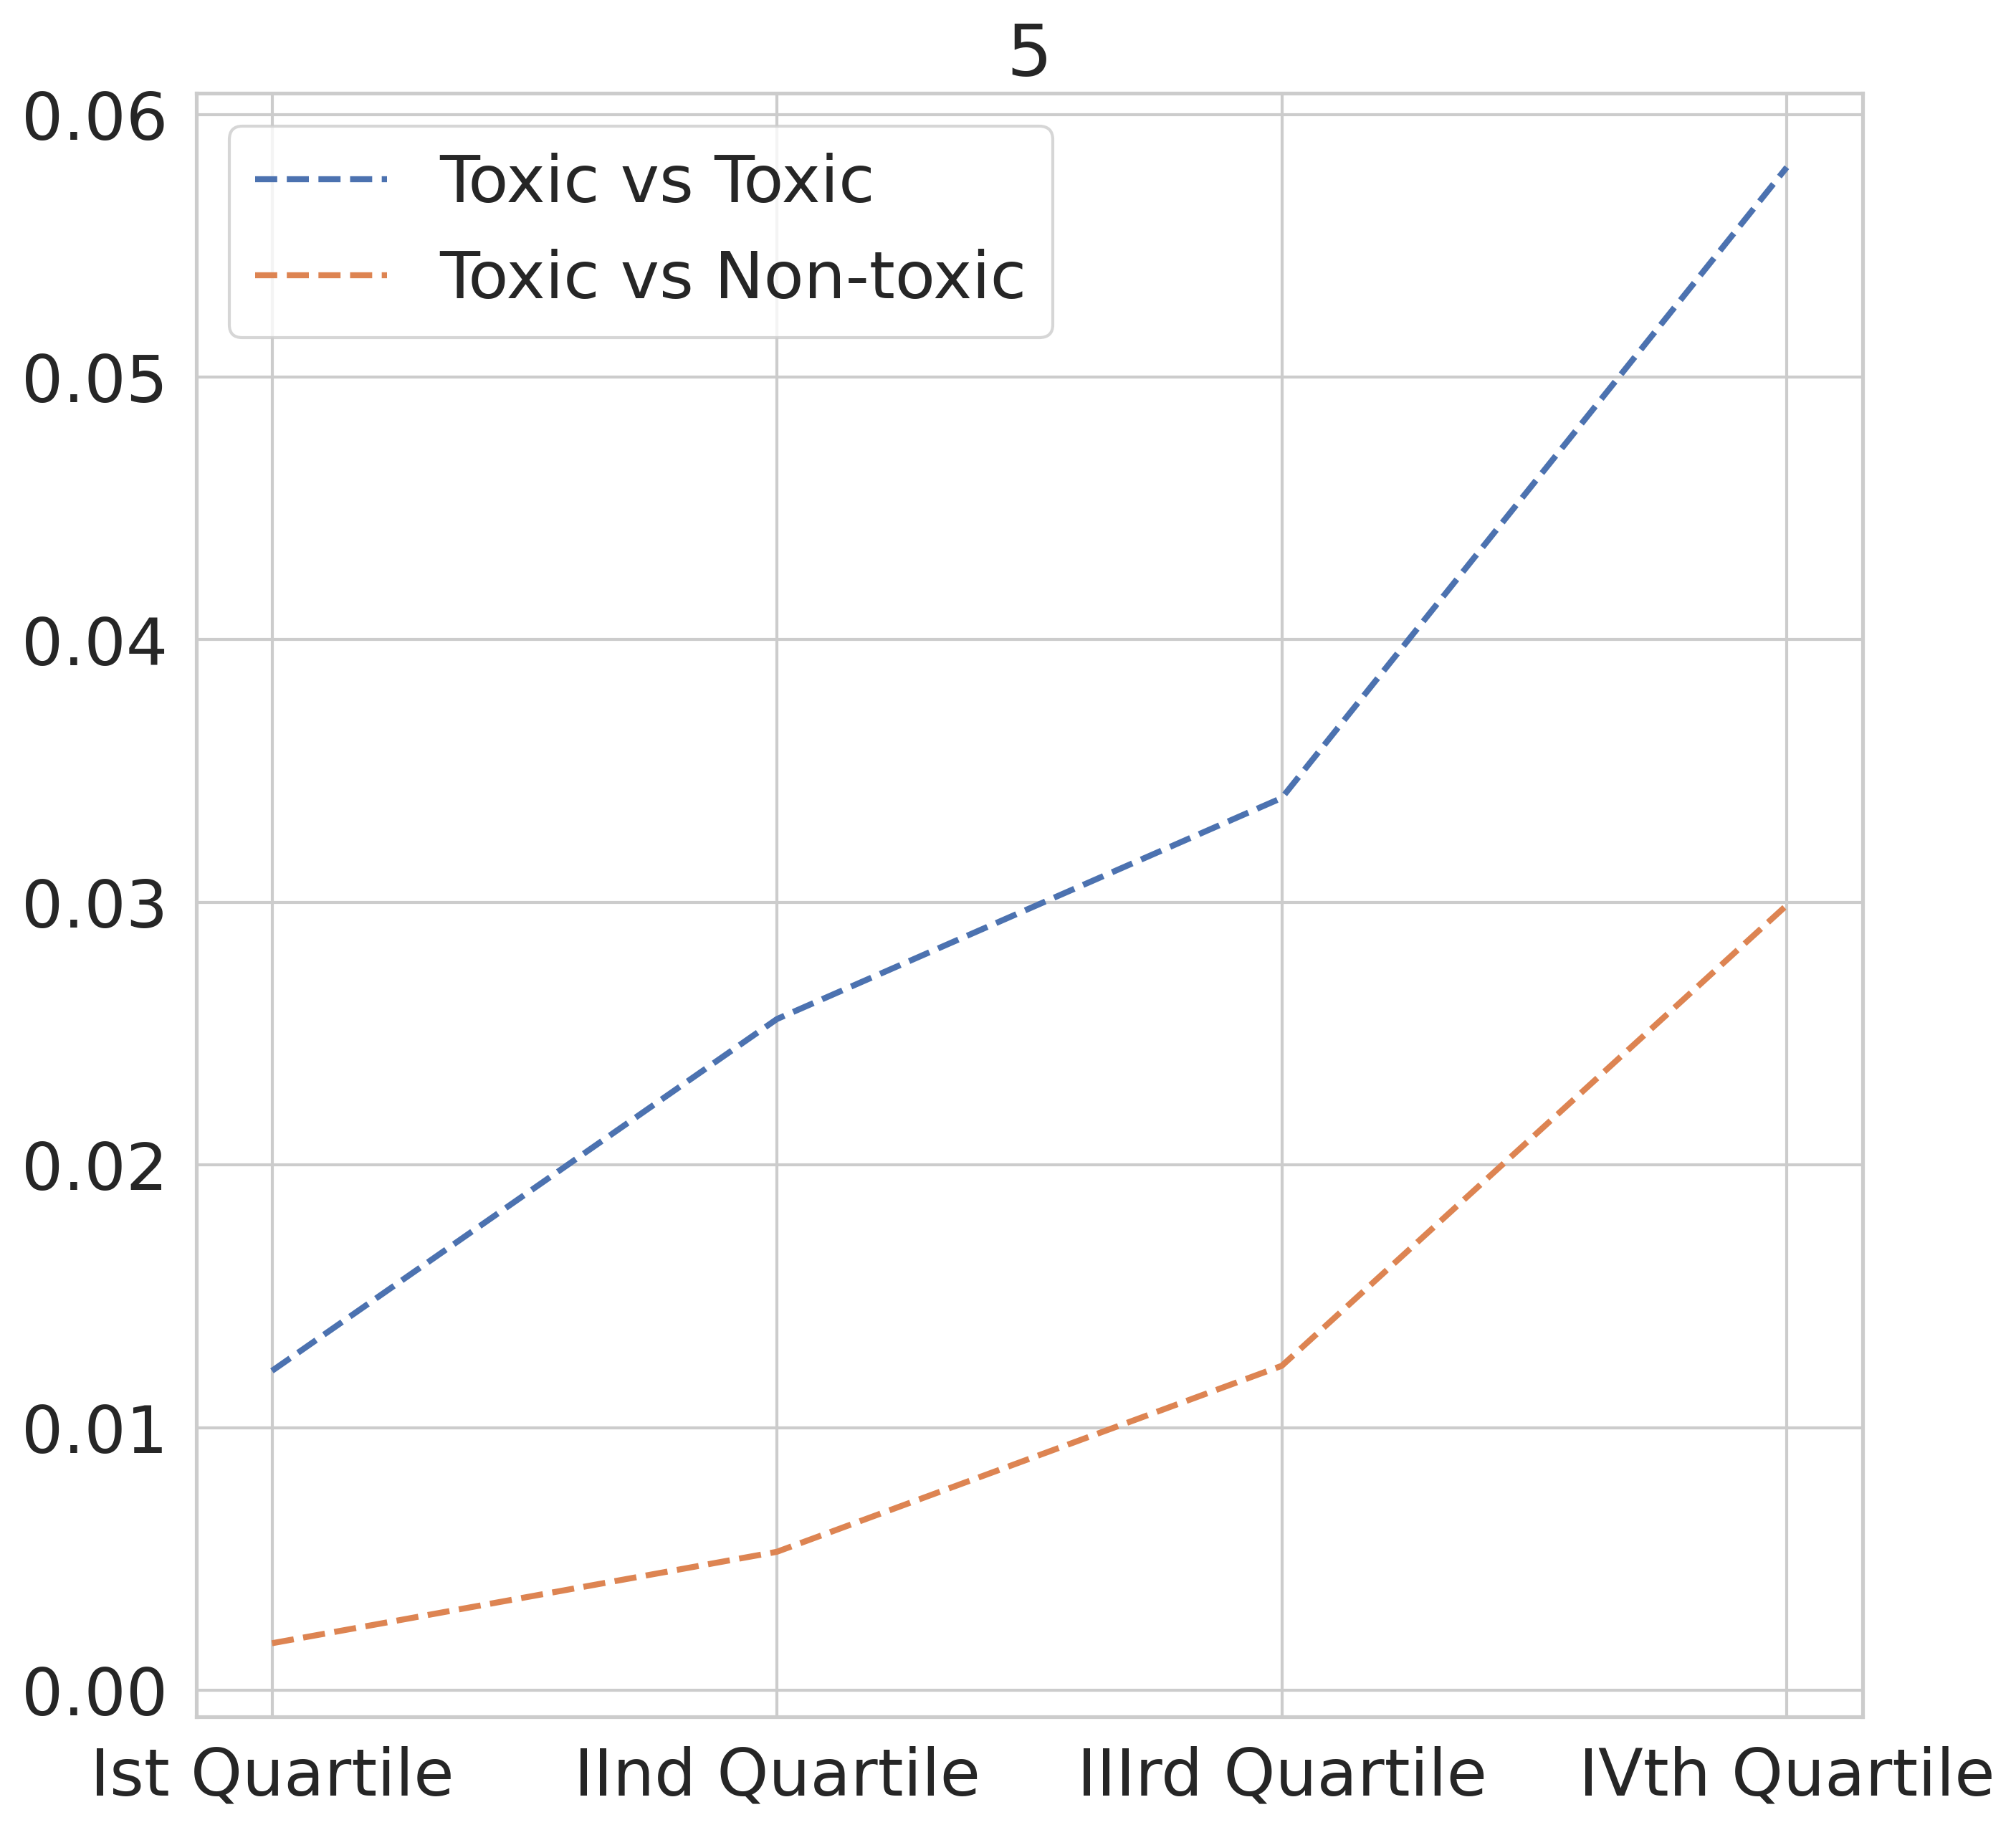

10
quantiles:
 [0.25, 0.5, 0.75]
quantile_values (for each moment):
 [0.03933444 0.04722504 0.06334573]
mean for each group and at each moment:
[0.02915635 0.04354864 0.0561569  0.07583858]
quantiles:
 [0.25, 0.5, 0.75]
quantile_values (for each moment):
 [0.00447537 0.0089845  0.01595068]
mean for each group and at each moment:
[0.00204442 0.00656604 0.01187714 0.02613873]


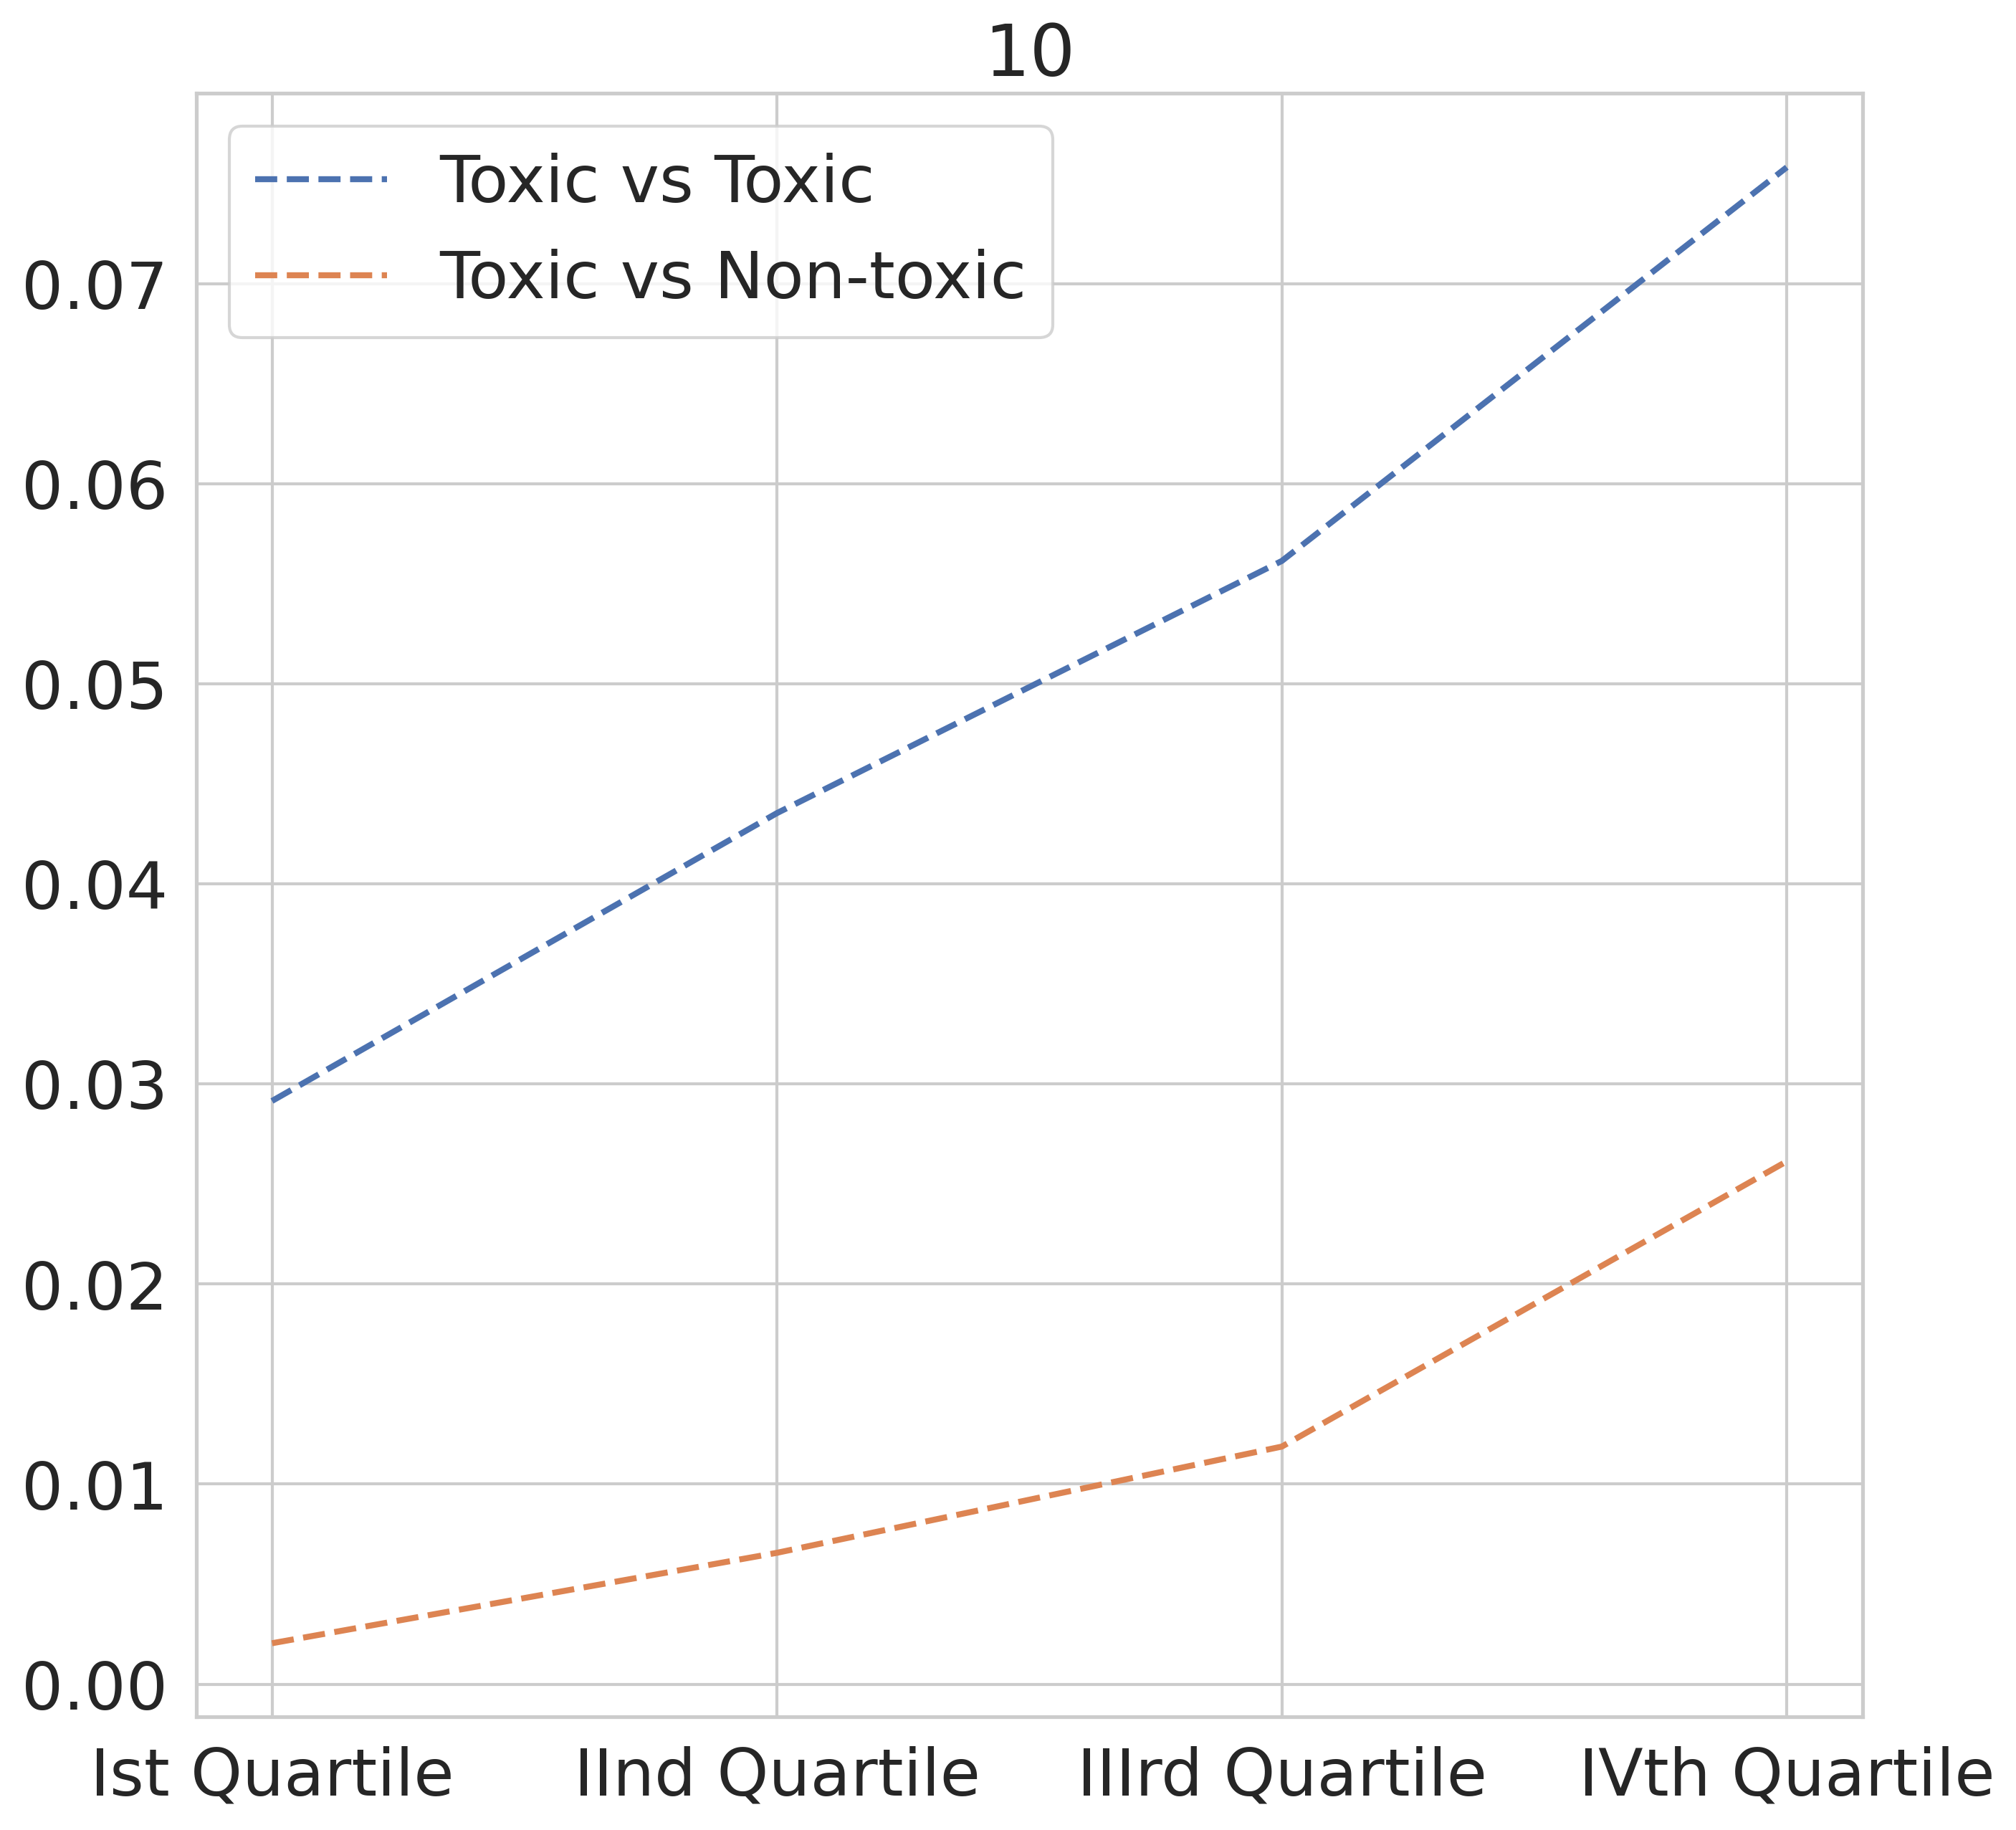

15
quantiles:
 [0.25, 0.5, 0.75]
quantile_values (for each moment):
 [0.0697087  0.08314217 0.09668893]
mean for each group and at each moment:
[0.05202535 0.07749281 0.08817127 0.11108764]
quantiles:
 [0.25, 0.5, 0.75]
quantile_values (for each moment):
 [0.00357888 0.00976286 0.01476198]
mean for each group and at each moment:
[0.00163923 0.00659634 0.01255267 0.02352075]


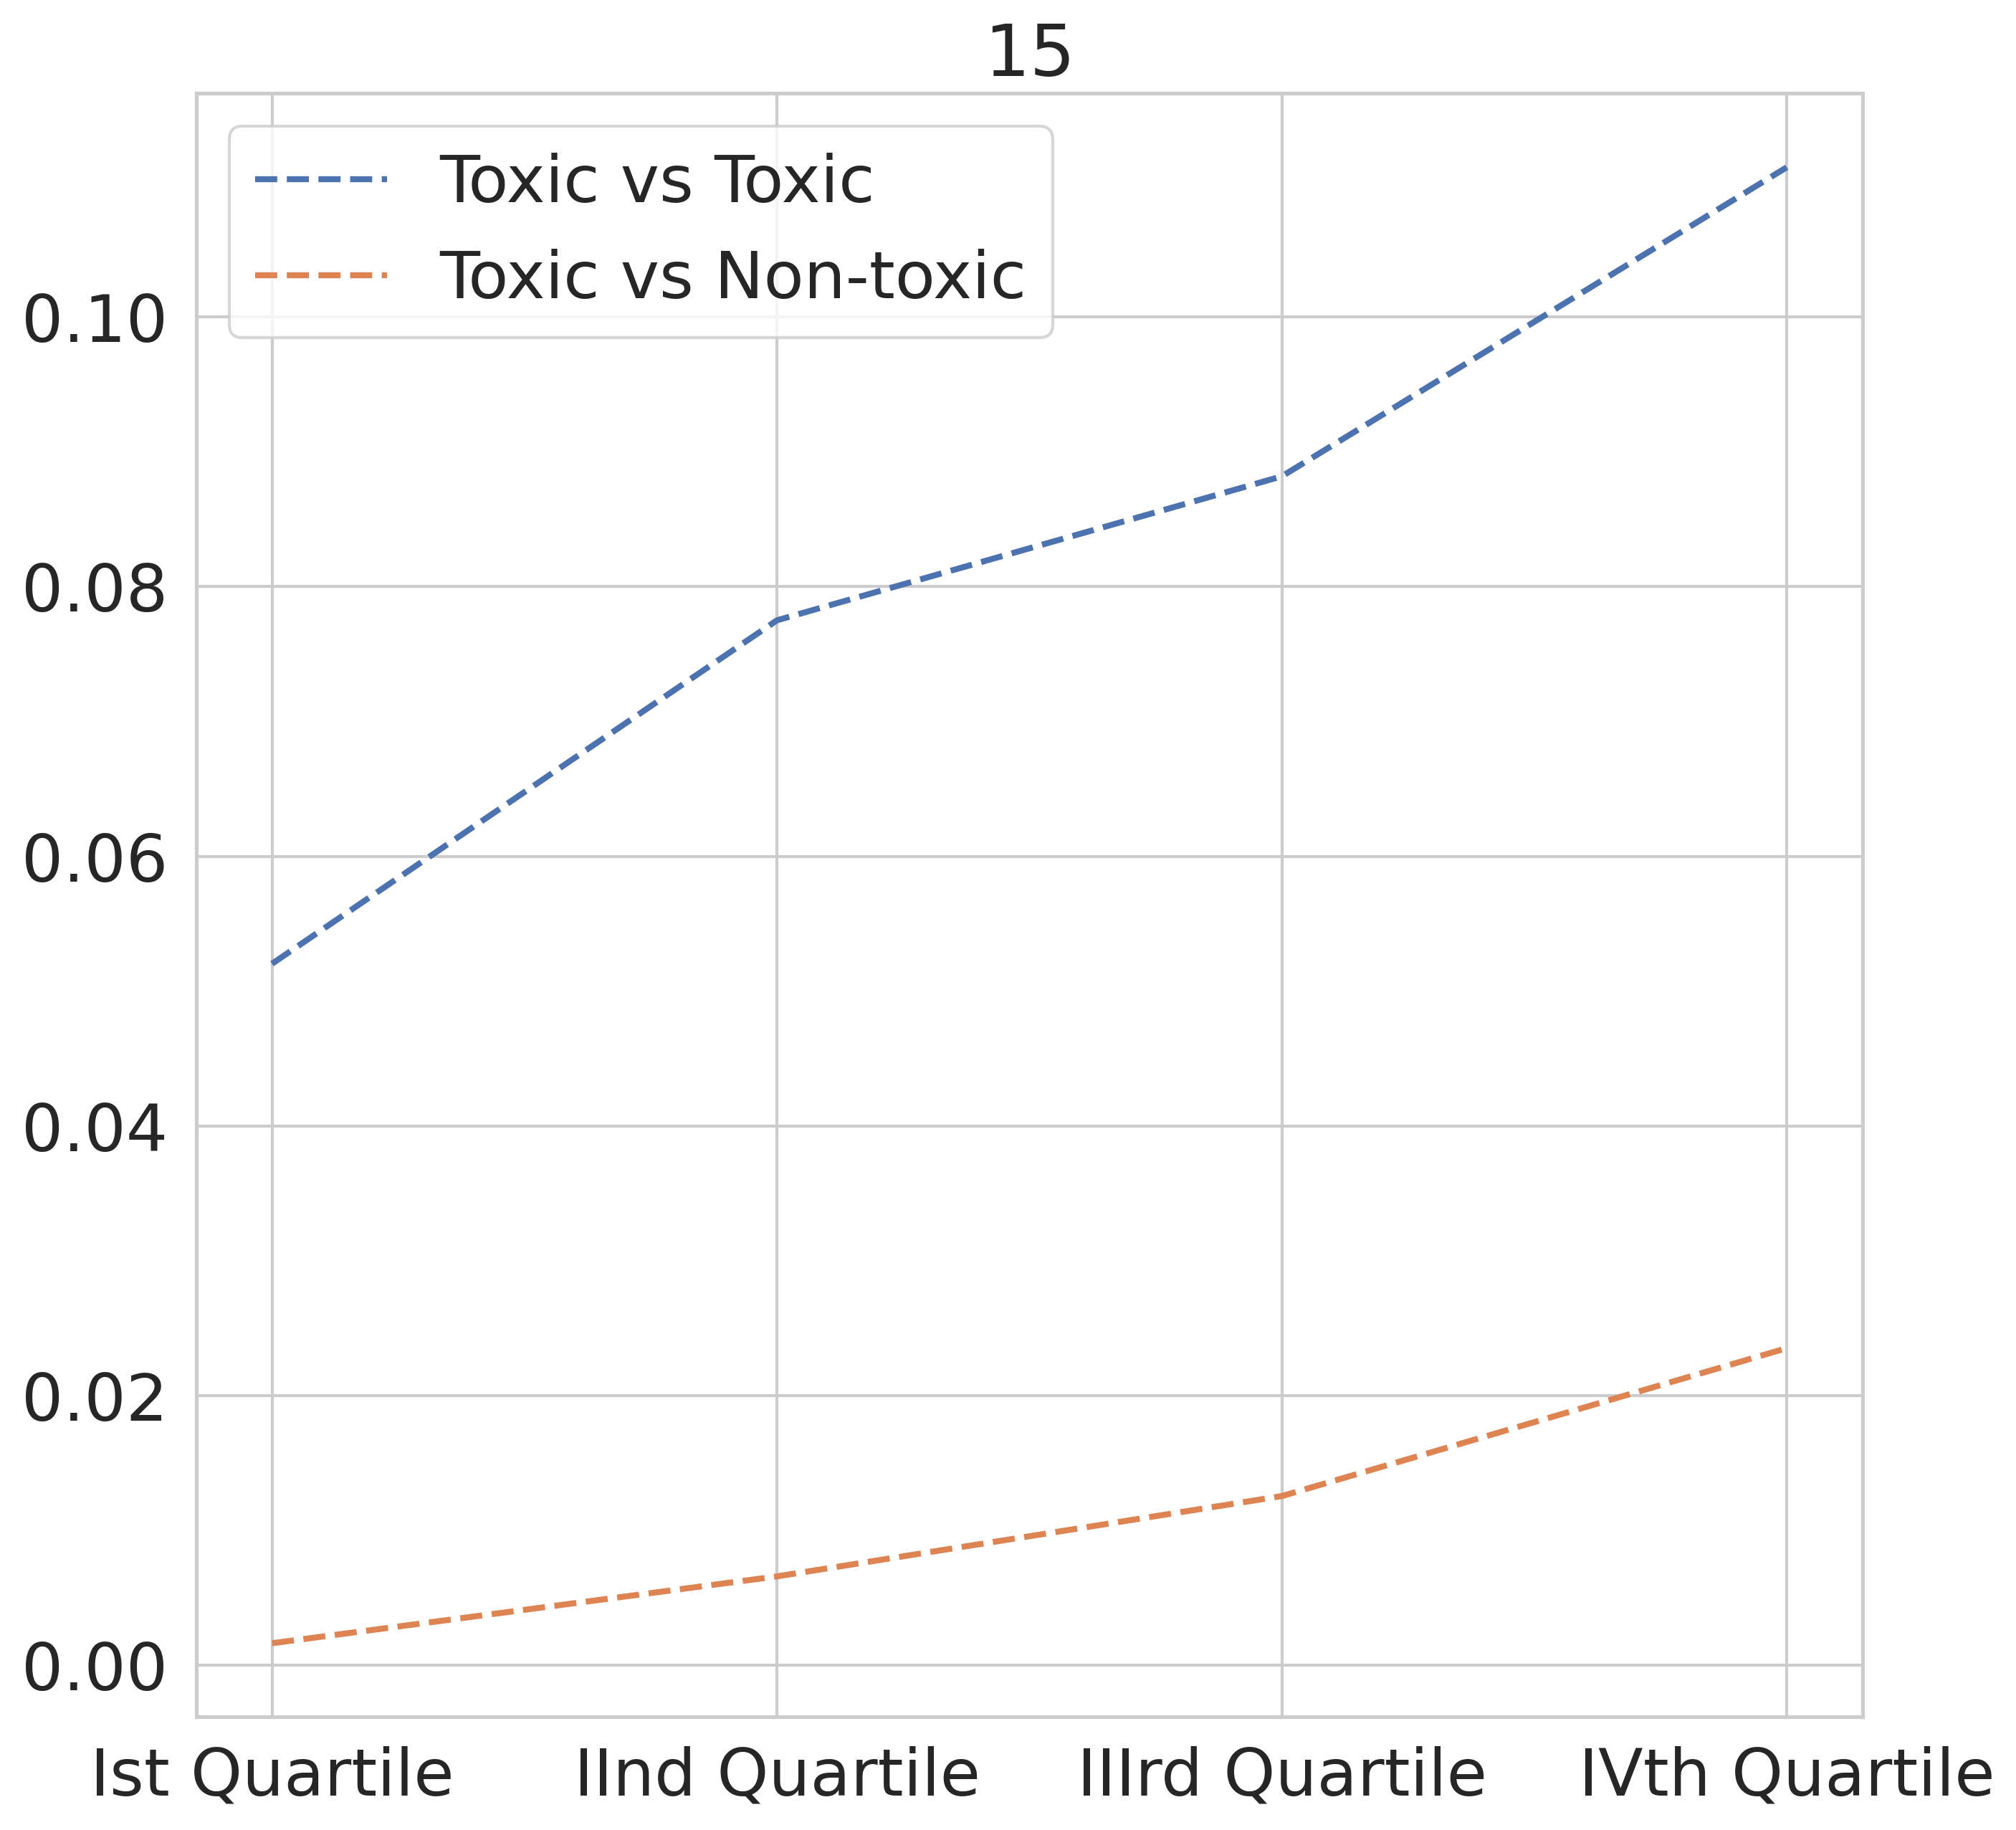

In [26]:
#median, both positive and negative
for neighbours in [1,2,5,10,15]:
    
    print(neighbours)
    df_final_aa_2 = pd.DataFrame()
    df_final_ai_2 = pd.DataFrame()

    for compound in toxic_compounds:
    
        pearson_positive = pd.DataFrame()
        pearson_negative = pd.DataFrame()

        pearson_positive = df_final_aa[df_final_aa["query"]==compound].sort_values("CP_Pearson_effect", ascending=False).iloc[:neighbours, :]
        pearson_negative=  df_final_aa[df_final_aa["query"]==compound].sort_values("CP_Pearson_effect", ascending=True).iloc[:neighbours, :]

        df_final_aa_2 = pd.concat([df_final_aa_2, pearson_positive])
        df_final_aa_2 = pd.concat([df_final_aa_2, pearson_negative])

        df_final_aa_2 = df_final_aa_2.groupby('query').median().sort_values("CP_Pearson_effect").reset_index()

        pearson_positive = pd.DataFrame()
        pearson_negative = pd.DataFrame()

        pearson_positive = df_final_ai[df_final_ai["query"]==compound].sort_values("CP_Pearson_effect", ascending=False).iloc[:neighbours, :]
        pearson_negative=  df_final_ai[df_final_ai["query"]==compound].sort_values("CP_Pearson_effect", ascending=True).iloc[:neighbours, :]

        df_final_ai_2 = pd.concat([df_final_ai_2, pearson_positive])
        df_final_ai_2 = pd.concat([df_final_ai_2, pearson_negative])

        df_final_ai_2 = df_final_ai_2.groupby('query').median().sort_values("CP_Pearson_effect").reset_index()


    df_final_aa_2 = df_final_aa_2.groupby('query').median().sort_values("CP_Pearson_effect").reset_index()
    df_final_aa_2["CP_Pearson_effect"]=abs(df_final_aa_2["CP_Pearson_effect"])
    
    df_final_ai_2 = df_final_ai_2.groupby('query').median().sort_values("CP_Pearson_effect").reset_index()
    df_final_ai_2["CP_Pearson_effect"]=abs(df_final_ai_2["CP_Pearson_effect"])
    
    quantile_curves_aa = pd.DataFrame()
    quantile_curves_ai = pd.DataFrame()
    quantile_curves_aa = quantile_curves(np.array(df_final_aa_2["CP_Pearson_effect"]))
    quantile_curves_ai = quantile_curves(np.array(df_final_ai_2["CP_Pearson_effect"]))
    
    Quantile_k_aa = pd.DataFrame(quantile_curves_aa, columns=["Toxic vs Toxic"] , index=['Ist Quartile', 'IInd Quartile', 'IIIrd Quartile','IVth Quartile'])
    Quantile_k_ai =  pd.DataFrame(quantile_curves_ai, columns=["Toxic vs Non-toxic"] , index=['Ist Quartile', 'IInd Quartile', 'IIIrd Quartile','IVth Quartile'])
    
    plt.figure(figsize=(10,10), dpi=300)
    plt.title(neighbours)
    plt.plot( 'Toxic vs Toxic', data=Quantile_k_aa, marker='', linewidth=2, linestyle='dashed', label="Toxic vs Toxic")
    plt.plot( 'Toxic vs Non-toxic', data=Quantile_k_ai, marker='', linewidth=2, linestyle='dashed', label="Toxic vs Non-toxic")
    plt.legend()
    plt.show()

In [27]:
n_limit=15
df_final_aa_2 = pd.DataFrame()
for compound in toxic_compounds:
    pearson_positive = pd.DataFrame()
    pearson_negative = pd.DataFrame()
    
    pearson_positive = df_final_aa[df_final_aa["query"]==compound].sort_values("CP_Pearson_effect", ascending=False).iloc[:n_limit, :]
    pearson_negative=  df_final_aa[df_final_aa["query"]==compound].sort_values("CP_Pearson_effect", ascending=True).iloc[:n_limit, :]
    
    df_final_aa_2 = pd.concat([df_final_aa_2, pearson_positive])
    df_final_aa_2 = pd.concat([df_final_aa_2, pearson_negative])
    
df_final_aa_2 = df_final_aa_2.groupby('query').median().sort_values("CP_Pearson_effect").reset_index()
df_final_aa_2["CP_Pearson_effect"]=abs(df_final_aa_2["CP_Pearson_effect"])
df_final_aa_2

query  CP_Pearson_effect  \
0                  N=C(O)N/N=C/c1ccc([N+](=O)[O-])o1           0.131563   
1                               NNc1nc(-c2ccccc2)cs1           0.127261   
2           O=C(O)c1cc(O)c2c(c1)C(=O)c1cccc(O)c1C2=O           0.123027   
3   C[C@]12CC[C@@H]3c4ccc(O)cc4CC[C@H]3[C@@H]1CCC2=O           0.121283   
4                   O=C1c2cccc(O)c2C(=O)c2c(O)cccc21           0.112412   
..                                               ...                ...   
80             CC1(COc2ccc(CC3SC(=O)N=C3O)cc2)CCCCC1           0.115245   
81                        CC(C)Cc1ccc(C(C)C(=O)O)cc1           0.116181   
82             O=[N+]([O-])c1ccc(O)c([N+](=O)[O-])c1           0.120507   
83              O=c1c(-c2ccc(O)cc2)coc2cc(O)cc(O)c12           0.122464   
84             CCCc1c(OCCCCc2nn[nH]n2)ccc(C(C)=O)c1O           0.132253   

    CP_Pearson_p_value  CP_Pearson_log10_p  CP_Pearson_log2_effect  \
0         6.102863e-28           27.246641               -0.280739   
1         4.571887e-22           21.343083               -0.303664   
2         8.448441e-11           10.150274               -0.647210   
3         2.977605e-42           41.706616               -0.137518   
4         6.721085e-25           24.411024               -0.350494   
..                 ...                 ...                     ...   
80        2.677123e-22           21.750370               -0.244754   
81        7.857524e-11           10.104803               -0.515373   
82        1.551837e-07            6.818040               -0.710513   
83        1.801762e-37           37.573291               -0.089398   
84        3.529342e-10            9.457635               -0.411741   

    CP_Pearson_prod  CP_Pearson_effect_abs  CP_Pearson_prod_abs  
0         -8.358101               0.820364            22.352405  
1         -5.968970               0.761556            16.253981  
2         -1.922055               0.571329             5.800896  
3        -13.878373               0.907271            37.839938  
4         -5.478223               0.794411            19.394814  
..              ...                    ...                  ...  
80         5.308320               0.766203            16.667214  
81         2.224296               0.570277             5.762537  
82         1.262884               0.475536             3.242483  
83        11.549759               0.888199            33.378988  
84         1.802556               0.553793             5.237691  

[85 rows x 8 columns]

In [28]:
df_final_ai_2 = pd.DataFrame()
for compound in toxic_compounds:
    pearson_positive = pd.DataFrame()
    pearson_negative = pd.DataFrame()
    
    pearson_positive = df_final_ai[df_final_ai["query"]==compound].sort_values("CP_Pearson_effect", ascending=False).iloc[:n_limit, :]
    pearson_negative=  df_final_ai[df_final_ai["query"]==compound].sort_values("CP_Pearson_effect", ascending=True).iloc[:n_limit, :]
    
    df_final_ai_2 = pd.concat([df_final_ai_2, pearson_positive])
    df_final_ai_2 = pd.concat([df_final_ai_2, pearson_negative])
    

df_final_ai_2 = df_final_ai_2.groupby('query').median().sort_values("CP_Pearson_effect").reset_index()
df_final_ai_2["CP_Pearson_effect"]=abs(df_final_ai_2["CP_Pearson_effect"])
df_final_ai_2

query  CP_Pearson_effect  \
0                          O=C1c2ccccc2C(=O)c2ccccc21           0.031484   
1                     COc1ccc(CN(CCN(C)C)c2ccccn2)cc1           0.030455   
2   CC#C[C@]1(O)CC[C@H]2[C@@H]3CCC4=CC(=O)CCC4=C3[...           0.027637   
3                    O=C1c2cccc(O)c2C(=O)c2c(O)cccc21           0.022734   
4       COc1ccc(C(Cl)=C(c2ccc(OC)cc2)c2ccc(OC)cc2)cc1           0.017332   
..                                                ...                ...   
80                               NNc1nc(-c2ccccc2)cs1           0.023412   
81  CC1=C(/C=C/C(C)=C/C=C/C(C)=C/C(=O)Nc2ccc(O)cc2...           0.024955   
82                         CCN(CC)C(=S)SSC(=S)N(CC)CC           0.027166   
83              O=[N+]([O-])c1ccc(O)c([N+](=O)[O-])c1           0.034224   
84             Clc1ccc(C(c2ccc(Cl)cc2)C(Cl)(Cl)Cl)cc1           0.064596   

    CP_Pearson_p_value  CP_Pearson_log10_p  CP_Pearson_log2_effect  \
0         2.518210e-24           23.611055               -0.228408   
1         1.819855e-13           12.743618               -0.465013   
2         9.012015e-08            7.046465               -0.766173   
3         1.931248e-23           22.733827               -0.253922   
4         6.234889e-37           36.643937               -0.159724   
..                 ...                 ...                     ...   
80        4.264657e-25           24.432475               -0.195229   
81        3.846885e-12           11.537409               -0.517282   
82        2.945620e-47           46.532193               -0.077615   
83        6.141669e-08            7.211715               -0.716402   
84        9.854049e-07            6.015238               -0.628423   

    CP_Pearson_prod  CP_Pearson_effect_abs  CP_Pearson_prod_abs  
0         -2.088075               0.786423            18.568391  
1         -0.830300               0.629266             8.019189  
2         -0.379815               0.483153             3.404558  
3         -1.321134               0.777175            17.668343  
4         -2.272421               0.883489            32.377284  
..              ...                    ...                  ...  
80         1.419185               0.794673            19.416383  
81         0.613207               0.603692             6.967622  
82         5.100275               0.925206            43.051878  
83         0.374801               0.488544             3.523242  
84         0.588537               0.447242             2.690552  

[85 rows x 8 columns]

In [29]:
#df_final_aa_2 = df_final_aa.sort_values(["query", "CP_Pearson_effect"], ascending = (False, False)).groupby(by="query").median()
#df_final_aa_2 = df_final_aa_2.reset_index()
df_final_aa_2["Category"] = "Toxic vs Toxic"
#df_final_aa_2

In [30]:
#df_final_ai_2 = df_final_ai.sort_values(["query", "CP_Pearson_effect"], ascending = (False, False)).groupby(by="query").median()
#df_final_ai_2 = df_final_ai_2.reset_index()
df_final_ai_2["Category"] = "Toxic vs Non-toxic"
#df_final_ai_2

In [31]:
frames=[df_final_aa_2, df_final_ai_2]
df_plot=pd.concat(frames)
df_plot

query  CP_Pearson_effect  \
0                   N=C(O)N/N=C/c1ccc([N+](=O)[O-])o1           0.131563   
1                                NNc1nc(-c2ccccc2)cs1           0.127261   
2            O=C(O)c1cc(O)c2c(c1)C(=O)c1cccc(O)c1C2=O           0.123027   
3    C[C@]12CC[C@@H]3c4ccc(O)cc4CC[C@H]3[C@@H]1CCC2=O           0.121283   
4                    O=C1c2cccc(O)c2C(=O)c2c(O)cccc21           0.112412   
..                                                ...                ...   
80                               NNc1nc(-c2ccccc2)cs1           0.023412   
81  CC1=C(/C=C/C(C)=C/C=C/C(C)=C/C(=O)Nc2ccc(O)cc2...           0.024955   
82                         CCN(CC)C(=S)SSC(=S)N(CC)CC           0.027166   
83              O=[N+]([O-])c1ccc(O)c([N+](=O)[O-])c1           0.034224   
84             Clc1ccc(C(c2ccc(Cl)cc2)C(Cl)(Cl)Cl)cc1           0.064596   

    CP_Pearson_p_value  CP_Pearson_log10_p  CP_Pearson_log2_effect  \
0         6.102863e-28           27.246641               -0.280739   
1         4.571887e-22           21.343083               -0.303664   
2         8.448441e-11           10.150274               -0.647210   
3         2.977605e-42           41.706616               -0.137518   
4         6.721085e-25           24.411024               -0.350494   
..                 ...                 ...                     ...   
80        4.264657e-25           24.432475               -0.195229   
81        3.846885e-12           11.537409               -0.517282   
82        2.945620e-47           46.532193               -0.077615   
83        6.141669e-08            7.211715               -0.716402   
84        9.854049e-07            6.015238               -0.628423   

    CP_Pearson_prod  CP_Pearson_effect_abs  CP_Pearson_prod_abs  \
0         -8.358101               0.820364            22.352405   
1         -5.968970               0.761556            16.253981   
2         -1.922055               0.571329             5.800896   
3        -13.878373               0.907271            37.839938   
4         -5.478223               0.794411            19.394814   
..              ...                    ...                  ...   
80         1.419185               0.794673            19.416383   
81         0.613207               0.603692             6.967622   
82         5.100275               0.925206            43.051878   
83         0.374801               0.488544             3.523242   
84         0.588537               0.447242             2.690552   

              Category  
0       Toxic vs Toxic  
1       Toxic vs Toxic  
2       Toxic vs Toxic  
3       Toxic vs Toxic  
4       Toxic vs Toxic  
..                 ...  
80  Toxic vs Non-toxic  
81  Toxic vs Non-toxic  
82  Toxic vs Non-toxic  
83  Toxic vs Non-toxic  
84  Toxic vs Non-toxic  

[170 rows x 9 columns]

In [34]:
import ptitprince as pt 

[Text(0, 0.5, 'Effect Size')]

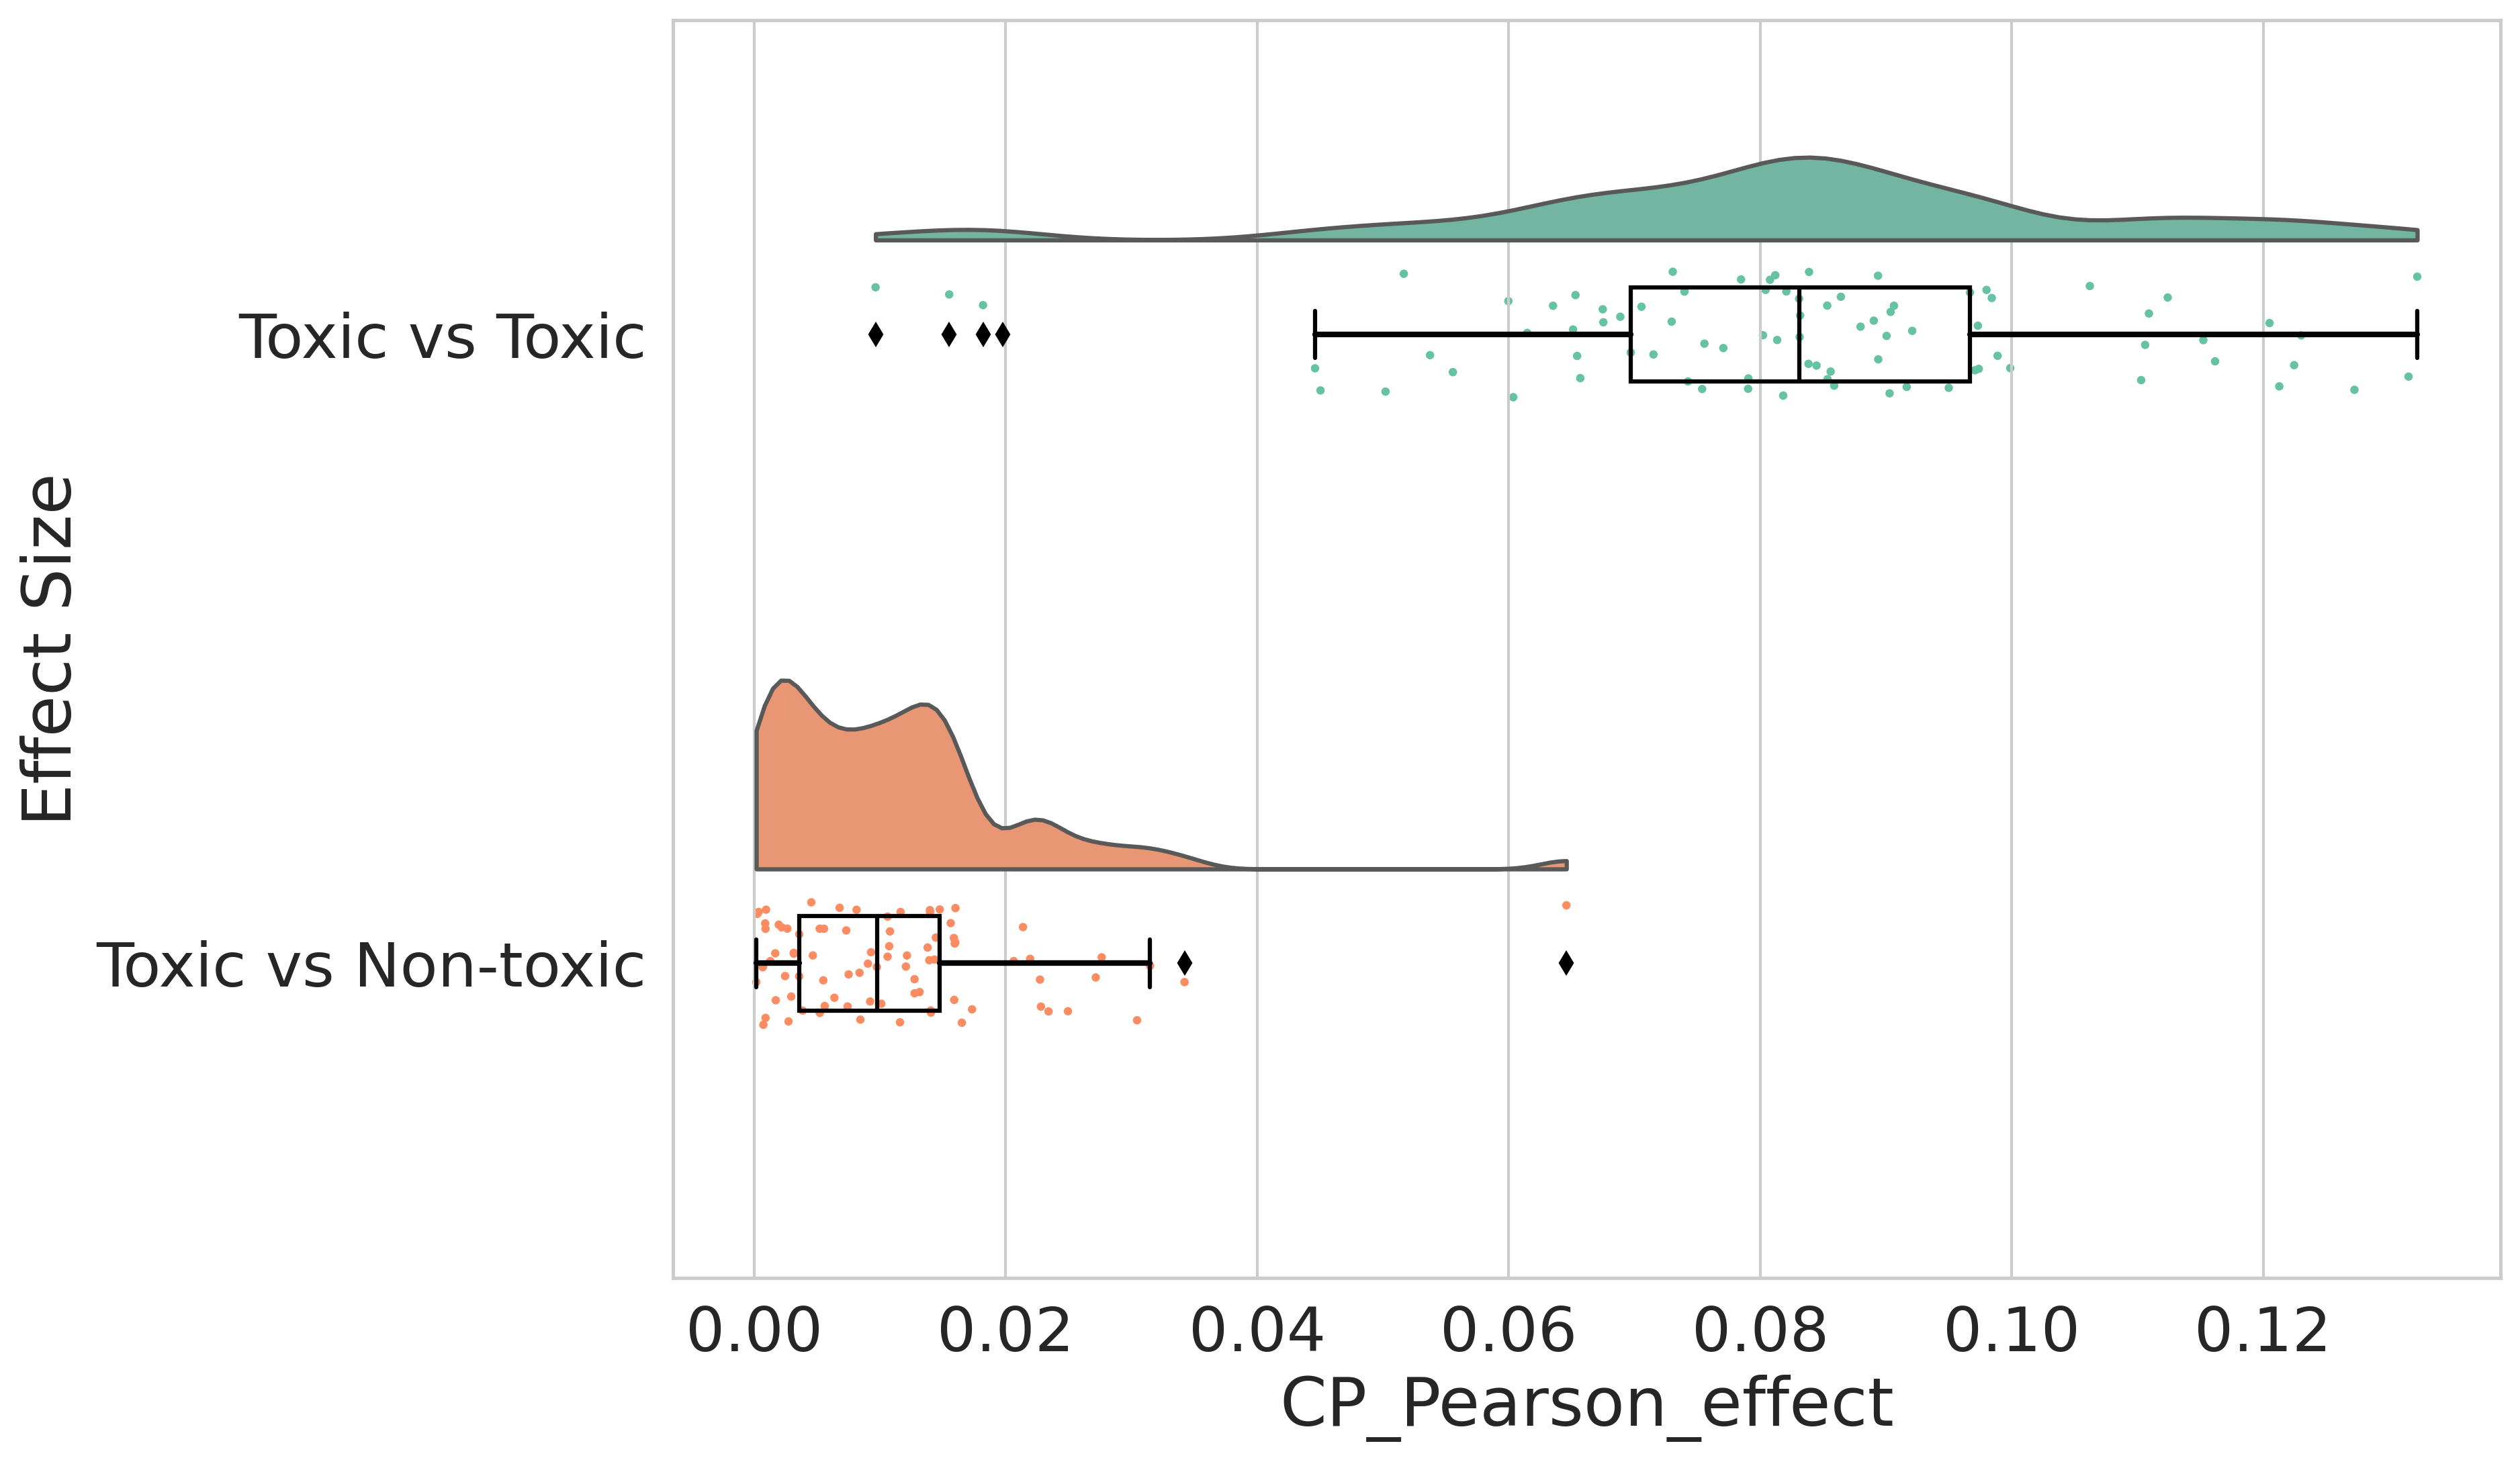

In [35]:
pal = "Set2"

sns.set(rc={'figure.figsize':(11.7,8.27), "figure.dpi":300}, font_scale=2)

sns.set_style("whitegrid")
ax=pt.half_violinplot( x = 'CP_Pearson_effect', y = 'Category', data = df_plot, palette = pal,
     bw = .2, cut = 0.,scale = "area", width = .6, 
     inner = None, orient = 'h')

ax=sns.stripplot( x = 'CP_Pearson_effect', y = 'Category', data = df_plot, palette = pal,
      edgecolor = "white",size = 3, jitter = 1, zorder = 0,
      orient = 'h')

ax=sns.boxplot( x = 'CP_Pearson_effect', y = 'Category', data = df_plot, color = "black",
      width = .15, zorder = 10, showcaps = True,
      boxprops = {'facecolor':'none', "zorder":10}, showfliers=True,
      whiskerprops = {'linewidth':2, "zorder":10}, 
      saturation = 1, orient = 'h')

ax.set(ylabel= "Effect Size")


In [36]:
df_plot[df_plot.Category=="Toxic vs Toxic"]["CP_Pearson_effect"].median()

0.08314216702746413

In [37]:
df_plot[df_plot.Category=="Toxic vs Non-toxic"]["CP_Pearson_effect"].median()

0.00976286185857092

In [38]:
from statannot import add_stat_annotation

In [39]:
df_plot

query  CP_Pearson_effect  \
0                   N=C(O)N/N=C/c1ccc([N+](=O)[O-])o1           0.131563   
1                                NNc1nc(-c2ccccc2)cs1           0.127261   
2            O=C(O)c1cc(O)c2c(c1)C(=O)c1cccc(O)c1C2=O           0.123027   
3    C[C@]12CC[C@@H]3c4ccc(O)cc4CC[C@H]3[C@@H]1CCC2=O           0.121283   
4                    O=C1c2cccc(O)c2C(=O)c2c(O)cccc21           0.112412   
..                                                ...                ...   
80                               NNc1nc(-c2ccccc2)cs1           0.023412   
81  CC1=C(/C=C/C(C)=C/C=C/C(C)=C/C(=O)Nc2ccc(O)cc2...           0.024955   
82                         CCN(CC)C(=S)SSC(=S)N(CC)CC           0.027166   
83              O=[N+]([O-])c1ccc(O)c([N+](=O)[O-])c1           0.034224   
84             Clc1ccc(C(c2ccc(Cl)cc2)C(Cl)(Cl)Cl)cc1           0.064596   

    CP_Pearson_p_value  CP_Pearson_log10_p  CP_Pearson_log2_effect  \
0         6.102863e-28           27.246641               -0.280739   
1         4.571887e-22           21.343083               -0.303664   
2         8.448441e-11           10.150274               -0.647210   
3         2.977605e-42           41.706616               -0.137518   
4         6.721085e-25           24.411024               -0.350494   
..                 ...                 ...                     ...   
80        4.264657e-25           24.432475               -0.195229   
81        3.846885e-12           11.537409               -0.517282   
82        2.945620e-47           46.532193               -0.077615   
83        6.141669e-08            7.211715               -0.716402   
84        9.854049e-07            6.015238               -0.628423   

    CP_Pearson_prod  CP_Pearson_effect_abs  CP_Pearson_prod_abs  \
0         -8.358101               0.820364            22.352405   
1         -5.968970               0.761556            16.253981   
2         -1.922055               0.571329             5.800896   
3        -13.878373               0.907271            37.839938   
4         -5.478223               0.794411            19.394814   
..              ...                    ...                  ...   
80         1.419185               0.794673            19.416383   
81         0.613207               0.603692             6.967622   
82         5.100275               0.925206            43.051878   
83         0.374801               0.488544             3.523242   
84         0.588537               0.447242             2.690552   

              Category  
0       Toxic vs Toxic  
1       Toxic vs Toxic  
2       Toxic vs Toxic  
3       Toxic vs Toxic  
4       Toxic vs Toxic  
..                 ...  
80  Toxic vs Non-toxic  
81  Toxic vs Non-toxic  
82  Toxic vs Non-toxic  
83  Toxic vs Non-toxic  
84  Toxic vs Non-toxic  

[170 rows x 9 columns]

In [40]:
df_plot_sig = df_plot[["CP_Pearson_effect", "Category"]]
df_plot_sig

CP_Pearson_effect            Category
0            0.131563      Toxic vs Toxic
1            0.127261      Toxic vs Toxic
2            0.123027      Toxic vs Toxic
3            0.121283      Toxic vs Toxic
4            0.112412      Toxic vs Toxic
..                ...                 ...
80           0.023412  Toxic vs Non-toxic
81           0.024955  Toxic vs Non-toxic
82           0.027166  Toxic vs Non-toxic
83           0.034224  Toxic vs Non-toxic
84           0.064596  Toxic vs Non-toxic

[170 rows x 2 columns]

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

Toxic vs Toxic v.s. Toxic vs Non-toxic: t-test independent samples with Bonferroni correction, P_val=8.250e-58 stat=2.470e+01


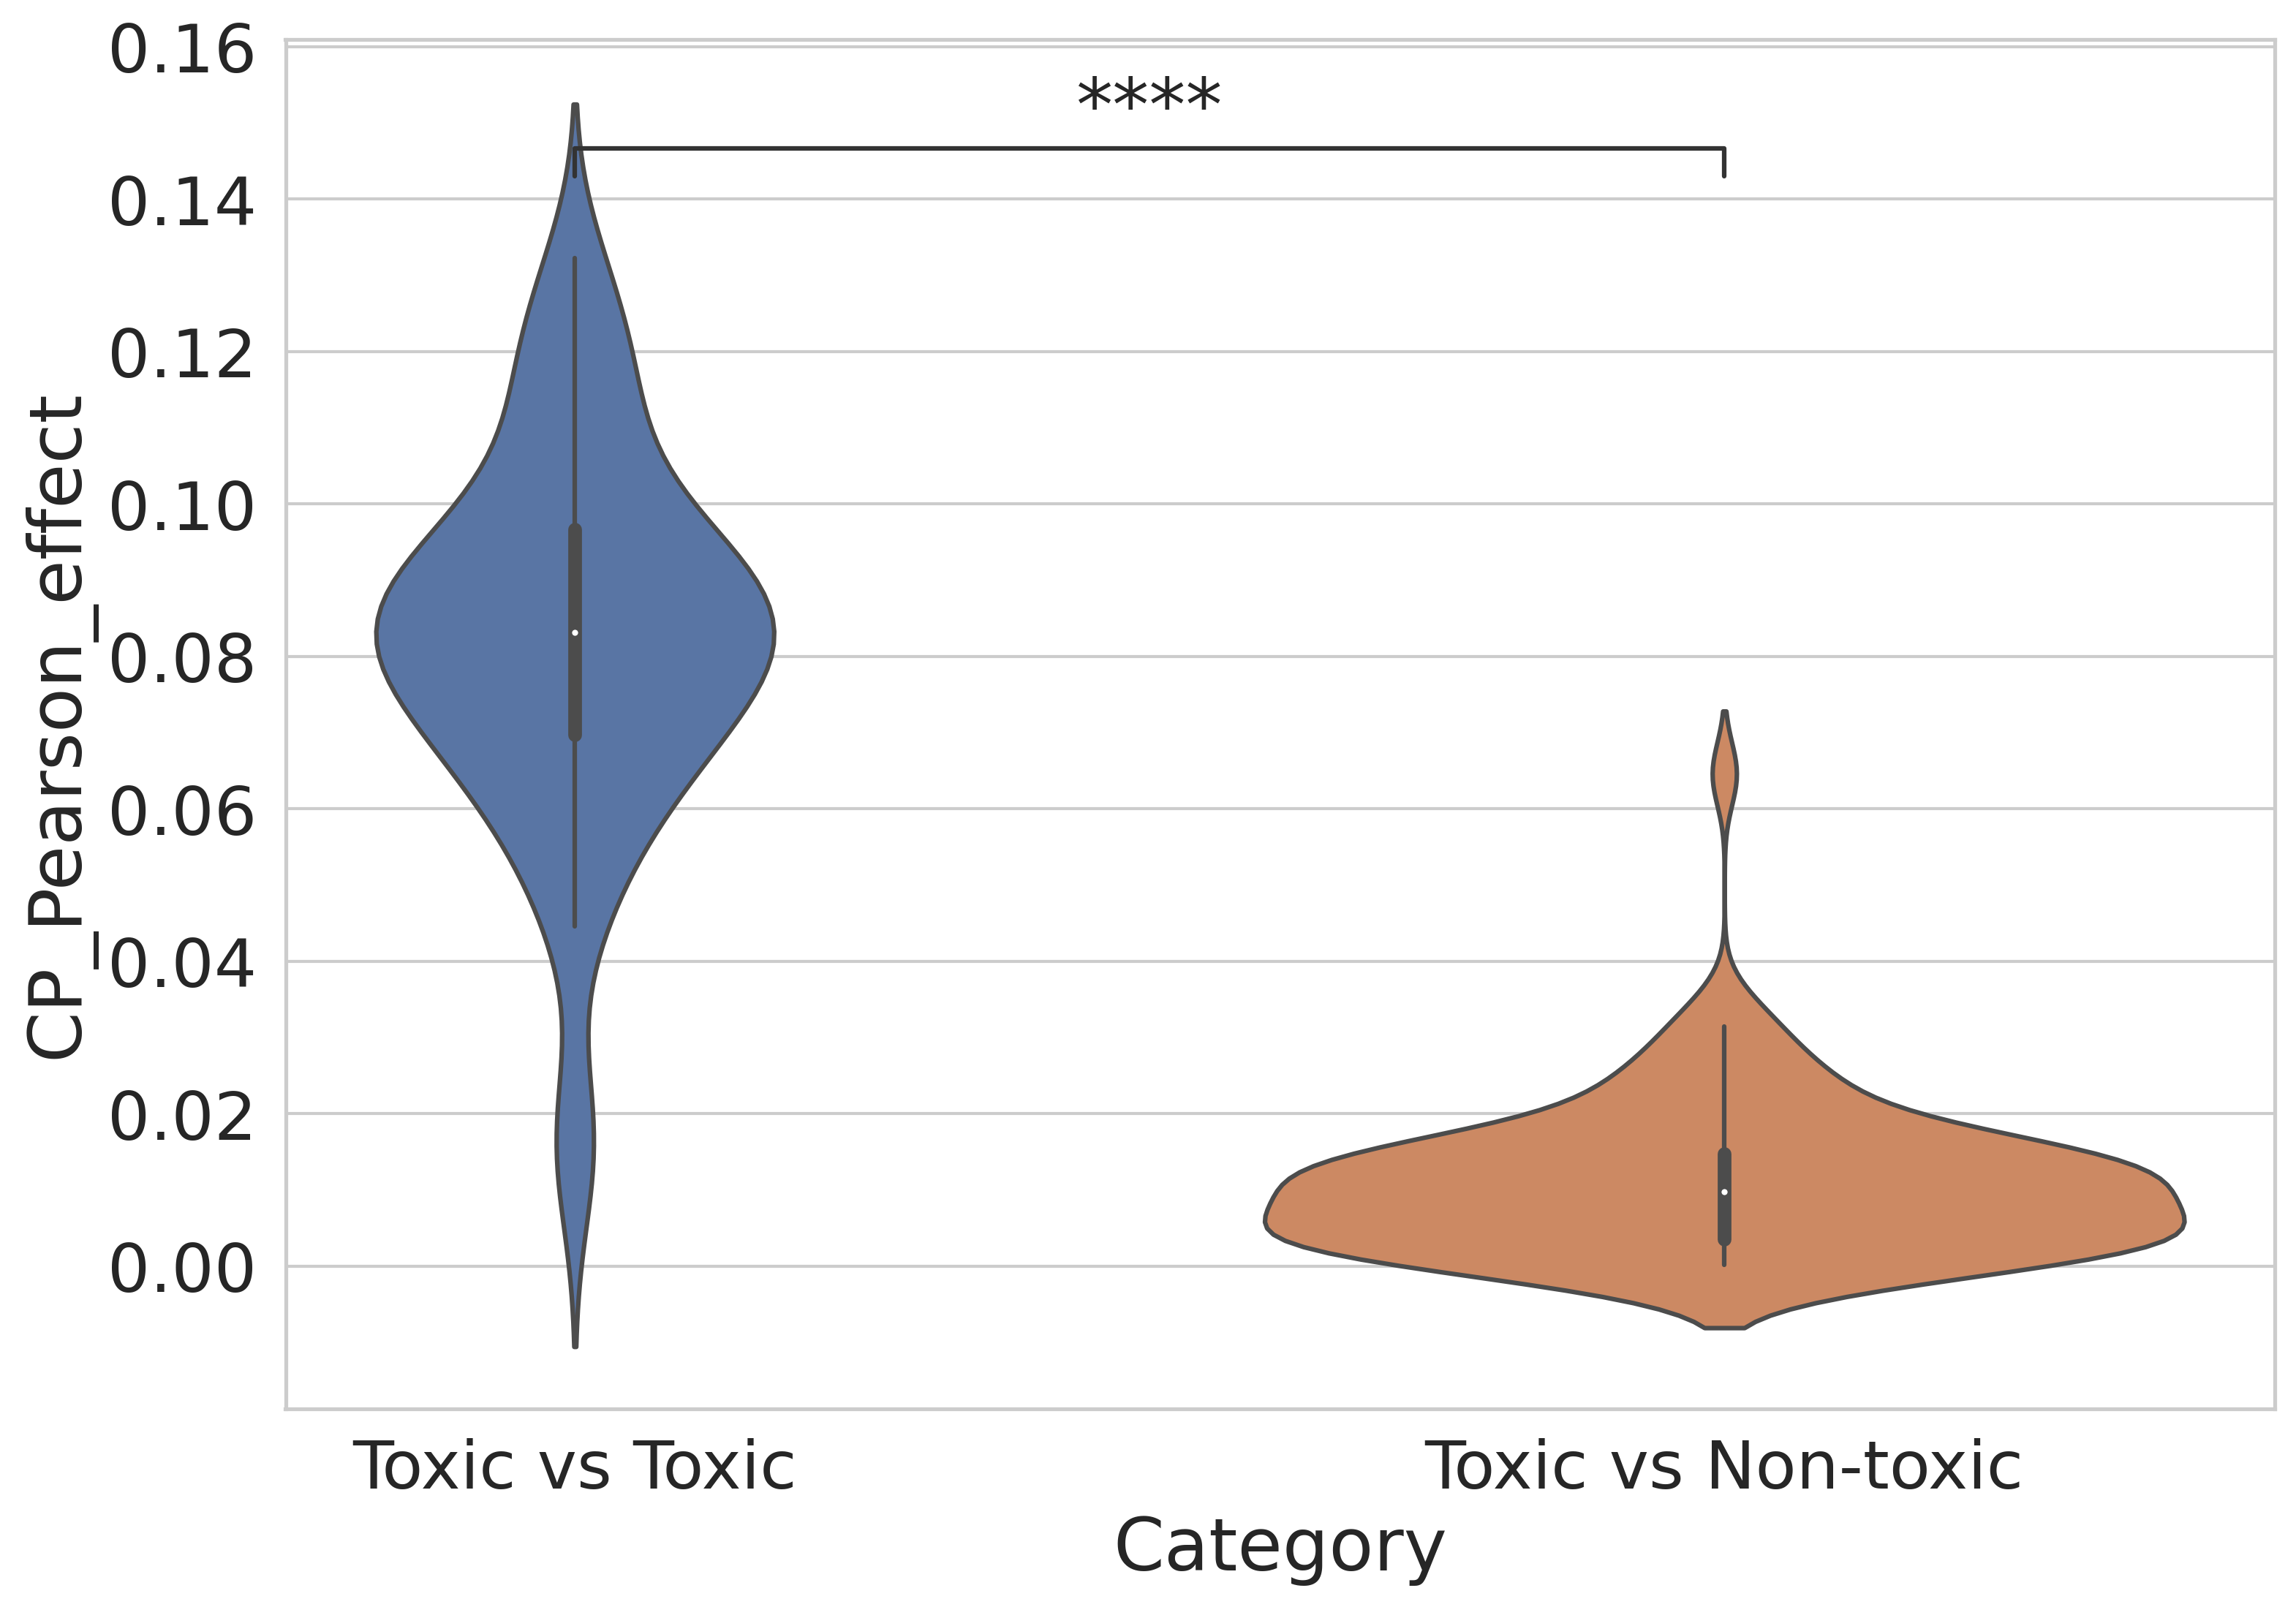

In [41]:

ax = sns.violinplot( x = 'Category', y = 'CP_Pearson_effect', data = df_plot_sig, order=["Toxic vs Toxic", "Toxic vs Non-toxic"])

ax, test_results = add_stat_annotation(ax, x = 'Category', y = 'CP_Pearson_effect', data = df_plot_sig, 
                                        order=["Toxic vs Toxic", "Toxic vs Non-toxic"],
                                       box_pairs=[("Toxic vs Toxic", "Toxic vs Non-toxic")], test='t-test_ind', verbose=2)
test_results
plt.show()